# Food & Climate: Data-Driven Sustainability Project
![image.png](https://media.istockphoto.com/id/1805849861/pt/foto/harvesting-in-agriculture-crop-field.jpg?s=612x612&w=0&k=20&c=j00EhF1-GVLbuZtc7fzzWzTUSKXBhqTX_KFO3HLmZT0=) ![image.png](https://media.istockphoto.com/id/124677784/pt/foto/silhueta-de-tractor.jpg?s=612x612&w=0&k=20&c=KGG6YRaCGEOcwZRpkdAiokeOUUmz13HZ4FJcUhZ9L3g=)![image.png](https://media.istockphoto.com/id/1297005736/pt/foto/young-couple-villagers-with-milk-cans.jpg?s=612x612&w=0&k=20&c=b5s5kLwnW_QAyf5EbqdPiLR1JL99EgrLfi6sAv4S_84=) ![image.png](https://media.istockphoto.com/id/1479516556/pt/foto/grain-field-inspection.jpg?s=612x612&w=0&k=20&c=WHYjpj8KQKK7hBg64lyCPu663heNACoG9cngxgNeM-E=) 

# Table of contents:

1. Project Overview: Ask questions to make data-driven decisions
2. Data Preparation: Prepare the data for exportation
    * 2.1. Import the libraries
    * 2.2. Data Engineering: Python (Pandas, Numpy), Kaggle Dataset using APIs
3. Data Cleaning & Transformation: Process the data from dirty to clean
    * 3.1. Sourcing Datasets. Identifying the datasets and previewing the data
    * 3.2. Data Cleaning and Transformation
    * 3.2.1. Food and feed production worldwide dataset
        * 3.2.1.1. Standardizing column names (normalization)
        * 3.2.1.2. Missing values and quantitative variables
        * 3.2.1.3. Drop Duplicates
        * 3.2.1.4. Qualitative variables
        * 3.2.1.5. Changing dataset format



## 1.  Project Overview: Ask questions to make data-driven decisions

1.1. Introduction and KPIs:

Over the past century, the global population has surged, with projections by the United Nations (2019) estimating it could reach 10 billion by 2050. This rapid growth has led to a corresponding increase in demand for food, energy, and water, placing immense pressure on natural resources and global food systems.

Technological advancements and economic expansion over the last 70 years have helped meet these demands, but they have also contributed to environmental challenges. One of the most pressing concerns is climate change, with consistent data indicating that Earth's annual maximum temperatures are rising at an alarming rate.

Agriculture and livestock production play a significant role in this phenomenon, accounting for 25-30% of total global CO₂ emissions. Therefore, the goal of this project is to analyze historical food production trends, quantify its environmental impact, and explore the relationship between agriculture-related emissions and climate change. Analyze global food production trends, quantify greenhouse gas emissions from food systems, and explore their relationship with climate anomalies using Python, Google Cloud Platform with BigQuery, and Tableau for Data Viz. Also hypothesis testing and statistical methods to determine their impact on climate anomalies. 

In that order, the definition of the following KPIs are in order:
* KPI: Total Global Food Production (by weight)
* KPI: GHG Emissions per Food Category/Product (Total & Per Kg)
* KPI: Country-Level GHG Emissions from Food Production
* KPI: Correlation between Total Food Production/GHG Emissions and Global/Regional Temperature Anomalies.

1.2. Research Questions & Key Focus Areas:

💡 Global Food Production Trends
* How has food and feed production evolved over time?
* Which countries are the largest producers?
* Which countries are major contributors to both food production and its environmental impact?
* Which food products and feedstocks dominate global production?

💡 Environmental Impact & CO₂ Emissions
* Which foods contribute the most to greenhouse gas emissions?
* What production stages generate the highest emissions?
* How has the global temperature varied over the years?
* Which countries have experienced the most significant temperature changes?
* Is there a discernible relationship between food production, its environmental impact, and rising temperature anomalies?

2. Data Selection & Sources

For a comprehensive analysis, this project integrates three datasets, all available on Kaggle:

📌 Food Production Data (FAOSTAT - Food and Agriculture Organization of the United Nations)
[https://www.fao.org/faostat/en/#data/EI/metadata]
- Covers global food and feed production from 1961 to 2022
- Includes country-level production statistics for various food items. 
- Source: FAO. 2022. Emissions totals.

📌 Climate Data - Temperature Anomalies (FAOSTAT) 
[Kaggle: https://www.kaggle.com/datasets/sevgisarac/temperature-change/data?select=Environment_Temperature_change_E_All_Data_NOFLAG.csv]
- Tracks annual surface temperature variations per country from 1961 to 2019
- Records temperature anomalies compared to the baseline period (1951-1980)
- Source: FAOSTAT Temperature Change Dataset

These datasets will be cleaned, merged, and analyzed to uncover patterns in food production, regional emissions hotspots, and climate trends linked to agriculture.

1.4. Hypothesis Testing: Structured Approach
* 📌 Null Hypothesis (H₀): There is no significant difference between the mean emissions from meat & dairy products vs. other food categories. 
* 📌 Alternative Hypothesis (H₁): Meat & dairy production generates significantly higher GHG emissions than plant-based food.
* ✅ Statistical Test: Use t-test for independent samples to compare emissions from meat/dairy vs. plant-based products.

Technologies & Tools
* Data Engineering: Python (Pandas), Kaggle Datasets
* Storage & Querying: Google BigQuery, SQL
* Statistical Analysis: SciPy, Statsmodels
* Visualization: Matplotlib, Seaborn, Tableau


## 2. Data Preparation: Prepare the data for exportation

### 2.1. Import the libraries

In [1]:
# Import the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import tabulate # Pretty print tabular data

from IPython.display import display
%matplotlib inline
import plotly.offline as py
import statsmodels.api as sm

# For interactive visualizations
import plotly.graph_objects as go
import plotly.tools as tls
import plotly.express as px
from plotly.subplots import make_subplots
py.init_notebook_mode(connected=True)
import plotly.io as pio
from sklearn.ensemble import IsolationForest # Machine Learning model for anomaly detection
import squarify # for treemaps

# Set default renderer for vscode
pio.renderers.default = 'vscode'

# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter
import os
# Ensure the Kaggle folder exists
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)

"""from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix"""

import warnings
warnings.filterwarnings('ignore')

### 2.2. Data Engineering: Python (Pandas), Kaggle Datasets using APIs

#### 2.2.1. Set up the directory

In [2]:
# Import your data here
data = ".../Documents/GitHub/Food-Climate-Data-Driven-Sustainability"
os.makedirs(data, exist_ok=True)  # Create directory if it doesn't exist

#### 2.2.2. Download Datasets using APIs

* 📌 Food Production Data (FAOSTAT - Food and Agriculture Organization), I will upload it locally.

* 📌 Environmental Impact of Food (Our World in Data), I will upload locally.

* 📌 Climate Data - Temperature Anomalies (FAOSTAT) is from Kaggle (API)

In [3]:
# Download the dataset Temperature Anomalies using KaggleHub API
!kaggle datasets download -d sevgisarac/temperature-change -p {data}

Dataset URL: https://www.kaggle.com/datasets/sevgisarac/temperature-change
License(s): Attribution 3.0 IGO (CC BY 3.0 IGO)
  0%|                                               | 0.00/4.07M [00:00<?, ?B/s]
100%|██████████████████████████████████████| 4.07M/4.07M [00:00<00:00, 1.72GB/s]


#### 2.2.3. Extract the files

In [4]:
# Extract the files as zip files
import glob # glob is used to find all the pathnames matching a specified pattern

zip_files = glob.glob(f"{data}/*.zip")
print(zip_files)  # Lists all .zip files found

import zipfile # Extract the zip files

for zip_file in zip_files:
    with zipfile.ZipFile(zip_file, 'r') as z:
        z.extractall(data)
    os.remove(zip_file)  # Cleanup after extraction

['.../Documents/GitHub/Food-Climate-Data-Driven-Sustainability/temperature-change.zip']


In [5]:
# check the folder again
print(os.listdir(data))

['FAOSTAT_data_en_11-1-2024.csv', 'food_production_worldwide.csv', 'Food_Production.csv', 'FAOSTAT_data_11-24-2020.csv', 'FAOSTAT_dataset.csv', 'FAO.csv', 'FAOSTAT_data_1-10-2022.csv', 'Environment_Temperature_change_E_All_Data_NOFLAG.csv']


Unzip the files manually in your computer

#### 2.2.4. Load CSV files in Jupyter Notebook

In [6]:
# FAOSTAT
import glob

# Load all the csv files (from the same folder)
file_paths = glob.glob('../Food-Climate-Data-Driven-Sustainability/Raw_Data/FAOSTAT/*.csv')

# read and store
dfs = []
for file in file_paths:
    df = pd.read_csv(file)
    dfs.append(df)
    
# concatenate all the dataframes
FAOSTAT_df = pd.concat(dfs, ignore_index=True)


In [7]:
# --- Temperature change dataset from Food and Agriculture Organization of the United Nations (FAOSTAT) by Kaggle ---

countryISO3 = pd.read_csv(f"{data}/FAOSTAT_data_11-24-2020.csv") #country ISO3 dataset

# Use the already loaded DataFrame directly
country_ISO3_df = countryISO3

# Create copies of the DataFrames
country_ISO3_df_copy = country_ISO3_df.copy() #country ISO codes dataset

# temperature change dataset 2024
temp_change = pd.read_csv(f"{data}/FAOSTAT_data_en_11-1-2024.csv") # temperature change dataset 2024

# Load the rest of dataset for 'temperature change' dataset. CSV files with the detected encodings
temp_change_df = temp_change

# Create a copy of the DataFrame
temp_change_copy = temp_change_df.copy()

"""
# temperature change dataset 2022
# Try loading with utf-8, fallback to latin1 if it fails
temp_change_2022_path = f"{data}/Environment_Temperature_change_E_All_Data_NOFLAG.csv"
try:
    temp_change_2022 = pd.read_csv(temp_change_2022_path, encoding='utf-8')
except UnicodeDecodeError:
    temp_change_2022 = pd.read_csv(temp_change_2022_path, encoding='latin1')
    
temp_change_2022_df = temp_change_2022

# Create a copy of the DataFrame
temp_change_2022_copy = temp_change_2022.copy()"""

'\n# temperature change dataset 2022\n# Try loading with utf-8, fallback to latin1 if it fails\ntemp_change_2022_path = f"{data}/Environment_Temperature_change_E_All_Data_NOFLAG.csv"\ntry:\n    temp_change_2022 = pd.read_csv(temp_change_2022_path, encoding=\'utf-8\')\nexcept UnicodeDecodeError:\n    temp_change_2022 = pd.read_csv(temp_change_2022_path, encoding=\'latin1\')\n\ntemp_change_2022_df = temp_change_2022\n\n# Create a copy of the DataFrame\ntemp_change_2022_copy = temp_change_2022.copy()'

## 3. Data Collection & Preparation

#### 3.1. Sourcing Datasets. Identifying the datasets and previewing the data


* Food and feed production worlwide dataset (food_production_df)
Note: I will join all the dataset from FAOSTAT before doing any cleaning in this part**

In [8]:
# Preview the dataset food_production_df
FAOSTAT_df

Area Code  Area Code (M49)         Area  Item Code Item Code (CPC)  \
0               2                4  Afghanistan       1718           F1718   
1               2                4  Afghanistan       1718           F1718   
2               2                4  Afghanistan       1718           F1718   
3               2                4  Afghanistan       1718           F1718   
4               2                4  Afghanistan       1718           F1718   
...           ...              ...          ...        ...             ...   
408826       5873              198         OECD       1035        21113.01   
408827       5873              198         OECD       1035        21113.01   
408828       5873              198         OECD       1035        21113.01   
408829       5873              198         OECD       1035        21113.01   
408830       5873              198         OECD       1035        21113.01   

                                          Food_Item  Element Code  \
0                            Cereals excluding rice         71761   
1                            Cereals excluding rice         71761   
2                            Cereals excluding rice         71761   
3                            Cereals excluding rice         71761   
4                            Cereals excluding rice         71761   
...                                             ...           ...   
408826  Meat of pig with the bone, fresh or chilled        723113   
408827  Meat of pig with the bone, fresh or chilled        723113   
408828  Meat of pig with the bone, fresh or chilled        723113   
408829  Meat of pig with the bone, fresh or chilled        723113   
408830  Meat of pig with the bone, fresh or chilled        723113   

                        Element  Year Code  Year         Unit       Value Flag  
0           Emissions intensity       1961  1961  kg CO2eq/kg      0.1130    E  
1           Emissions intensity       1962  1962  kg CO2eq/kg      0.1149    E  
2           Emissions intensity       1963  1963  kg CO2eq/kg      0.1205    E  
3           Emissions intensity       1964  1964  kg CO2eq/kg      0.1154    E  
4           Emissions intensity       1965  1965  kg CO2eq/kg      0.1144    E  
...                         ...        ...   ...          ...         ...  ...  
408826  Emissions (CO2eq) (AR5)       2018  2018           kt  85849.5121    E  
408827  Emissions (CO2eq) (AR5)       2019  2019           kt  86982.9885    E  
408828  Emissions (CO2eq) (AR5)       2020  2020           kt  87446.9871    E  
408829  Emissions (CO2eq) (AR5)       2021  2021           kt  85678.4768    E  
408830  Emissions (CO2eq) (AR5)       2022  2022           kt  83746.4479    E  

[408831 rows x 13 columns]

In [9]:
FAOSTAT_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408831 entries, 0 to 408830
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Area Code        408831 non-null  int64  
 1   Area Code (M49)  408831 non-null  int64  
 2   Area             408831 non-null  object 
 3   Item Code        408831 non-null  int64  
 4   Item Code (CPC)  408831 non-null  object 
 5   Food_Item        408831 non-null  object 
 6   Element Code     408831 non-null  int64  
 7   Element          408831 non-null  object 
 8   Year Code        408831 non-null  int64  
 9   Year             408831 non-null  int64  
 10  Unit             408831 non-null  object 
 11  Value            408831 non-null  float64
 12  Flag             408831 non-null  object 
dtypes: float64(1), int64(6), object(6)
memory usage: 40.5+ MB


1. Food and feed production worldwide dataset:

The FAOSTAT domain Emissions intensities contains analytical data on the intensity of greenhouse gas (GHG) emissions by agricultural commodity. This indicator is defined as greenhouse gas emissions per kg of product. Data are available for a set of agricultural commodities (e.g. rice and other cereals, meat, milk, eggs), by country, with global coverage and relative to the period 1961–2020. (Metadata 2022)

Acknowledgements:
Data are available for a set of agricultural commodities (e.g. rice and other cereals, meat, milk, eggs), by country, with global coverage and relative to the period 1961–2022. Data in the domain Emissions intensities are computed from FAO statistics, disseminated in the Emissions and Production sections of FAOSTAT. The following data categories for each agricultural commodity are available for download: production quantities (in tonnes); Emissions (CO2eq) (AR5) (in kilotonnes of CO2eq); and emissions intensity (in kg of CO2eq per kg of product - Kilograms of CO2 equivalent per kilogram)

The dataset has the following columns:
* Area code: Country code. |int64|
* Area: Country name |Object|
* Item code: item code. |int64|
* Item: In this column we have the following subcategories:
    * 'Fertilizers Manufacturing', 'Food Transport', 'Food Retail', 'Food Household Consumption', 'Solid Food Waste', 'Domestic Wastewater', 'Industrial Wastewater', 'Incineration', 'Pre- and Post- Production', 'Energy Use (Pre- and Post-Production)', 'Agrifood Systems Waste Disposal', 'Cold Chain F-Gas', 'Pesticides Manufacturing', 'Food Processing', 'Food Packaging', 'Crop Residues', 'Rice Cultivation', 'Burning - Crop residues', 'Enteric Fermentation', 'Manure Management', 'Manure left on Pasture', 'Manure applied to Soils', 'Synthetic Fertilizers', 'Drained organic soils', 'Drained organic soils (CO2)', 'Drained organic soils (N2O)', 'On-farm energy use', 'Forestland', 'Net Forest conversion', 'Savanna fires', 'Fires in organic soils', 'Forest fires', 'Fires in humid tropical forests', 'Energy', 'IPPU', 'Waste', 'Other', 'Agrifood systems', 'Farm gate', 'Land Use change', 'Emissions on agricultural land', 'Emissions from crops', 'Emissions from livestock', 'IPCC Agriculture', 'Agricultural Soils', 'LULUCF', 'AFOLU', 'All sectors with LULUCF', 'All sectors without LULUCF', 'International bunkers', 'Cereals excluding rice', 'Rice', 'Meat of cattle with the bone, fresh or chilled', 'Raw milk of cattle', 'Meat of goat, fresh or chilled', 'Raw milk of goats', 'Meat of sheep, fresh or chilled', 'Raw milk of sheep', 'Raw milk of camel', 'Meat of chickens, fresh or chilled', 'Hen eggs in shell, fresh', 'Meat of buffalo, fresh or chilled', 'Raw milk of buffalo', 'Meat of pig with the bone, fresh or chilled'
* Element code: Food or Feed code |int64|
* Element: Production, Emissions (CO2eq) (ARS), Emissions intensity
* Unit: Unit of measurement per item |float64|
* Value: values of the Element column
* Years from 1961 to 2022 |float64|
* Flag |object|

--- Note: 
1. GHG refers to the total greenhouse gases emitted, like carbon dioxide (CO₂), methane (CH₄), and nitrous oxide (N₂O). These gases are what cause the atmosphere to trap heat—aka the greenhouse effect.

2. Emissions intensity (kg CO₂eq/kg) tells you how much greenhouse gas is emitted per unit of product—in my case, per kilogram of food. It’s like asking, “How climate-heavy is this 1 kg of beef, rice, or soy?”


2. Temperature change dataset (temperature_df)

In [10]:
# Preview the dataset temperature_df
temp_change_df

Domain Code                      Domain  Area Code (M49)         Area  \
0               ET  Temperature change on land                4  Afghanistan   
1               ET  Temperature change on land                4  Afghanistan   
2               ET  Temperature change on land                4  Afghanistan   
3               ET  Temperature change on land                4  Afghanistan   
4               ET  Temperature change on land                4  Afghanistan   
...            ...                         ...              ...          ...   
241888          ET  Temperature change on land              716     Zimbabwe   
241889          ET  Temperature change on land              716     Zimbabwe   
241890          ET  Temperature change on land              716     Zimbabwe   
241891          ET  Temperature change on land              716     Zimbabwe   
241892          ET  Temperature change on land              716     Zimbabwe   

        Element Code             Element  Months Code               Months  \
0               7271  Temperature change         7001              January   
1               7271  Temperature change         7001              January   
2               7271  Temperature change         7001              January   
3               7271  Temperature change         7001              January   
4               7271  Temperature change         7001              January   
...              ...                 ...          ...                  ...   
241888          7271  Temperature change         7020  Meteorological year   
241889          7271  Temperature change         7020  Meteorological year   
241890          7271  Temperature change         7020  Meteorological year   
241891          7271  Temperature change         7020  Meteorological year   
241892          7271  Temperature change         7020  Meteorological year   

        Year Code  Year Unit  Value Flag Flag Description  
0            1961  1961   °c  0.745    E  Estimated value  
1            1962  1962   °c  0.015    E  Estimated value  
2            1963  1963   °c  2.706    E  Estimated value  
3            1964  1964   °c -5.250    E  Estimated value  
4            1965  1965   °c  1.854    E  Estimated value  
...           ...   ...  ...    ...  ...              ...  
241888       2019  2019   °c  1.199    E  Estimated value  
241889       2020  2020   °c  0.581    E  Estimated value  
241890       2021  2021   °c  0.109    E  Estimated value  
241891       2022  2022   °c -0.251    E  Estimated value  
241892       2023  2023   °c  0.612    E  Estimated value  

[241893 rows x 14 columns]


* Temperature change dataset:

Context:

The FAOSTAT Temperature Change domain disseminates statistics of mean surface temperature change by country, with annual updates. The current dissemination covers the period 1961–2023. Statistics are available for monthly, seasonal and annual mean temperature anomalies, i.e., temperature change with respect to a baseline climatology, corresponding to the period 1951–1980. The standard deviation of the temperature change of the baseline methodology is also available. Data are based on the publicly available GISTEMP data, the Global Surface Temperature Change data distributed by the National Aeronautics and Space Administration Goddard Institute for Space Studies (NASA-GISS).

Content:
* Statistical standards: country and regional calculations employ a definition of “Land area” consistent with SEEA Land Use definitions 

Columns:
* Area Code: The numerical code of area column, type of area code is an integer.
* Area: Countries and Territories (In 2019: 190 countries and 37 other territorial entities.), type of area is an object.
* Months code: The numerical code of months column, type of months code is an integer.
* Months: Months, Seasons, Meteorological year, type of months is an object.
* Element Code: The numerical code of element column, type of element code is an integer.
* Element: 'Temperature change', 'Standard Deviation', type of element is an object.
* Unit: Celsius degrees °C, type of unit is an object.
* Years

* Country ISO-3 dataset

In [11]:
# Preview the dataset country_ISO_df
country_ISO3_df

Country Code        Country  M49 Code ISO2 Code ISO3 Code  Start Year  \
0               2    Afghanistan       4.0        AF       AFG         NaN   
1            5100         Africa       2.0       NaN       X06         NaN   
2             284  Åland Islands     248.0       NaN       ALA         NaN   
3               3        Albania       8.0        AL       ALB         NaN   
4               4        Algeria      12.0        DZ       DZA         NaN   
..            ...            ...       ...       ...       ...         ...   
316           246    Yemen Ar Rp     886.0       NaN       NaN         NaN   
317           247      Yemen Dem     720.0       NaN       NaN         NaN   
318           248   Yugoslav SFR     890.0       NaN       NaN         NaN   
319           251         Zambia     894.0        ZM       ZMB         NaN   
320           181       Zimbabwe     716.0        ZW       ZWE         NaN   

     End Year  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
..        ...  
316       NaN  
317       NaN  
318    1991.0  
319       NaN  
320       NaN  

[321 rows x 7 columns]

* FAOSTAT Country ISO3 dataset:

Columns:
* Country Code: Country numbers. |int64|
* Country: Country names |object|
* M49 Code: Country code (M49) |float64|
* ISO2 Code: 2 letters abbreviation of Country names. |object|
* ISO3 Code: 2 letters abb. of Country names. |object|
* Start Year: Start year of using |float64|
* End Year: End year of using |float64|


#### 3.2. Data Cleaning and Data Transformation

This section of the notebook clean, transforms and prepare the data contained in the datasets for data analysis using Exploratory Data Analysis (EDA) for data cleaning.

Create a function to preview the data: (preview_data)
* display(df.head) Shows a preview of the first 20 rows of the dataframe
* print(df.shape) Shows the shape of the data: rows and columns
* print(df.columns.tolist()) Gives the columns of the dataset in a list format
* print(df.types) Shows the data types of the df to later categorized them as categorical or numerical variables
* print(df.isnull(0.sum())) Shows the number of NaN values in the df

In [12]:
# Define a function to preview the data
def preview_data(df, num_rows=20):
    """Preview the first few rows of a DataFrame."""
    display(df.head(num_rows))
    print(f"Shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
    print(f"Data Types:\n{df.dtypes}")
    print(f"Missing Values:\n{df.isnull().sum()}")

Importing Functions for EDA and filling the NaN values (Functions_DA_DS)

In [13]:
# Importing the Functions for EDA will help you

import sys
sys.path.append('/Users/ivanacaridad/Documents/GitHub/Funtions')

from Functions_DA_DS import * # type: ignore

##### 3.2.1. Food and feed production worlwide dataset (food_production_df)

In [14]:
# Preview food production worlwide dataset
preview_data(FAOSTAT_df)

Area Code  Area Code (M49)         Area  Item Code Item Code (CPC)  \
0           2                4  Afghanistan       1718           F1718   
1           2                4  Afghanistan       1718           F1718   
2           2                4  Afghanistan       1718           F1718   
3           2                4  Afghanistan       1718           F1718   
4           2                4  Afghanistan       1718           F1718   
5           2                4  Afghanistan       1718           F1718   
6           2                4  Afghanistan       1718           F1718   
7           2                4  Afghanistan       1718           F1718   
8           2                4  Afghanistan       1718           F1718   
9           2                4  Afghanistan       1718           F1718   
10          2                4  Afghanistan       1718           F1718   
11          2                4  Afghanistan       1718           F1718   
12          2                4  Afghanistan       1718           F1718   
13          2                4  Afghanistan       1718           F1718   
14          2                4  Afghanistan       1718           F1718   
15          2                4  Afghanistan       1718           F1718   
16          2                4  Afghanistan       1718           F1718   
17          2                4  Afghanistan       1718           F1718   
18          2                4  Afghanistan       1718           F1718   
19          2                4  Afghanistan       1718           F1718   

                 Food_Item  Element Code              Element  Year Code  \
0   Cereals excluding rice         71761  Emissions intensity       1961   
1   Cereals excluding rice         71761  Emissions intensity       1962   
2   Cereals excluding rice         71761  Emissions intensity       1963   
3   Cereals excluding rice         71761  Emissions intensity       1964   
4   Cereals excluding rice         71761  Emissions intensity       1965   
5   Cereals excluding rice         71761  Emissions intensity       1966   
6   Cereals excluding rice         71761  Emissions intensity       1967   
7   Cereals excluding rice         71761  Emissions intensity       1968   
8   Cereals excluding rice         71761  Emissions intensity       1969   
9   Cereals excluding rice         71761  Emissions intensity       1970   
10  Cereals excluding rice         71761  Emissions intensity       1971   
11  Cereals excluding rice         71761  Emissions intensity       1972   
12  Cereals excluding rice         71761  Emissions intensity       1973   
13  Cereals excluding rice         71761  Emissions intensity       1974   
14  Cereals excluding rice         71761  Emissions intensity       1975   
15  Cereals excluding rice         71761  Emissions intensity       1976   
16  Cereals excluding rice         71761  Emissions intensity       1977   
17  Cereals excluding rice         71761  Emissions intensity       1978   
18  Cereals excluding rice         71761  Emissions intensity       1979   
19  Cereals excluding rice         71761  Emissions intensity       1980   

    Year         Unit   Value Flag  
0   1961  kg CO2eq/kg  0.1130    E  
1   1962  kg CO2eq/kg  0.1149    E  
2   1963  kg CO2eq/kg  0.1205    E  
3   1964  kg CO2eq/kg  0.1154    E  
4   1965  kg CO2eq/kg  0.1144    E  
5   1966  kg CO2eq/kg  0.1188    E  
6   1967  kg CO2eq/kg  0.1130    E  
7   1968  kg CO2eq/kg  0.1109    E  
8   1969  kg CO2eq/kg  0.1102    E  
9   1970  kg CO2eq/kg  0.1210    E  
10  1971  kg CO2eq/kg  0.1293    E  
11  1972  kg CO2eq/kg  0.1257    E  
12  1973  kg CO2eq/kg  0.1124    E  
13  1974  kg CO2eq/kg  0.1136    E  
14  1975  kg CO2eq/kg  0.1144    E  
15  1976  kg CO2eq/kg  0.1135    E  
16  1977  kg CO2eq/kg  0.1223    E  
17  1978  kg CO2eq/kg  0.1184    E  
18  1979  kg CO2eq/kg  0.1173    E  
19  1980  kg CO2eq/kg  0.1183    E

Shape: (408831, 13)
Columns: ['Area Code', 'Area Code (M49)', 'Area', 'Item Code', 'Item Code (CPC)', 'Food_Item', 'Element Code', 'Element', 'Year Code', 'Year', 'Unit', 'Value', 'Flag']
Data Types:
Area Code            int64
Area Code (M49)      int64
Area                object
Item Code            int64
Item Code (CPC)     object
Food_Item           object
Element Code         int64
Element             object
Year Code            int64
Year                 int64
Unit                object
Value              float64
Flag                object
dtype: object
Missing Values:
Area Code          0
Area Code (M49)    0
Area               0
Item Code          0
Item Code (CPC)    0
Food_Item          0
Element Code       0
Element            0
Year Code          0
Year               0
Unit               0
Value              0
Flag               0
dtype: int64


In [15]:
# We have categorical and numerical columns
# Check the number of unique values in each column
FAOSTAT_df.nunique()

Area Code             263
Area Code (M49)       263
Area                  263
Item Code              14
Item Code (CPC)        14
Food_Item              14
Element Code            3
Element                 3
Year Code              62
Year                   62
Unit                    3
Value              269363
Flag                    5
dtype: int64

##### 3.2.1.1. Standardizing column names (normalization)

In [16]:
FAOSTAT_df

Area Code  Area Code (M49)         Area  Item Code Item Code (CPC)  \
0               2                4  Afghanistan       1718           F1718   
1               2                4  Afghanistan       1718           F1718   
2               2                4  Afghanistan       1718           F1718   
3               2                4  Afghanistan       1718           F1718   
4               2                4  Afghanistan       1718           F1718   
...           ...              ...          ...        ...             ...   
408826       5873              198         OECD       1035        21113.01   
408827       5873              198         OECD       1035        21113.01   
408828       5873              198         OECD       1035        21113.01   
408829       5873              198         OECD       1035        21113.01   
408830       5873              198         OECD       1035        21113.01   

                                          Food_Item  Element Code  \
0                            Cereals excluding rice         71761   
1                            Cereals excluding rice         71761   
2                            Cereals excluding rice         71761   
3                            Cereals excluding rice         71761   
4                            Cereals excluding rice         71761   
...                                             ...           ...   
408826  Meat of pig with the bone, fresh or chilled        723113   
408827  Meat of pig with the bone, fresh or chilled        723113   
408828  Meat of pig with the bone, fresh or chilled        723113   
408829  Meat of pig with the bone, fresh or chilled        723113   
408830  Meat of pig with the bone, fresh or chilled        723113   

                        Element  Year Code  Year         Unit       Value Flag  
0           Emissions intensity       1961  1961  kg CO2eq/kg      0.1130    E  
1           Emissions intensity       1962  1962  kg CO2eq/kg      0.1149    E  
2           Emissions intensity       1963  1963  kg CO2eq/kg      0.1205    E  
3           Emissions intensity       1964  1964  kg CO2eq/kg      0.1154    E  
4           Emissions intensity       1965  1965  kg CO2eq/kg      0.1144    E  
...                         ...        ...   ...          ...         ...  ...  
408826  Emissions (CO2eq) (AR5)       2018  2018           kt  85849.5121    E  
408827  Emissions (CO2eq) (AR5)       2019  2019           kt  86982.9885    E  
408828  Emissions (CO2eq) (AR5)       2020  2020           kt  87446.9871    E  
408829  Emissions (CO2eq) (AR5)       2021  2021           kt  85678.4768    E  
408830  Emissions (CO2eq) (AR5)       2022  2022           kt  83746.4479    E  

[408831 rows x 13 columns]

In [17]:
# Delete unnecessary columns
FAOSTAT_df.drop(columns=['Area Code', 'Flag', 'Area Code (M49)', 'Item Code', 'Item Code (CPC)', 'Element Code', 'Year Code'], inplace=True)

# change the column names to lowercase
FAOSTAT_df.rename(columns=lambda x: x.lower(), inplace=True) #lambda function to apply to each column name

In [18]:
FAOSTAT_df

area                                    food_item  \
0       Afghanistan                       Cereals excluding rice   
1       Afghanistan                       Cereals excluding rice   
2       Afghanistan                       Cereals excluding rice   
3       Afghanistan                       Cereals excluding rice   
4       Afghanistan                       Cereals excluding rice   
...             ...                                          ...   
408826         OECD  Meat of pig with the bone, fresh or chilled   
408827         OECD  Meat of pig with the bone, fresh or chilled   
408828         OECD  Meat of pig with the bone, fresh or chilled   
408829         OECD  Meat of pig with the bone, fresh or chilled   
408830         OECD  Meat of pig with the bone, fresh or chilled   

                        element  year         unit       value  
0           Emissions intensity  1961  kg CO2eq/kg      0.1130  
1           Emissions intensity  1962  kg CO2eq/kg      0.1149  
2           Emissions intensity  1963  kg CO2eq/kg      0.1205  
3           Emissions intensity  1964  kg CO2eq/kg      0.1154  
4           Emissions intensity  1965  kg CO2eq/kg      0.1144  
...                         ...   ...          ...         ...  
408826  Emissions (CO2eq) (AR5)  2018           kt  85849.5121  
408827  Emissions (CO2eq) (AR5)  2019           kt  86982.9885  
408828  Emissions (CO2eq) (AR5)  2020           kt  87446.9871  
408829  Emissions (CO2eq) (AR5)  2021           kt  85678.4768  
408830  Emissions (CO2eq) (AR5)  2022           kt  83746.4479  

[408831 rows x 6 columns]

In [19]:
# change the column names for simplicity
FAOSTAT_df.rename(columns={
    'item': 'food_item',
    'area': 'country',
    'element': 'element_type',
    'unit': 'element_unit',
    'value': 'element_value',
}, inplace=True)

In [20]:
# Pivot the data to have the 'element' as columns
FAOSTAT_food_emissions = FAOSTAT_df.pivot_table(index=['country', 'year', 'food_item'],
                                          columns='element_type',
                                          values='element_value',
                                          aggfunc='sum').reset_index()
FAOSTAT_df_ = FAOSTAT_food_emissions

In [21]:
FAOSTAT_df_

element_type      country  year  \
0             Afghanistan  1961   
1             Afghanistan  1961   
2             Afghanistan  1961   
3             Afghanistan  1961   
4             Afghanistan  1961   
...                   ...   ...   
143001           Zimbabwe  2022   
143002           Zimbabwe  2022   
143003           Zimbabwe  2022   
143004           Zimbabwe  2022   
143005           Zimbabwe  2022   

element_type                                       food_item  \
0                                     Cereals excluding rice   
1                                   Hen eggs in shell, fresh   
2             Meat of cattle with the bone, fresh or chilled   
3                         Meat of chickens, fresh or chilled   
4                             Meat of goat, fresh or chilled   
...                                                      ...   
143001                        Meat of goat, fresh or chilled   
143002           Meat of pig with the bone, fresh or chilled   
143003                       Meat of sheep, fresh or chilled   
143004                                    Raw milk of cattle   
143005                                                  Rice   

element_type  Emissions (CO2eq) (AR5)  Emissions intensity  Production  
0                            381.5954               0.1130  3376000.00  
1                             20.2000               2.0200    10000.00  
2                           1989.1250              46.2587    43000.00  
3                              2.4485               0.4372     5600.00  
4                            786.4980              64.3615    12220.00  
...                               ...                  ...         ...  
143001                      1260.1049              44.3841    28390.91  
143002                        60.8675               5.6325    10806.39  
143003                        76.6988              21.4046     3583.28  
143004                      1842.5600               4.3494   423632.42  
143005                         9.7327               5.0603     1923.32  

[143006 rows x 6 columns]

In [22]:
FAOSTAT_df_['year'].unique()

array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022])

##### 3.2.1.2. Missing values and quantitative variables

* Verify the percentage of null values in the df
* How many missing values are there?
* Is there a reason for this?

Step 1: Meet your data and check for null values (NaN)

In [23]:
# Check the shape of the dataset
print(f"The dataset has {FAOSTAT_df_.shape[0]} rows and {FAOSTAT_df_.shape[1]} columns.")

The dataset has 143006 rows and 6 columns.


* Verify the percentage of null values in the df

In [24]:
help(percentage_nullValues)

Help on function percentage_nullValues in module Functions_DA_DS:

percentage_nullValues(data)
    Function that calculates the percentage of missing values in every column of your dataset
    input: data --> dataframe



In [25]:
percentage_nullValues(FAOSTAT_df_)

Percentage_NaN
element_type                           
Emissions intensity                 7.7
Production                          5.6
Emissions (CO2eq) (AR5)             0.9
country                             0.0
year                                0.0
food_item                           0.0

Checking for Missing Values
data.isnull().sum()

| % Missing values | Take action | Watch out!
| :- |:-| :- |< threshold|data.dropna()| Check the final number of rows that you get |> threshold|data.fillna()|

- Categorical:  data.variable.mode() [0]

- Numerical: data.variable.mean() |> 50-60%| data.drop()|Check the final number of rows that you get

In [26]:
# Check for missing values in the pivoted DataFrame
missing_values = FAOSTAT_df_.isnull().sum()
print(missing_values)

element_type
country                        0
year                           0
food_item                      0
Emissions (CO2eq) (AR5)     1250
Emissions intensity        10999
Production                  7938
dtype: int64


In [27]:
# Check the years with missing values
missing_years = FAOSTAT_df_[FAOSTAT_df_.isnull().any(axis=1)]['year'].unique()
print(f"Years with missing values: {missing_years}")

Years with missing values: [1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974
 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988
 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2017 2018 2019 2020 2021 2022]


In [28]:
FAOSTAT_df_['Emissions intensity'].isnull().sum()

np.int64(10999)

In [29]:
print("Dtype, Unique values and Missing values(%) of each column:")

FAOSTAT_df_info= pd.DataFrame({"Dtype": FAOSTAT_df_.dtypes, 
                            "Unique values": FAOSTAT_df_.nunique(),
                            "Missing values(%)": round(FAOSTAT_df_.isnull().sum()/FAOSTAT_df_.shape[0]*100, 2)
                            }).rename_axis('Columns', axis='rows')                       

FAOSTAT_df_info

Dtype, Unique values and Missing values(%) of each column:


Dtype  Unique values  Missing values(%)
Columns                                                           
country                   object            263               0.00
year                       int64             62               0.00
food_item                 object             14               0.00
Emissions (CO2eq) (AR5)  float64         114012               0.87
Emissions intensity      float64          82380               7.69
Production               float64          82522               5.55

* The columns containing the highest percentages of missing values are Emissions intensity (ghg) and Emissions (CO2eq) (AR5)

In the dataset documentation we can see the following info:

 "The FAOSTAT domain Emissions intensities contains analytical data on the intensity of greenhouse gas (GHG) emissions by agricultural commodity. This indicator is defined as greenhouse gas emissions per kg of product. Data are available for a set of agricultural commodities (e.g. rice and other cereals, meat, milk, eggs), by country, with global coverage and relative to the period 1961–2020.."

Therefore, it makes sense that due to geopolitical evolutions in some countries we have unavailability of data.

In [30]:
# Create a subset of the df containing at least one missing value
FAOSTAT_df_null = FAOSTAT_df_[FAOSTAT_df_.isnull().any(axis=1)]

# Set a ramdom seed for reproducibility
np.random.seed(0) #ramdom seed is used to ensure that the random numbers generated are the same each time the code is run

# Select a random sample of 10 rows from the DataFrame
FAOSTAT_df_null.sample(n=5, random_state=0)

element_type  country  year                                    food_item  \
95965            OECD  1983                           Raw milk of cattle   
58579         Hungary  1975               Meat of goat, fresh or chilled   
13825         Bermuda  2000  Meat of pig with the bone, fresh or chilled   
16541          Brazil  1999            Meat of buffalo, fresh or chilled   
102375         Poland  2019                            Raw milk of goats   

element_type  Emissions (CO2eq) (AR5)  Emissions intensity  Production  
95965                     290336.0372                  NaN         NaN  
58579                          1.2752                  NaN         0.0  
13825                          0.3681                  NaN         NaN  
16541                       2152.4319                  NaN         NaN  
102375                            NaN                  NaN      8160.0

In these five randomly selected countries: Slovakia, Montenegro, Slovenia, Latvia, Russian Federation, production data are missing from 1961 to 1991 (Montenegro until 2005).

Source: https://www.wikipedia.org/
* OECD: In 1983, the Organisation for Economic Co-operation and Development (OECD) played a key role in helping its 24 member countries navigate post-recession challenges. The focus was on tackling high inflation, unemployment, and sluggish growth following the early 1980s downturn. The OECD promoted coordinated economic policies, trade liberalization, and structural reform to stabilize economies. Though environmental discussions were still emerging, early steps were being taken toward sustainability. While emissions data from that year may be incomplete, the OECD’s emphasis on economic recovery and energy efficiency provides valuable insight into patterns and gaps in datasets like FAOSTAT’s emissions records.

* Hungary: In 1975, Hungary remained a socialist state under the control of the Hungarian Socialist Workers’ Party, led by János Kádár. As a member of the Eastern Bloc, it followed centralized, Soviet-style economic policies focused on heavy industry and state planning. That year’s parliamentary elections were controlled and symbolic, with limited political freedom. Environmental concerns were not a major focus, and emissions monitoring systems were rudimentary or absent. Industrialization and energy use, often inefficient, contributed to pollution, though data collection lagged behind. These conditions help explain gaps in 1975 emissions records found in sources such as the FAOSTAT database.

* Bermuda: In 2000, Bermuda, a British Overseas Territory, maintained a stable parliamentary democracy and a high-income economy based on finance and tourism. The island participated in the Sydney Summer Olympics with six athletes competing in athletics, equestrian, sailing, and swimming, though no medals were won. Bermuda’s small size and limited industrial activity meant its greenhouse gas emissions were relatively low, but data collection may have been inconsistent. Environmental awareness was growing, yet comprehensive emissions monitoring systems were still developing. These factors help explain potential gaps in Bermuda’s 2000 emissions data in sources like FAOSTAT, especially for sectors like energy and transport.

* Brazil: In 1999, Brazil was under President Fernando Henrique Cardoso, who began his second term amid economic turbulence. That year, Brazil adopted a floating exchange rate in response to a currency crisis, marking a major shift in economic policy. The country also faced a massive blackout affecting several regions and ongoing political investigations, including Senate inquiries into the judiciary and banking sectors. Environmental monitoring was still developing, and industrial growth, urbanization, and deforestation in the Amazon contributed to emissions. These factors, along with limited data infrastructure, help explain potential gaps in Brazil’s 1999 emissions records in databases like FAOSTAT.

* In 2019, Poland was governed by the Law and Justice (PiS) party, with President Andrzej Duda and Prime Minister Mateusz Morawiecki in office. The year was marked by political polarization, culminating in the October parliamentary elections, where PiS won re-election with 43.6% of the vote—the highest since 1989. Social tensions rose with anti-LGBT rhetoric and controversial judicial reforms. Environmental awareness was growing, but emissions monitoring faced challenges amid industrial activity and energy demands. These political and infrastructural dynamics help explain potential inconsistencies or gaps in Poland’s 2019 emissions data in sources like FAOSTAT2.

The results are in line with the documentation, justifying the background regarding the presence of missing values. It is conveniente to delete the lines with missing values from the df, or fill them with the mean.

I have decided to run a test check to see if deleting the rows would cause a major lost of data.

In [31]:
# check for missing values
missing_values = FAOSTAT_df_null.isnull().sum()
print(missing_values[missing_values > 0])

element_type
Emissions (CO2eq) (AR5)     1250
Emissions intensity        10999
Production                  7938
dtype: int64


Step 2: Drop the columns >30% threshold

As we have less than 30% of missing values per column I have decided to not dropp those columns. Thus due that my threshold is >30% of NaN per variable. I will therefore drop the rows with NaN values.

It is conveniente to delete lines with missing values from the df, but I will create a dataframe 

So we keep all the columns

Step 3: Drop or replace rest of columns of Missing Values (run a test check first)


In [32]:
# Create a copy of the daframe to test the drop of rows with missing values
test_drop = FAOSTAT_df_.dropna()

# Calculate the percentage of deleted data
percentage_deleted = round((1-test_drop.shape[0] / FAOSTAT_df_.shape[0]) * 100, 2)
print(f"\nRows in the original dataframe: {FAOSTAT_df_.shape[0]}.")
print(f"\nDaframe rows after removing missing values: {test_drop.shape[0]}")
print(f'\nRemoving lines that contain NaN values has eliminated {percentage_deleted}% of the data!')


Rows in the original dataframe: 143006.

Daframe rows after removing missing values: 132007

Removing lines that contain NaN values has eliminated 7.69% of the data!


In this case the data loss is tolerable, in my opininon. I could have write a function replace the NaN values with '0' via fillna(), and then delete the lines with zero. However, I noticed that the difference in the procedure is minimal using this method. 

To finish the quantitative variables I will also need to delete the rows where the production values over the entire period time are zero or negative and transfor all the numerical variables to int64.

In [33]:
# Make the test_drop the new FAOSTAT_df_
FAOSTAT_df_ = test_drop.copy()
# Check the shape of the dataset after removing missing values
print(f"The dataset has {FAOSTAT_df_.shape[0]} rows and {FAOSTAT_df_.shape[1]} columns after removing missing values.")

The dataset has 132007 rows and 6 columns after removing missing values.


In [34]:
FAOSTAT_df_

element_type      country  year  \
0             Afghanistan  1961   
1             Afghanistan  1961   
2             Afghanistan  1961   
3             Afghanistan  1961   
4             Afghanistan  1961   
...                   ...   ...   
143001           Zimbabwe  2022   
143002           Zimbabwe  2022   
143003           Zimbabwe  2022   
143004           Zimbabwe  2022   
143005           Zimbabwe  2022   

element_type                                       food_item  \
0                                     Cereals excluding rice   
1                                   Hen eggs in shell, fresh   
2             Meat of cattle with the bone, fresh or chilled   
3                         Meat of chickens, fresh or chilled   
4                             Meat of goat, fresh or chilled   
...                                                      ...   
143001                        Meat of goat, fresh or chilled   
143002           Meat of pig with the bone, fresh or chilled   
143003                       Meat of sheep, fresh or chilled   
143004                                    Raw milk of cattle   
143005                                                  Rice   

element_type  Emissions (CO2eq) (AR5)  Emissions intensity  Production  
0                            381.5954               0.1130  3376000.00  
1                             20.2000               2.0200    10000.00  
2                           1989.1250              46.2587    43000.00  
3                              2.4485               0.4372     5600.00  
4                            786.4980              64.3615    12220.00  
...                               ...                  ...         ...  
143001                      1260.1049              44.3841    28390.91  
143002                        60.8675               5.6325    10806.39  
143003                        76.6988              21.4046     3583.28  
143004                      1842.5600               4.3494   423632.42  
143005                         9.7327               5.0603     1923.32  

[132007 rows x 6 columns]

In [35]:
# Create a random sample of 1 row from the FAOSTAT_df_ with no missing values
FAOSTAT_sample = FAOSTAT_df_.sample(n=5, random_state=0)
# Display the random sample
display(FAOSTAT_sample)

element_type                            country  year  \
14492                                    Bhutan  2012   
14224                                    Bhutan  1986   
36669                                  Djibouti  1998   
74825         Low Income Food Deficit Countries  1996   
89720                             New Caledonia  1983   

element_type                                    food_item  \
14492                      Meat of goat, fresh or chilled   
14224                   Meat of buffalo, fresh or chilled   
36669                     Meat of sheep, fresh or chilled   
74825                                   Raw milk of camel   
89720         Meat of pig with the bone, fresh or chilled   

element_type  Emissions (CO2eq) (AR5)  Emissions intensity  Production  
14492                          9.1342              52.9151      172.62  
14224                          5.5371              75.7476       73.10  
36669                        100.8009              48.4620     2080.00  
74825                       5453.4854               3.7677  1447427.26  
89720                         17.2950              33.2596      520.00

##### 3.2.1.3. Drop Duplicates

Drop Duplicates

data.drop_duplicates()

| Method | Information | What you should check
| :- |:-| :- |data.drop_duplicates()| Drop duplicates in order to not having duplicated info (not relevant!) |The final size of your dataset, do you have enough rows?

We already have a backup or our dataset (food_production_df_copy)

The first step is create always a backup of our dataset (food_production_df_copy)

In [36]:
# Look for any duplicate rows in the DataFrame
FAOSTAT_df_.duplicated().sum()

np.int64(0)

In [37]:
# Create a copy of the df after filling the missing values
FAOSTAT_df__copy = FAOSTAT_df_.copy()

# Delete the duplicates in the FAOSTAT_df_
FAOSTAT_df_ = FAOSTAT_df_.drop_duplicates()

# Reset the index of the DataFrame
FAOSTAT_df_.reset_index(drop=True, inplace=True)

# Now let's check both datasets
print('Shape of the original dataset:', FAOSTAT_df__copy.shape)
print('Shape of the cleaned dataset:', FAOSTAT_df_.shape)
print('Number of duplicates in the original dataset:', FAOSTAT_df__copy.duplicated().sum())
print('Number of duplicates in the cleaned dataset:', FAOSTAT_df_.duplicated().sum())

Shape of the original dataset: (132007, 6)
Shape of the cleaned dataset: (132007, 6)
Number of duplicates in the original dataset: 0
Number of duplicates in the cleaned dataset: 0


In [38]:
# Change all the column names to lowercase
FAOSTAT_df_.columns = FAOSTAT_df_.columns.str.lower()
FAOSTAT_df_

element_type      country  year  \
0             Afghanistan  1961   
1             Afghanistan  1961   
2             Afghanistan  1961   
3             Afghanistan  1961   
4             Afghanistan  1961   
...                   ...   ...   
132002           Zimbabwe  2022   
132003           Zimbabwe  2022   
132004           Zimbabwe  2022   
132005           Zimbabwe  2022   
132006           Zimbabwe  2022   

element_type                                       food_item  \
0                                     Cereals excluding rice   
1                                   Hen eggs in shell, fresh   
2             Meat of cattle with the bone, fresh or chilled   
3                         Meat of chickens, fresh or chilled   
4                             Meat of goat, fresh or chilled   
...                                                      ...   
132002                        Meat of goat, fresh or chilled   
132003           Meat of pig with the bone, fresh or chilled   
132004                       Meat of sheep, fresh or chilled   
132005                                    Raw milk of cattle   
132006                                                  Rice   

element_type  emissions (co2eq) (ar5)  emissions intensity  production  
0                            381.5954               0.1130  3376000.00  
1                             20.2000               2.0200    10000.00  
2                           1989.1250              46.2587    43000.00  
3                              2.4485               0.4372     5600.00  
4                            786.4980              64.3615    12220.00  
...                               ...                  ...         ...  
132002                      1260.1049              44.3841    28390.91  
132003                        60.8675               5.6325    10806.39  
132004                        76.6988              21.4046     3583.28  
132005                      1842.5600               4.3494   423632.42  
132006                         9.7327               5.0603     1923.32  

[132007 rows x 6 columns]

##### 3.2.1.4. Qualitative variables

3.2.1.4.1. Qualitative variables - Country names

Create a function fuzzywuzzy> to control qualitative variables

* Purpose: Finds the closest match for a given list of country names (test) within a target list (target).
* Returns: A dictionary where each country name in test maps to its closest matches and similarity scores.

Parameter Breakdown
* dictionary: A dictionary to store the matched results.
* test: The list of country names you want to match.
* target: The reference list of country names.
* treshold (should be threshold): The similarity score minimum required to consider a match.
* first, last: Control the range of matches stored.
* show: If True, returns a DataFrame with the results.

In [39]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [40]:
# Create a function to check for duplicate variables
def fuzz_finder(dictionary, test, target, treshold, first, last, show):

    """This function inserts in a dictionary at will the best matches between the names 
    of the elements of two lists, 'test' and 'target'. 
    Note: The dictionary must be already initialized before running the function.  

    The dictionary keys correspond to the names of the items to be tested, 
    while the values correspond to the list of items obtained for best match. 
    To test the elements of a list with itself it is sufficient to indicate it both as 'test' and as 'target'.
     
    You must specify a 'treshold', a number between 0 and 100, as the threshold score to be reached 
    between the first and second items in comparison. To perform a finer search, assign the value 'treshold'
    a number close to 100. By default the score refers to the comparison of the test element with the second target element.
    
    With 'first' and 'last' you decide the first and last item to be inserted in the list of values in the dictionary.  
    
    The resulting dictionary is transformed into a dataframe to improve the output. Setting 'show' = True 
    you can decide whether or not to display the output of the function.""" 

    for item in test:

        # Returns a list of tuples containing element's name and its score
        matches = process.extract(item, target, limit=None, scorer=fuzz.token_sort_ratio)
        
        if matches[1][1] >= treshold and first != last:        

            key = item 
            
            values = [(matches[n][0], matches[n][1]) for n in range(first,last+1)]
            
            dictionary[key] = values
        
        elif matches[1][1] >= treshold and first == last:

            key = item

            value = (matches[first][0], matches[first][1])

            dictionary[key] = value

    if show:

        df_result = pd.DataFrame.from_dict(dictionary)
        return df_result

In [41]:
# Initialize a dictionary where to insert the correspondences
country_dict = {}

# List of items to test
test_target_list = FAOSTAT_df_.country.unique()

# Best matches with the first 10 items in order of score
fuzz_finder(dictionary=country_dict, test=test_target_list, target=test_target_list, treshold=85, first=1, last=50, show=True)

Australia                          Austria  \
0                     (Austria, 88)                  (Australia, 88)   
1                  (Mauritania, 63)                       (Asia, 73)   
2                        (Asia, 62)                     (Africa, 62)   
3                     (Somalia, 62)                     (Latvia, 62)   
4                (Central Asia, 57)                     (Serbia, 62)   
5                   (Guatemala, 56)                 (Costa Rica, 59)   
6           (Equatorial Guinea, 54)                 (Mauritania, 59)   
7                      (Africa, 53)                    (Algeria, 57)   
8   (Australia and New Zealand, 53)                    (Armenia, 57)   
9                  (Azerbaijan, 53)                    (Croatia, 57)   
10                 (Costa Rica, 53)                    (Estonia, 57)   
11                     (Israel, 53)                    (Tunisia, 57)   
12                     (Latvia, 53)                       (USSR, 55)   
13                     (Serbia, 53)                   (Americas, 53)   
14                    (Albania, 50)                   (Bulgaria, 53)   
15                    (Algeria, 50)               (Central Asia, 53)   
16                    (Armenia, 50)                   (Malaysia, 53)   
17                    (Bahrain, 50)                   (Pakistan, 53)   
18                    (Croatia, 50)                   (Suriname, 53)   
19                    (Estonia, 50)                  (Argentina, 50)   
20                    (Jamaica, 50)                  (Caribbean, 50)   
21                    (Romania, 50)                      (Haiti, 50)   
22                (Switzerland, 50)                      (Malta, 50)   
23                    (Tunisia, 50)                  (Mauritius, 50)   
24                    (Ukraine, 50)                  (Melanesia, 50)   
25               (Saudi Arabia, 48)                      (Nauru, 50)   
26                   (Americas, 47)                  (Palestine, 50)   
27                   (Bulgaria, 47)                      (Qatar, 50)   
28                   (Malaysia, 47)                  (Sri Lanka, 50)   
29                   (Pakistan, 47)                 (Azerbaijan, 47)   
30                   (Paraguay, 47)                 (Kazakhstan, 47)   
31                   (Slovakia, 47)                 (Tajikistan, 47)   
32                   (Slovenia, 47)                 (Uzbekistan, 47)   
33                   (Suriname, 47)                     (Bhutan, 46)   
34                   (Thailand, 47)                     (Gambia, 46)   
35          (Brunei Darussalam, 46)                     (Guinea, 46)   
36                       (Mali, 46)                     (Israel, 46)   
37                       (USSR, 46)                     (Zambia, 46)   
38                  (Argentina, 44)                (Afghanistan, 44)   
39                  (Caribbean, 44)  (Australia and New Zealand, 44)   
40                  (Lithuania, 44)                (Puerto Rico, 44)   
41                  (Mauritius, 44)                (Switzerland, 44)   
42                  (Melanesia, 44)       (Syrian Arab Republic, 44)   
43                  (Nicaragua, 44)                    (Albania, 43)   
44                  (Palestine, 44)                    (Bahrain, 43)   
45                  (Sri Lanka, 44)                    (Belarus, 43)   
46                      (Haiti, 43)                    (Burundi, 43)   
47                      (Italy, 43)                    (Eritrea, 43)   
48                      (Libya, 43)                    (Georgia, 43)   
49                      (Malta, 43)                    (Jamaica, 43)   

                Democratic People's Republic of Korea  \
0              (Lao People's Democratic Republic, 90)   
1              (Democratic Republic of the Congo, 67)   
2                             (Republic of Korea, 63)   
3                           (Republic of Moldova, 57)   
4                      (Central African Republic, 52)   
5          

In [42]:
FAOSTAT_df_['country'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Americas',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Asia',
       'Australia', 'Australia and New Zealand', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belgium-Luxembourg', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Caribbean', 'Central African Republic',
       'Central America', 'Central Asia', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR',
       'China, Taiwan Province of', 'China, mainland', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', 'Czechoslovakia', "C��te d'Ivoire",
       "Democratic People's Republic of Korea",
       'Democratic

There are no duplicates values. There is a couple of incougruity in the description name of:
* Cote d'Ivoire
* China - China, mainland
* Viet nam 
* T��rkiye
* European Union (27)
* United Kingdom


In [43]:
# Replace the country name "Côte d'Ivoire" with "Cote d'Ivoire" in the 'country' column
FAOSTAT_df_.country.replace({"Côte d'Ivoire":"Cote d'Ivoire"}, inplace=True)

# Change the 'country' Viet Nam to Vietnam
FAOSTAT_df_.country.replace({'Viet Nam': 'Vietnam'}, inplace=True)

# Change T��rkiye to Turkey
FAOSTAT_df_.country.replace({'T��rkiye': 'Turkey'}, inplace=True)

# Change European Union (27) to European Union
FAOSTAT_df_.country.replace({'European Union (27)': 'European Union'}, inplace=True)

# Change United Kingdom of Great Britain and Northern Ireland to United Kingdom
FAOSTAT_df_.country.replace({'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom'}, inplace=True)

# Check the unique values in the 'country' column
FAOSTAT_df_.country.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Americas',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Asia',
       'Australia', 'Australia and New Zealand', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belgium-Luxembourg', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Caribbean', 'Central African Republic',
       'Central America', 'Central Asia', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR',
       'China, Taiwan Province of', 'China, mainland', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', 'Czechoslovakia', "C��te d'Ivoire",
       "Democratic People's Republic of Korea",
       'Democratic

* China is duplicated with China, mainland

In [44]:
# Check in the country column the str 'China'
FAOSTAT_df_[FAOSTAT_df_['country'].str.contains('China', na=False)]

element_type          country  year  \
23897                   China  1961   
23898                   China  1961   
23899                   China  1961   
23900                   China  1961   
23901                   China  1961   
...                       ...   ...   
26836         China, mainland  2022   
26837         China, mainland  2022   
26838         China, mainland  2022   
26839         China, mainland  2022   
26840         China, mainland  2022   

element_type                                       food_item  \
23897                                 Cereals excluding rice   
23898                               Hen eggs in shell, fresh   
23899                      Meat of buffalo, fresh or chilled   
23900         Meat of cattle with the bone, fresh or chilled   
23901                     Meat of chickens, fresh or chilled   
...                                                      ...   
26836                                      Raw milk of camel   
26837                                     Raw milk of cattle   
26838                                      Raw milk of goats   
26839                                      Raw milk of sheep   
26840                                                   Rice   

element_type  emissions (co2eq) (ar5)  emissions intensity    production  
23897                       7337.3500               0.1413  5.194138e+07  
23898                       1977.7602               1.6324  1.211565e+06  
23899                      11809.6191             589.1554  2.004500e+04  
23900                      87813.4860            1479.2517  5.936345e+04  
23901                        521.8333               1.0713  4.870940e+05  
...                               ...                  ...           ...  
26836                        168.8047               8.0906  2.086419e+04  
26837                      31230.2992               0.8769  3.561350e+07  
26838                        284.0651               1.2951  2.193399e+05  
26839                       9145.1695               7.8413  1.166283e+06  
26840                     188825.3556               0.9057  2.084948e+08  

[2944 rows x 6 columns]

In [45]:
# Get the indexes of the rows containing 'China' in the 'country' column
index_china_ = FAOSTAT_df_.loc[FAOSTAT_df_['country'] == 'China'].index

# Delete the rows with 'China' in the 'country' column
FAOSTAT_df_.drop(index=index_china_, inplace=True)

# Reset the index of the DataFrame
FAOSTAT_df_.reset_index(drop=True, inplace=True)

In [46]:

# Check the unique values in the 'country' column
FAOSTAT_df_.country.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Americas',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Asia',
       'Australia', 'Australia and New Zealand', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belgium-Luxembourg', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Caribbean', 'Central African Republic',
       'Central America', 'Central Asia', 'Chad', 'Chile',
       'China, Hong Kong SAR', 'China, Macao SAR',
       'China, Taiwan Province of', 'China, mainland', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', 'Czechoslovakia', "C��te d'Ivoire",
       "Democratic People's Republic of Korea",
       'Democratic Republic

3.2.1.4.2. Qualitative variables - Food list

Use the function fuzz_finder to also check for duplicates and bad formatted values in the dataset

In [47]:
# Initialize a dictionary where to insert the correspondences
item_dict = {}

# List of items to test
test_target_list = FAOSTAT_df_.food_item.unique()

# Best matches with the first 10 items in order of score.
fuzz_finder(dictionary=item_dict, test=test_target_list, target=test_target_list, treshold=85, first=1, last=10, show=True)

Meat of cattle with the bone, fresh or chilled  \
0  (Meat of pig with the bone, fresh or chilled, 87)   
1            (Meat of buffalo, fresh or chilled, 73)   
2              (Meat of sheep, fresh or chilled, 72)   
3           (Meat of chickens, fresh or chilled, 69)   
4               (Meat of goat, fresh or chilled, 65)   
5                           (Raw milk of cattle, 48)   
6                            (Raw milk of camel, 39)   
7                            (Raw milk of goats, 39)   
8                     (Hen eggs in shell, fresh, 38)   
9                          (Raw milk of buffalo, 38)   

                                   Raw milk of camel  \
0                           (Raw milk of cattle, 86)   
1                          (Raw milk of buffalo, 78)   
2                            (Raw milk of goats, 76)   
3                            (Raw milk of sheep, 65)   
4            (Meat of buffalo, fresh or chilled, 41)   
5           (Meat of chickens, fresh or chilled, 40)   
6  (Meat of cattle with the bone, fresh or chille...   
7               (Meat of goat, fresh or chilled, 39)   
8              (Meat of sheep, fresh or chilled, 38)   
9                       (Cereals excluding rice, 36)   

                                  Raw milk of cattle  \
0                            (Raw milk of camel, 86)   
1                            (Raw milk of goats, 80)   
2                          (Raw milk of buffalo, 76)   
3                            (Raw milk of sheep, 63)   
4  (Meat of cattle with the bone, fresh or chille...   
5               (Meat of goat, fresh or chilled, 43)   
6              (Meat of sheep, fresh or chilled, 42)   
7            (Meat of buffalo, fresh or chilled, 40)   
8           (Meat of chickens, fresh or chilled, 39)   
9  (Meat of pig with the bone, fresh or chilled, 37)   

         Meat of pig with the bone, fresh or chilled  
0  (Meat of cattle with the bone, fresh or chille...  
1              (Meat of sheep, fresh or chilled, 75)  
2            (Meat of buffalo, fresh or chilled, 73)  
3           (Meat of chickens, fresh or chilled, 69)  
4               (Meat of goat, fresh or chilled, 68)  
5                     (Hen eggs in shell, fresh, 43)  
6                           (Raw milk of cattle, 37)  
7                          (Raw milk of buffalo, 36)  
8                       (Cereals excluding rice, 34)  
9                            (Raw milk of camel, 34)

* There is no incosistences with the food items.

##### 3.2.1.5. Quantitative variables - Changing dataset format

In order to read the df more easily is precise to change the wide format to long format Year.

In [48]:
FAOSTAT_df_

element_type      country  year  \
0             Afghanistan  1961   
1             Afghanistan  1961   
2             Afghanistan  1961   
3             Afghanistan  1961   
4             Afghanistan  1961   
...                   ...   ...   
131134           Zimbabwe  2022   
131135           Zimbabwe  2022   
131136           Zimbabwe  2022   
131137           Zimbabwe  2022   
131138           Zimbabwe  2022   

element_type                                       food_item  \
0                                     Cereals excluding rice   
1                                   Hen eggs in shell, fresh   
2             Meat of cattle with the bone, fresh or chilled   
3                         Meat of chickens, fresh or chilled   
4                             Meat of goat, fresh or chilled   
...                                                      ...   
131134                        Meat of goat, fresh or chilled   
131135           Meat of pig with the bone, fresh or chilled   
131136                       Meat of sheep, fresh or chilled   
131137                                    Raw milk of cattle   
131138                                                  Rice   

element_type  emissions (co2eq) (ar5)  emissions intensity  production  
0                            381.5954               0.1130  3376000.00  
1                             20.2000               2.0200    10000.00  
2                           1989.1250              46.2587    43000.00  
3                              2.4485               0.4372     5600.00  
4                            786.4980              64.3615    12220.00  
...                               ...                  ...         ...  
131134                      1260.1049              44.3841    28390.91  
131135                        60.8675               5.6325    10806.39  
131136                        76.6988              21.4046     3583.28  
131137                      1842.5600               4.3494   423632.42  
131138                         9.7327               5.0603     1923.32  

[131139 rows x 6 columns]

In [49]:
# rename the emissions columns
FAOSTAT_df_.rename(columns={
    'emissions (co2eq) (ar5)': 'emissions_CO2eq_AR5',
    'emissions intensity': 'GHG_kg',
    'production': 'production_tonnes'
}, inplace=True)

Emissions Intensity = Emissions (kg CO₂eq) / Production (kg of product)

* The column 'emissions_CO2eq_AR5' refers to greenhouse gas emissions expressed in carbon dioxide equivalents (CO₂eq) using Global Warming Potential (GWP) values from the IPCC’s Fifth Assessment Report (AR5).
Here’s the breakdown:
CO₂eq: A metric that converts different greenhouse gases (like methane or nitrous oxide) into the equivalent amount of CO₂ based on their warming potential.
AR5: The Fifth Assessment Report by the Intergovernmental Panel on Climate Change (IPCC), published in 2014, which provides updated GWP values for various gases over a 100-year time horizon.
So, this label indicates that the emissions data has been standardized using AR5’s GWP values to allow for consistent comparison across gases and sectors. This is especially useful in datasets like FAOSTAT for tracking climate impacts.

* The column 'emissions intensity' measured in kilograms of CO₂ equivalent (kg CO₂eq) per kilogram of product. It includes commodities like meat, milk, eggs, cereals, and rice. The emissions are calculated within the farm gate, meaning they exclude upstream (e.g. fertilizer production) and downstream (e.g. transport, processing) emissions.
Methodology: based on the ratio of GHG emissions to national production data for each commodity.

* the "Production" column refers to the total quantity of a specific agricultural commodity produced in a given country and year. 	Amount produced in the year in tonnes

In [50]:
FAOSTAT_df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131139 entries, 0 to 131138
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   country              131139 non-null  object 
 1   year                 131139 non-null  int64  
 2   food_item            131139 non-null  object 
 3   emissions_CO2eq_AR5  131139 non-null  float64
 4   GHG_kg               131139 non-null  float64
 5   production_tonnes    131139 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 6.0+ MB


In [51]:
FAOSTAT_df_.food_item.unique()

array(['Cereals excluding rice', 'Hen eggs in shell, fresh',
       'Meat of cattle with the bone, fresh or chilled',
       'Meat of chickens, fresh or chilled',
       'Meat of goat, fresh or chilled',
       'Meat of sheep, fresh or chilled', 'Raw milk of camel',
       'Raw milk of cattle', 'Raw milk of goats', 'Raw milk of sheep',
       'Rice', 'Meat of buffalo, fresh or chilled',
       'Meat of pig with the bone, fresh or chilled',
       'Raw milk of buffalo'], dtype=object)

##### 3.2.2. FAOSTAT Temperature Change (country_ISO3_df) (temperature_df)

In [52]:
# preview the dataset
preview_data(temp_change_df)

Domain Code                      Domain  Area Code (M49)         Area  \
0           ET  Temperature change on land                4  Afghanistan   
1           ET  Temperature change on land                4  Afghanistan   
2           ET  Temperature change on land                4  Afghanistan   
3           ET  Temperature change on land                4  Afghanistan   
4           ET  Temperature change on land                4  Afghanistan   
5           ET  Temperature change on land                4  Afghanistan   
6           ET  Temperature change on land                4  Afghanistan   
7           ET  Temperature change on land                4  Afghanistan   
8           ET  Temperature change on land                4  Afghanistan   
9           ET  Temperature change on land                4  Afghanistan   
10          ET  Temperature change on land                4  Afghanistan   
11          ET  Temperature change on land                4  Afghanistan   
12          ET  Temperature change on land                4  Afghanistan   
13          ET  Temperature change on land                4  Afghanistan   
14          ET  Temperature change on land                4  Afghanistan   
15          ET  Temperature change on land                4  Afghanistan   
16          ET  Temperature change on land                4  Afghanistan   
17          ET  Temperature change on land                4  Afghanistan   
18          ET  Temperature change on land                4  Afghanistan   
19          ET  Temperature change on land                4  Afghanistan   

    Element Code             Element  Months Code   Months  Year Code  Year  \
0           7271  Temperature change         7001  January       1961  1961   
1           7271  Temperature change         7001  January       1962  1962   
2           7271  Temperature change         7001  January       1963  1963   
3           7271  Temperature change         7001  January       1964  1964   
4           7271  Temperature change         7001  January       1965  1965   
5           7271  Temperature change         7001  January       1966  1966   
6           7271  Temperature change         7001  January       1967  1967   
7           7271  Temperature change         7001  January       1968  1968   
8           7271  Temperature change         7001  January       1969  1969   
9           7271  Temperature change         7001  January       1970  1970   
10          7271  Temperature change         7001  January       1971  1971   
11          7271  Temperature change         7001  January       1972  1972   
12          7271  Temperature change         7001  January       1973  1973   
13          7271  Temperature change         7001  January       1974  1974   
14          7271  Temperature change         7001  January       1975  1975   
15          7271  Temperature change         7001  January       1976  1976   
16          7271  Temperature change         7001  January       1977  1977   
17          7271  Temperature change         7001  January       1978  1978   
18          7271  Temperature change         7001  January       1979  1979   
19          7271  Temperature change         7001  January       1980  1980   

   Unit  Value Flag Flag Description  
0    °c  0.745    E  Estimated value  
1    °c  0.015    E  Estimated value  
2    °c  2.706    E  Estimated value  
3    °c -5.250    E  Estimated value  
4    °c  1.854    E  Estimated value  
5    °c  3.796    E  Estimated value  
6    °c -1.380    E  Estimated value  
7    °c  0.376    E  Estimated value  
8    °c -2.309    E  Estimated value  
9    °c  0.795    E  Estimated value  
10   °c -1.495    E  Estimated value  
11   °c -1.265    E  Estimated value  
12   °c -2.897    E  Estimated value  
13   °c -1.190    E  Estimated value  
14   °c -0.472    E  Estimated value  
15   °c  2.443    E  Estimated value  
16   °c -2.982    E  Estimated value  
17   °c -0.665    E  Estimated value  
18   

Shape: (241893, 14)
Columns: ['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code', 'Element', 'Months Code', 'Months', 'Year Code', 'Year', 'Unit', 'Value', 'Flag', 'Flag Description']
Data Types:
Domain Code          object
Domain               object
Area Code (M49)       int64
Area                 object
Element Code          int64
Element              object
Months Code           int64
Months               object
Year Code             int64
Year                  int64
Unit                 object
Value               float64
Flag                 object
Flag Description     object
dtype: object
Missing Values:
Domain Code             0
Domain                  0
Area Code (M49)         0
Area                    0
Element Code            0
Element                 0
Months Code             0
Months                  0
Year Code               0
Year                    0
Unit                    0
Value               10260
Flag                    0
Flag Description        0
dt

In [53]:
temp_change_df['Year'].unique()

array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [54]:
temp_change_df

Domain Code                      Domain  Area Code (M49)         Area  \
0               ET  Temperature change on land                4  Afghanistan   
1               ET  Temperature change on land                4  Afghanistan   
2               ET  Temperature change on land                4  Afghanistan   
3               ET  Temperature change on land                4  Afghanistan   
4               ET  Temperature change on land                4  Afghanistan   
...            ...                         ...              ...          ...   
241888          ET  Temperature change on land              716     Zimbabwe   
241889          ET  Temperature change on land              716     Zimbabwe   
241890          ET  Temperature change on land              716     Zimbabwe   
241891          ET  Temperature change on land              716     Zimbabwe   
241892          ET  Temperature change on land              716     Zimbabwe   

        Element Code             Element  Months Code               Months  \
0               7271  Temperature change         7001              January   
1               7271  Temperature change         7001              January   
2               7271  Temperature change         7001              January   
3               7271  Temperature change         7001              January   
4               7271  Temperature change         7001              January   
...              ...                 ...          ...                  ...   
241888          7271  Temperature change         7020  Meteorological year   
241889          7271  Temperature change         7020  Meteorological year   
241890          7271  Temperature change         7020  Meteorological year   
241891          7271  Temperature change         7020  Meteorological year   
241892          7271  Temperature change         7020  Meteorological year   

        Year Code  Year Unit  Value Flag Flag Description  
0            1961  1961   °c  0.745    E  Estimated value  
1            1962  1962   °c  0.015    E  Estimated value  
2            1963  1963   °c  2.706    E  Estimated value  
3            1964  1964   °c -5.250    E  Estimated value  
4            1965  1965   °c  1.854    E  Estimated value  
...           ...   ...  ...    ...  ...              ...  
241888       2019  2019   °c  1.199    E  Estimated value  
241889       2020  2020   °c  0.581    E  Estimated value  
241890       2021  2021   °c  0.109    E  Estimated value  
241891       2022  2022   °c -0.251    E  Estimated value  
241892       2023  2023   °c  0.612    E  Estimated value  

[241893 rows x 14 columns]

* 10.260 Nan the column 'Value'

##### 3.2.2.1.Standardizing column names (normalization)

In [55]:
temp_change_df

Domain Code                      Domain  Area Code (M49)         Area  \
0               ET  Temperature change on land                4  Afghanistan   
1               ET  Temperature change on land                4  Afghanistan   
2               ET  Temperature change on land                4  Afghanistan   
3               ET  Temperature change on land                4  Afghanistan   
4               ET  Temperature change on land                4  Afghanistan   
...            ...                         ...              ...          ...   
241888          ET  Temperature change on land              716     Zimbabwe   
241889          ET  Temperature change on land              716     Zimbabwe   
241890          ET  Temperature change on land              716     Zimbabwe   
241891          ET  Temperature change on land              716     Zimbabwe   
241892          ET  Temperature change on land              716     Zimbabwe   

        Element Code             Element  Months Code               Months  \
0               7271  Temperature change         7001              January   
1               7271  Temperature change         7001              January   
2               7271  Temperature change         7001              January   
3               7271  Temperature change         7001              January   
4               7271  Temperature change         7001              January   
...              ...                 ...          ...                  ...   
241888          7271  Temperature change         7020  Meteorological year   
241889          7271  Temperature change         7020  Meteorological year   
241890          7271  Temperature change         7020  Meteorological year   
241891          7271  Temperature change         7020  Meteorological year   
241892          7271  Temperature change         7020  Meteorological year   

        Year Code  Year Unit  Value Flag Flag Description  
0            1961  1961   °c  0.745    E  Estimated value  
1            1962  1962   °c  0.015    E  Estimated value  
2            1963  1963   °c  2.706    E  Estimated value  
3            1964  1964   °c -5.250    E  Estimated value  
4            1965  1965   °c  1.854    E  Estimated value  
...           ...   ...  ...    ...  ...              ...  
241888       2019  2019   °c  1.199    E  Estimated value  
241889       2020  2020   °c  0.581    E  Estimated value  
241890       2021  2021   °c  0.109    E  Estimated value  
241891       2022  2022   °c -0.251    E  Estimated value  
241892       2023  2023   °c  0.612    E  Estimated value  

[241893 rows x 14 columns]

In [56]:
# check the shape of the DataFrame
print(f"The dataset has {temp_change_df.shape[0]} rows and {temp_change_df.shape[1]} columns.")

The dataset has 241893 rows and 14 columns.


In [57]:
# Change the column names for simplicity
temp_change_df.rename(columns={
    'Area': 'country',
    'Area Code': 'country_code',
    'Months Code': 'months_code',
    'Months': 'months',
    'Element': 'element_type',
    'Unit': 'unit_of_measurement',
    'Value': 'temp_change'
}, inplace=True)

temp_change_df

Domain Code                      Domain  Area Code (M49)      country  \
0               ET  Temperature change on land                4  Afghanistan   
1               ET  Temperature change on land                4  Afghanistan   
2               ET  Temperature change on land                4  Afghanistan   
3               ET  Temperature change on land                4  Afghanistan   
4               ET  Temperature change on land                4  Afghanistan   
...            ...                         ...              ...          ...   
241888          ET  Temperature change on land              716     Zimbabwe   
241889          ET  Temperature change on land              716     Zimbabwe   
241890          ET  Temperature change on land              716     Zimbabwe   
241891          ET  Temperature change on land              716     Zimbabwe   
241892          ET  Temperature change on land              716     Zimbabwe   

        Element Code        element_type  months_code               months  \
0               7271  Temperature change         7001              January   
1               7271  Temperature change         7001              January   
2               7271  Temperature change         7001              January   
3               7271  Temperature change         7001              January   
4               7271  Temperature change         7001              January   
...              ...                 ...          ...                  ...   
241888          7271  Temperature change         7020  Meteorological year   
241889          7271  Temperature change         7020  Meteorological year   
241890          7271  Temperature change         7020  Meteorological year   
241891          7271  Temperature change         7020  Meteorological year   
241892          7271  Temperature change         7020  Meteorological year   

        Year Code  Year unit_of_measurement  temp_change Flag Flag Description  
0            1961  1961                  °c        0.745    E  Estimated value  
1            1962  1962                  °c        0.015    E  Estimated value  
2            1963  1963                  °c        2.706    E  Estimated value  
3            1964  1964                  °c       -5.250    E  Estimated value  
4            1965  1965                  °c        1.854    E  Estimated value  
...           ...   ...                 ...          ...  ...              ...  
241888       2019  2019                  °c        1.199    E  Estimated value  
241889       2020  2020                  °c        0.581    E  Estimated value  
241890       2021  2021                  °c        0.109    E  Estimated value  
241891       2022  2022                  °c       -0.251    E  Estimated value  
241892       2023  2023                  °c        0.612    E  Estimated value  

[241893 rows x 14 columns]

In [58]:
temp_change_df['element_type'].unique()

array(['Temperature change'], dtype=object)

##### 3.2.2.2. Missing values and quantitative variables

In [59]:
print("Dtype, Unique values and Missing values(%) of each column:")

temp_change_df_missing = pd.DataFrame({"Dtype": temp_change_df.dtypes,
                                    "Unique values": temp_change_df.nunique(),
                                    "Missing values(%)": round(temp_change_df.isnull().sum()/temp_change_df.shape[0]*100, 2)
                                   }).rename_axis('Columns', axis='rows')

temp_change_df_missing

Dtype, Unique values and Missing values(%) of each column:


Dtype  Unique values  Missing values(%)
Columns                                                       
Domain Code           object              1               0.00
Domain                object              1               0.00
Area Code (M49)        int64            247               0.00
country               object            247               0.00
Element Code           int64              1               0.00
element_type          object              1               0.00
months_code            int64             17               0.00
months                object             17               0.00
Year Code              int64             63               0.00
Year                   int64             63               0.00
unit_of_measurement   object              1               0.00
temp_change          float64           8591               4.24
Flag                  object              2               0.00
Flag Description      object              2               0.00

In [60]:
# Select five random rows with missing values
temp_change_df_null = temp_change_df[temp_change_df.isnull().any(axis=1)].sample(n=5, random_state=42)
temp_change_df_null

Domain Code                      Domain  Area Code (M49)  \
55606           ET  Temperature change on land              188   
158429          ET  Temperature change on land              570   
28671           ET  Temperature change on land               92   
32179           ET  Temperature change on land              108   
66573           ET  Temperature change on land              214   

                       country  Element Code        element_type  months_code  \
55606               Costa Rica          7271  Temperature change         7019   
158429                    Niue          7271  Temperature change         7006   
28671   British Virgin Islands          7271  Temperature change         7016   
32179                  Burundi          7271  Temperature change         7001   
66573       Dominican Republic          7271  Temperature change         7011   

             months  Year Code  Year unit_of_measurement  temp_change Flag  \
55606   Sep–Oct–Nov       1967  1967                  °c          NaN    O   
158429         June       2009  2009                  °c          NaN    O   
28671   Dec–Jan–Feb       1996  1996                  °c          NaN    O   
32179       January       1976  1976                  °c          NaN    O   
66573      November       1995  1995                  °c          NaN    O   

       Flag Description  
55606     Missing value  
158429    Missing value  
28671     Missing value  
32179     Missing value  
66573     Missing value

* The Food and feed production worlwide dataset (FAOSTAT), the NaN values come from the period 1967 - 2009.
* I will drop those rows as I could not find an explanation for the missing values.

In these five randomly selected countries: Costa Rica, Niue, British Virgin Islands, Burundi, Dominican Republic, production data are missing from 1961 to 1991 (Montenegro until 2005).

Source: https://www.wikipedia.org/
* Costa Rica: In 1967, Costa Rica was a stable democratic republic under President José Joaquín Trejos Fernández. The country maintained its long-standing tradition of civilian governance and neutrality, having abolished its military in 1948. Economically, Costa Rica relied heavily on agricultural exports like coffee and bananas, with limited industrial development. That year, the country experienced modest social and infrastructure development, though environmental monitoring systems were minimal or nonexistent. Climate data collection was not yet standardized, and meteorological infrastructure was still developing. These factors help explain potential gaps or inconsistencies in Costa Rica’s 1967 temperature records in datasets such as FAOSTAT.

* Niue: In 2009, Niue, a small self-governing island in free association with New Zealand, continued to face challenges related to population decline and economic sustainability. With a population of fewer than 1,500 people, the island relied heavily on aid from New Zealand and limited revenue from tourism and agriculture. That year, Niue participated in international rugby sevens tournaments, including the Wellington Sevens, highlighting its cultural engagement despite its size. Environmental monitoring and climate data collection were minimal, constrained by limited infrastructure and technical capacity. These factors help explain potential gaps or inconsistencies in Niue’s 2009 temperature records in datasets like FAOSTAT.

* British Virgin Islands: In 1996, the British Virgin Islands (BVI), a British Overseas Territory, were governed by Chief Minister Ralph T. O’Neal and Governor David Mackilligin. That year, the territory was struck by Hurricane Bertha on July 8, causing moderate damage and highlighting the islands’ vulnerability to tropical storms. Economically, the BVI continued to develop its offshore financial services sector and tourism industry, both central to its growth. However, environmental monitoring and climate data infrastructure remained limited, especially in smaller island territories. These constraints help explain potential gaps or inconsistencies in the BVI’s 1996 temperature records in datasets like FAOSTAT.

* Burundi: In 1976, Burundi underwent a major political shift when President Michel Micombero was ousted in a bloodless military coup on November 1st. The coup was led by Deputy Chief of Staff Jean-Baptiste Bagaza, who suspended the constitution and established the Supreme Revolutionary Council to govern the country. Bagaza was inaugurated as president on November 10 and began efforts to ease ethnic tensions between Hutu and Tutsi communities. However, environmental monitoring and climate data infrastructure were minimal, as national priorities focused on political stability and governance. These limitations help explain potential gaps in Burundi’s 1976 temperature records in datasets like FAOSTAT.

* In 1995, the Dominican Republic participated in the 12th Pan American Games held in Mar del Plata, Argentina, earning seven medals: one gold, one silver, and five bronze. The country also held the Miss Dominican Republic 1995 pageant, selecting Cándida Yesenia Lara Betances to represent the nation in international competitions. Politically, the Dominican Republic was under President Joaquín Balaguer, whose long tenure was marked by both economic development and concerns over democratic practices. While environmental monitoring was still developing, climate data collection remained limited. These factors help explain potential gaps in 1995 temperature records in datasets like FAOSTAT.

In [61]:
# Get the indexes of the rows containing at least one NaN value from '1961' column to '2022' in the 'year' column
temp_change_df['temp_change'].isnull().sum()

np.int64(10260)

In [62]:
# Delete all the rows with NaN values
temp_change_df = temp_change_df.dropna()

# check the shape of the DataFrame after removing rows with NaN values
print(f"The dataset has {temp_change_df.shape[0]} rows and {temp_change_df.shape[1]} columns after removing rows with NaN values.")

The dataset has 231633 rows and 14 columns after removing rows with NaN values.


In [63]:
temp_change_df

Domain Code                      Domain  Area Code (M49)      country  \
0               ET  Temperature change on land                4  Afghanistan   
1               ET  Temperature change on land                4  Afghanistan   
2               ET  Temperature change on land                4  Afghanistan   
3               ET  Temperature change on land                4  Afghanistan   
4               ET  Temperature change on land                4  Afghanistan   
...            ...                         ...              ...          ...   
241888          ET  Temperature change on land              716     Zimbabwe   
241889          ET  Temperature change on land              716     Zimbabwe   
241890          ET  Temperature change on land              716     Zimbabwe   
241891          ET  Temperature change on land              716     Zimbabwe   
241892          ET  Temperature change on land              716     Zimbabwe   

        Element Code        element_type  months_code               months  \
0               7271  Temperature change         7001              January   
1               7271  Temperature change         7001              January   
2               7271  Temperature change         7001              January   
3               7271  Temperature change         7001              January   
4               7271  Temperature change         7001              January   
...              ...                 ...          ...                  ...   
241888          7271  Temperature change         7020  Meteorological year   
241889          7271  Temperature change         7020  Meteorological year   
241890          7271  Temperature change         7020  Meteorological year   
241891          7271  Temperature change         7020  Meteorological year   
241892          7271  Temperature change         7020  Meteorological year   

        Year Code  Year unit_of_measurement  temp_change Flag Flag Description  
0            1961  1961                  °c        0.745    E  Estimated value  
1            1962  1962                  °c        0.015    E  Estimated value  
2            1963  1963                  °c        2.706    E  Estimated value  
3            1964  1964                  °c       -5.250    E  Estimated value  
4            1965  1965                  °c        1.854    E  Estimated value  
...           ...   ...                 ...          ...  ...              ...  
241888       2019  2019                  °c        1.199    E  Estimated value  
241889       2020  2020                  °c        0.581    E  Estimated value  
241890       2021  2021                  °c        0.109    E  Estimated value  
241891       2022  2022                  °c       -0.251    E  Estimated value  
241892       2023  2023                  °c        0.612    E  Estimated value  

[231633 rows x 14 columns]

In [64]:
# Delete unnecessary columns
temp_change_df.drop(columns=['Domain', 'Domain Code', 'Area Code (M49)', 'Element Code', 'months_code', 'Year Code', 'Flag', 'Flag Description'], inplace=True)

In [65]:
temp_change_df

country        element_type               months  Year  \
0       Afghanistan  Temperature change              January  1961   
1       Afghanistan  Temperature change              January  1962   
2       Afghanistan  Temperature change              January  1963   
3       Afghanistan  Temperature change              January  1964   
4       Afghanistan  Temperature change              January  1965   
...             ...                 ...                  ...   ...   
241888     Zimbabwe  Temperature change  Meteorological year  2019   
241889     Zimbabwe  Temperature change  Meteorological year  2020   
241890     Zimbabwe  Temperature change  Meteorological year  2021   
241891     Zimbabwe  Temperature change  Meteorological year  2022   
241892     Zimbabwe  Temperature change  Meteorological year  2023   

       unit_of_measurement  temp_change  
0                       °c        0.745  
1                       °c        0.015  
2                       °c        2.706  
3                       °c       -5.250  
4                       °c        1.854  
...                    ...          ...  
241888                  °c        1.199  
241889                  °c        0.581  
241890                  °c        0.109  
241891                  °c       -0.251  
241892                  °c        0.612  

[231633 rows x 6 columns]

##### 3.2.2.3. Drop duplicates

In [66]:
# Look up for duplicates
temp_change_df.loc[temp_change_df.duplicated()]

Empty DataFrame
Columns: [country, element_type, months, Year, unit_of_measurement, temp_change]
Index: []

* There is no duplicates

In [67]:
temp_change_df['Year'].unique()

array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

##### 3.2.2.4. Qualitative and quantitative variables

* Quantitative variables are the temperature change values.
* For qualitative ones, it will be better to check the country names and also months.

In [68]:
# initialize dictionary where to insert the correspondences
country_dict1 = {}

# List of items to test
test_target_list1 = temp_change_df.country.unique()

# Best matches with the first 10 items in order of score.
fuzz_finder(dictionary=country_dict1, test=test_target_list1, target=test_target_list1, treshold=85, first=1, last=15, show=True)

Australia           Austria  \
0             (Austria, 88)   (Australia, 88)   
1          (Mauritania, 63)      (Latvia, 62)   
2             (Somalia, 62)      (Serbia, 62)   
3           (Guatemala, 56)  (Antarctica, 59)   
4   (Equatorial Guinea, 54)  (Costa Rica, 59)   
5          (Antarctica, 53)  (Mauritania, 59)   
6          (Azerbaijan, 53)     (Algeria, 57)   
7          (Costa Rica, 53)     (Armenia, 57)   
8              (Israel, 53)     (Croatia, 57)   
9              (Latvia, 53)     (Estonia, 57)   
10             (Serbia, 53)     (Tunisia, 57)   
11            (Albania, 50)        (USSR, 55)   
12            (Algeria, 50)    (Anguilla, 53)   
13            (Armenia, 50)    (Bulgaria, 53)   
14            (Bahrain, 50)    (Malaysia, 53)   

       Democratic People's Republic of Korea                Iceland  \
0     (Lao People's Democratic Republic, 90)          (Ireland, 86)   
1     (Democratic Republic of the Congo, 67)          (Finland, 71)   
2                    (Republic of Korea, 63)      (Switzerland, 67)   
3                  (Republic of Moldova, 57)         (Thailand, 67)   
4             (Central African Republic, 52)           (Canada, 62)   
5           (Iran (Islamic Republic of), 52)        (Greenland, 62)   
6                   (Dominican Republic, 51)           (Poland, 62)   
7                 (Syrian Arab Republic, 49)      (New Zealand, 56)   
8   (Venezuela (Bolivarian Republic of), 49)      (Wake Island, 56)   
9     (Micronesia (Federated States of), 48)             (Chad, 55)   
10            (United States of America, 43)  (Channel Islands, 55)   
11       (Netherlands Antilles (former), 41)     (Cook Islands, 53)   
12                  (Russian Federation, 40)         (Pitcairn, 53)   
13    (Bolivia (Plurinational State of), 39)    (Faroe Islands, 50)   
14           (China, Taiwan Province of, 39)            (India, 50)   

                Ireland                   Lao People's Democratic Republic  
0         (Iceland, 86)        (Democratic People's Republic of Korea, 90)  
1       (Greenland, 75)             (Democratic Republic of the Congo, 69)  
2         (Finland, 71)                          (Republic of Moldova, 59)  
3     (Switzerland, 67)                     (Central African Republic, 57)  
4        (Thailand, 67)                   (Iran (Islamic Republic of), 57)  
5          (Israel, 62)                            (Republic of Korea, 57)  
6          (Poland, 62)                           (Dominican Republic, 56)  
7          (Rwanda, 62)                         (Syrian Arab Republic, 50)  
8   (Faroe Islands, 60)           (Venezuela (Bolivarian Republic of), 50)  
9         (Eritrea, 57)                           (Russian Federation, 44)  
10        (Grenada, 57)             (Micronesia (Federated States of), 42)  
11    (New Zealand, 56)                    (Saint Pierre and Miquelon, 42)  
12    (Wake Island, 56)  (Saint Helena, Ascension and Tristan da Cunha,...  
13           (Iraq, 55)                     (Turks and Caicos Islands, 39)  
14   (Cook Islands, 53)                     (United States of America, 39)

In [69]:
FAOSTAT_df_.country.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Americas',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Asia',
       'Australia', 'Australia and New Zealand', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belgium-Luxembourg', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Caribbean', 'Central African Republic',
       'Central America', 'Central Asia', 'Chad', 'Chile',
       'China, Hong Kong SAR', 'China, Macao SAR',
       'China, Taiwan Province of', 'China, mainland', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', 'Czechoslovakia', "C��te d'Ivoire",
       "Democratic People's Republic of Korea",
       'Democratic Republic

In [70]:
# Check for 'China, mainland' and 'China' in the country column
temp_change_df.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belgium-Luxembourg', 'Belize', 'Benin',
       'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Channel Islands', 'Chile', 'China', 'China, Hong Kong SAR',
       'China, Macao SAR', 'China, mainland', 'China, Taiwan Province of',
       'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Czechoslov

* Mainland China refers to the main geographical area under the juristiction of the People's Republic of China, excluding regions like Hong Kong, Macau, and Taiwan. 
* Therefore we have one incosistence in the country column, 'China' and 'China, mainland'
* I will delete 'China' and keep 'China, mainland' to match with FAOSTAT

In [71]:
# Check in the country column the str 'China'
temp_change_df[temp_change_df['country'].str.contains('China', na=False)]

country        element_type               months  \
42874                      China  Temperature change              January   
42875                      China  Temperature change              January   
42876                      China  Temperature change              January   
42877                      China  Temperature change              January   
42878                      China  Temperature change              January   
...                          ...                 ...                  ...   
48224  China, Taiwan Province of  Temperature change  Meteorological year   
48225  China, Taiwan Province of  Temperature change  Meteorological year   
48226  China, Taiwan Province of  Temperature change  Meteorological year   
48227  China, Taiwan Province of  Temperature change  Meteorological year   
48228  China, Taiwan Province of  Temperature change  Meteorological year   

       Year unit_of_measurement  temp_change  
42874  1961                  °c       -0.023  
42875  1962                  °c       -0.477  
42876  1963                  °c       -0.693  
42877  1964                  °c        0.336  
42878  1965                  °c        1.361  
...     ...                 ...          ...  
48224  2019                  °c        1.209  
48225  2020                  °c        1.620  
48226  2021                  °c        1.779  
48227  2022                  °c        1.257  
48228  2023                  °c        1.318  

[5355 rows x 6 columns]

In [72]:
# Get the indexes of the rows containing 'China' in the 'country' column
index_china = temp_change_df.loc[temp_change_df['country'] == 'China'].index

# Delete the rows with 'China' in the 'country' column
temp_change_df.drop(index=index_china, inplace=True)

# Reset the index of the DataFrame
temp_change_df.reset_index(drop=True, inplace=True)

In [73]:
# change United Kingdom of Great Britain and Northern Ireland to United Kingdom
temp_change_df.country.replace({'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom'}, inplace=True)

* Another incosistence is the months column. We have rows containing entire seasons: Dec Jan Feb e.g.; therefore, I will categorize this columns per season

In [74]:
# Fix description of the 'months' column
temp_change_df.months.replace({
    'Mar\x96Apr\x96May': 'Spring',
    'Jun\x96Jul\x96Aug':'Summer',
    'Sep\x96Oct\x96Nov':'Fall',
    'Dec\x96Jan\x96Feb': 'Winter', 
    }, inplace=True)

# \x96 is a unicode character that represents a dash (–) in the string.

In [75]:
# Change the 'country' Viet Nam to Vietnam
temp_change_df.country.replace({'Viet Nam': 'Vietnam'}, inplace=True)

temp_change_df

country        element_type               months  Year  \
0       Afghanistan  Temperature change              January  1961   
1       Afghanistan  Temperature change              January  1962   
2       Afghanistan  Temperature change              January  1963   
3       Afghanistan  Temperature change              January  1964   
4       Afghanistan  Temperature change              January  1965   
...             ...                 ...                  ...   ...   
230557     Zimbabwe  Temperature change  Meteorological year  2019   
230558     Zimbabwe  Temperature change  Meteorological year  2020   
230559     Zimbabwe  Temperature change  Meteorological year  2021   
230560     Zimbabwe  Temperature change  Meteorological year  2022   
230561     Zimbabwe  Temperature change  Meteorological year  2023   

       unit_of_measurement  temp_change  
0                       °c        0.745  
1                       °c        0.015  
2                       °c        2.706  
3                       °c       -5.250  
4                       °c        1.854  
...                    ...          ...  
230557                  °c        1.199  
230558                  °c        0.581  
230559                  °c        0.109  
230560                  °c       -0.251  
230561                  °c        0.612  

[230562 rows x 6 columns]

In [76]:
# rename Year to year
temp_change_df.rename(columns={'Year': 'year'}, inplace=True)

In [77]:
temp_change_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230562 entries, 0 to 230561
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   country              230562 non-null  object 
 1   element_type         230562 non-null  object 
 2   months               230562 non-null  object 
 3   year                 230562 non-null  int64  
 4   unit_of_measurement  230562 non-null  object 
 5   temp_change          230562 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.6+ MB


#### 3.3. Merging and melting datasets

##### 3.3.1. Merge and melt temperature_df with ISO-3 codes

In [78]:
# Check the countryISO3_df
country_ISO3_df.head()

Country Code        Country  M49 Code ISO2 Code ISO3 Code  Start Year  \
0             2    Afghanistan       4.0        AF       AFG         NaN   
1          5100         Africa       2.0       NaN       X06         NaN   
2           284  Åland Islands     248.0       NaN       ALA         NaN   
3             3        Albania       8.0        AL       ALB         NaN   
4             4        Algeria      12.0        DZ       DZA         NaN   

   End Year  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [79]:
# Delete unnecessary columns
country_ISO3_df.drop(columns=['Country Code', 'M49 Code', 'ISO2 Code', 'Start Year', 'End Year'], inplace=True)

In [80]:
# Rename the columns for simplicity
country_ISO3_df.rename(columns={
    'Country': 'country',
    'ISO3 Code': 'country_code'
}, inplace=True)

In [81]:
# Replace the missing value in 'China, mainland' with the correct ISO3 code 'CHN'
filter_china = country_ISO3_df['country'] == 'China, mainland'
country_ISO3_df[filter_china] = country_ISO3_df[filter_china].fillna('CHN')

*   "Polynesia": "PYN",  # Not official, placeholder for region

In [82]:
# Replace the missing value in 'Polynesia' with the correct ISO3 code 'PYF'
filter_polynesia = country_ISO3_df['country'] == 'Polynesia'
country_ISO3_df[filter_polynesia] = country_ISO3_df[filter_polynesia].fillna('PYF')

filter_Belgium_Luxembourg = country_ISO3_df['country'] == 'Belgium-Luxembourg'  
country_ISO3_df[filter_Belgium_Luxembourg] = country_ISO3_df[filter_Belgium_Luxembourg].fillna('BLX')

filter_Czechoslovakia = country_ISO3_df['country'] == 'Czechoslovakia'
country_ISO3_df[filter_Czechoslovakia] = country_ISO3_df[filter_Czechoslovakia].fillna('CSK')

filter_European_Union = country_ISO3_df['country'] == 'European Union (27)'
country_ISO3_df[filter_European_Union] = country_ISO3_df[filter_European_Union].fillna('EUN')

filter_USSR = country_ISO3_df['country'] == 'USSR'
country_ISO3_df[filter_USSR] = country_ISO3_df[filter_USSR].fillna('SUN')

filter_Yugoslav_SFR = country_ISO3_df['country'] == 'Yugoslav SFR'
country_ISO3_df[filter_Yugoslav_SFR] = country_ISO3_df[filter_Yugoslav_SFR].fillna('YUG')

# Replace the other missing values in the 'country_code' column with the word 'None'
country_ISO3_df['country_code'].fillna('None', inplace=True)

In [83]:
# Check for the country codes with Nan values
country_ISO3_df[country_ISO3_df['country_code'].isnull()]

Empty DataFrame
Columns: [country, country_code]
Index: []

In [84]:
country_ISO3_df['country'].unique()

array(['Afghanistan', 'Africa', 'Åland Islands', 'Albania', 'Algeria',
       'American Samoa', 'Americas', 'Andorra', 'Angola', 'Anguilla',
       'Annex I countries', 'Antarctic Region', 'Antarctica',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Australia and New Zealand', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belgium-Luxembourg', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia (Plurinational State of)',
       'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Bouvet Island', 'Brazil',
       'British Indian Ocean Territory', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Caribbean',
       'Cayman Islands', 'Central African Republic', 'Central America',
       'Central Asia', 'Central Asia and Southern Asia', 'Chad',
       'C

In [85]:
# change United Kingdom of Great Britain and Northern Ireland to United Kingdom
country_ISO3_df.country.replace({'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom'}, inplace=True)

 --- Join temp_change_df with Country_ISO3_df ---

In [86]:
# Merge the temp_change_df with the country_ISO3_df on the 'country' column
temp_df = pd.merge(temp_change_df, country_ISO3_df, on='country', how='inner')

# Do a melt to change the DataFrame to a long format
temp_df

country        element_type               months  year  \
0       Afghanistan  Temperature change              January  1961   
1       Afghanistan  Temperature change              January  1962   
2       Afghanistan  Temperature change              January  1963   
3       Afghanistan  Temperature change              January  1964   
4       Afghanistan  Temperature change              January  1965   
...             ...                 ...                  ...   ...   
226273     Zimbabwe  Temperature change  Meteorological year  2019   
226274     Zimbabwe  Temperature change  Meteorological year  2020   
226275     Zimbabwe  Temperature change  Meteorological year  2021   
226276     Zimbabwe  Temperature change  Meteorological year  2022   
226277     Zimbabwe  Temperature change  Meteorological year  2023   

       unit_of_measurement  temp_change country_code  
0                       °c        0.745          AFG  
1                       °c        0.015          AFG  
2                       °c        2.706          AFG  
3                       °c       -5.250          AFG  
4                       °c        1.854          AFG  
...                    ...          ...          ...  
226273                  °c        1.199          ZWE  
226274                  °c        0.581          ZWE  
226275                  °c        0.109          ZWE  
226276                  °c       -0.251          ZWE  
226277                  °c        0.612          ZWE  

[226278 rows x 7 columns]

In [87]:
FAOSTAT_df_

element_type      country  year  \
0             Afghanistan  1961   
1             Afghanistan  1961   
2             Afghanistan  1961   
3             Afghanistan  1961   
4             Afghanistan  1961   
...                   ...   ...   
131134           Zimbabwe  2022   
131135           Zimbabwe  2022   
131136           Zimbabwe  2022   
131137           Zimbabwe  2022   
131138           Zimbabwe  2022   

element_type                                       food_item  \
0                                     Cereals excluding rice   
1                                   Hen eggs in shell, fresh   
2             Meat of cattle with the bone, fresh or chilled   
3                         Meat of chickens, fresh or chilled   
4                             Meat of goat, fresh or chilled   
...                                                      ...   
131134                        Meat of goat, fresh or chilled   
131135           Meat of pig with the bone, fresh or chilled   
131136                       Meat of sheep, fresh or chilled   
131137                                    Raw milk of cattle   
131138                                                  Rice   

element_type  emissions_CO2eq_AR5   GHG_kg  production_tonnes  
0                        381.5954   0.1130         3376000.00  
1                         20.2000   2.0200           10000.00  
2                       1989.1250  46.2587           43000.00  
3                          2.4485   0.4372            5600.00  
4                        786.4980  64.3615           12220.00  
...                           ...      ...                ...  
131134                  1260.1049  44.3841           28390.91  
131135                    60.8675   5.6325           10806.39  
131136                    76.6988  21.4046            3583.28  
131137                  1842.5600   4.3494          423632.42  
131138                     9.7327   5.0603            1923.32  

[131139 rows x 6 columns]

In [88]:
# --- Join FAOSTAT_df_ with Country_ISO3_df on the 'country' column
FAOSTAT_df_merged = pd.merge(
    FAOSTAT_df_, country_ISO3_df, on='country', how='inner')

FAOSTAT_df_merged

country  year                                       food_item  \
0       Afghanistan  1961                          Cereals excluding rice   
1       Afghanistan  1961                        Hen eggs in shell, fresh   
2       Afghanistan  1961  Meat of cattle with the bone, fresh or chilled   
3       Afghanistan  1961              Meat of chickens, fresh or chilled   
4       Afghanistan  1961                  Meat of goat, fresh or chilled   
...             ...   ...                                             ...   
127806     Zimbabwe  2022                  Meat of goat, fresh or chilled   
127807     Zimbabwe  2022     Meat of pig with the bone, fresh or chilled   
127808     Zimbabwe  2022                 Meat of sheep, fresh or chilled   
127809     Zimbabwe  2022                              Raw milk of cattle   
127810     Zimbabwe  2022                                            Rice   

        emissions_CO2eq_AR5   GHG_kg  production_tonnes country_code  
0                  381.5954   0.1130         3376000.00          AFG  
1                   20.2000   2.0200           10000.00          AFG  
2                 1989.1250  46.2587           43000.00          AFG  
3                    2.4485   0.4372            5600.00          AFG  
4                  786.4980  64.3615           12220.00          AFG  
...                     ...      ...                ...          ...  
127806            1260.1049  44.3841           28390.91          ZWE  
127807              60.8675   5.6325           10806.39          ZWE  
127808              76.6988  21.4046            3583.28          ZWE  
127809            1842.5600   4.3494          423632.42          ZWE  
127810               9.7327   5.0603            1923.32          ZWE  

[127811 rows x 7 columns]

##### 3.3.3.2. Join Food production FAOSTAT & Temperature change

In [89]:
FAOSTAT_df_

element_type      country  year  \
0             Afghanistan  1961   
1             Afghanistan  1961   
2             Afghanistan  1961   
3             Afghanistan  1961   
4             Afghanistan  1961   
...                   ...   ...   
131134           Zimbabwe  2022   
131135           Zimbabwe  2022   
131136           Zimbabwe  2022   
131137           Zimbabwe  2022   
131138           Zimbabwe  2022   

element_type                                       food_item  \
0                                     Cereals excluding rice   
1                                   Hen eggs in shell, fresh   
2             Meat of cattle with the bone, fresh or chilled   
3                         Meat of chickens, fresh or chilled   
4                             Meat of goat, fresh or chilled   
...                                                      ...   
131134                        Meat of goat, fresh or chilled   
131135           Meat of pig with the bone, fresh or chilled   
131136                       Meat of sheep, fresh or chilled   
131137                                    Raw milk of cattle   
131138                                                  Rice   

element_type  emissions_CO2eq_AR5   GHG_kg  production_tonnes  
0                        381.5954   0.1130         3376000.00  
1                         20.2000   2.0200           10000.00  
2                       1989.1250  46.2587           43000.00  
3                          2.4485   0.4372            5600.00  
4                        786.4980  64.3615           12220.00  
...                           ...      ...                ...  
131134                  1260.1049  44.3841           28390.91  
131135                    60.8675   5.6325           10806.39  
131136                    76.6988  21.4046            3583.28  
131137                  1842.5600   4.3494          423632.42  
131138                     9.7327   5.0603            1923.32  

[131139 rows x 6 columns]

In [90]:
FAOSTAT_df_['country'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Americas',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Asia',
       'Australia', 'Australia and New Zealand', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belgium-Luxembourg', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Caribbean', 'Central African Republic',
       'Central America', 'Central Asia', 'Chad', 'Chile',
       'China, Hong Kong SAR', 'China, Macao SAR',
       'China, Taiwan Province of', 'China, mainland', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', 'Czechoslovakia', "C��te d'Ivoire",
       "Democratic People's Republic of Korea",
       'Democratic Republic

In [91]:
# temperature_df
temp_df

country        element_type               months  year  \
0       Afghanistan  Temperature change              January  1961   
1       Afghanistan  Temperature change              January  1962   
2       Afghanistan  Temperature change              January  1963   
3       Afghanistan  Temperature change              January  1964   
4       Afghanistan  Temperature change              January  1965   
...             ...                 ...                  ...   ...   
226273     Zimbabwe  Temperature change  Meteorological year  2019   
226274     Zimbabwe  Temperature change  Meteorological year  2020   
226275     Zimbabwe  Temperature change  Meteorological year  2021   
226276     Zimbabwe  Temperature change  Meteorological year  2022   
226277     Zimbabwe  Temperature change  Meteorological year  2023   

       unit_of_measurement  temp_change country_code  
0                       °c        0.745          AFG  
1                       °c        0.015          AFG  
2                       °c        2.706          AFG  
3                       °c       -5.250          AFG  
4                       °c        1.854          AFG  
...                    ...          ...          ...  
226273                  °c        1.199          ZWE  
226274                  °c        0.581          ZWE  
226275                  °c        0.109          ZWE  
226276                  °c       -0.251          ZWE  
226277                  °c        0.612          ZWE  

[226278 rows x 7 columns]

In [92]:
# Delete columns before merging
temp_df.drop(columns=['unit_of_measurement', 'element_type'], inplace=True)

In [93]:
FAOSTAT_df_merged['country'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Americas',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Asia',
       'Australia', 'Australia and New Zealand', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belgium-Luxembourg', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Caribbean', 'Central African Republic',
       'Central America', 'Central Asia', 'Chad', 'Chile',
       'China, Hong Kong SAR', 'China, Macao SAR',
       'China, Taiwan Province of', 'China, mainland', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', 'Czechoslovakia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'D

 --- 1. Before merging ---

 * temp_df has 12 monthly values per country and year
 * both the temp_df (due to months) and FAOSTAT_df (due to food_item) have multiple rows for each country and year. Therefore, a direct merge on just country and year will inherently result in a many-to-many merge.
 * Therefore, I will calculate the mean (or average) temp_change per country and year and this will consolidate the temp_df and greatly help in avoiding the row explosion during the merge.

In [94]:
# --- 1. Calculate year_temp_change (average/mean) ---

# Group temp_df by country and year, then calculate the mean of 'temp_change'
# The .dropna() is crucial here if you want to exclude months with NaN temp_change
# from the average calculation for that year.

temp_df_agg = temp_df.groupby(['country', 'year', 'country_code'])['temp_change'].mean().reset_index()
temp_df_agg = temp_df_agg.rename(columns={'temp_change': 'avg_year_temp_change'})

print("\n--- Aggregated temp_df (avg_year_temp_change) ---")
print(temp_df_agg.head().to_markdown(index=False, numalign="left", stralign="left"))
print("\n--- Aggregated temp_df Info ---")
print(temp_df_agg.info())



--- Aggregated temp_df (avg_year_temp_change) ---
| country     | year   | country_code   | avg_year_temp_change   |
|:------------|:-------|:---------------|:-----------------------|
| Afghanistan | 1961   | AFG            | -0.0202941             |
| Afghanistan | 1962   | AFG            | -0.250059              |
| Afghanistan | 1963   | AFG            | 0.851118               |
| Afghanistan | 1964   | AFG            | -0.929118              |
| Afghanistan | 1965   | AFG            | -0.0562941             |

--- Aggregated temp_df Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13485 entries, 0 to 13484
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               13485 non-null  object 
 1   year                  13485 non-null  int64  
 2   country_code          13485 non-null  object 
 3   avg_year_temp_change  13485 non-null  float64
dtypes: float64(1), int64(1), obj

In [95]:
# --- 2. Join the FAOSTAT Data with Temperature Change Data ---

# Use a left merge to keep all records from FAOSTAT_df and add the
# avg_year_temp_change where country and year match.
# If a country/year in FAOSTAT_df does not have a match in temp_df_agg,
# 'avg_year_temp_change' will be NaN for those rows.

merged_df = pd.merge(
    FAOSTAT_df,          # Left DataFrame (keep all its rows)
    temp_df_agg,         # Right DataFrame (add its aggregated column)
    on=['country', 'year'],
    how='left'           # Use 'left' merge
)

print("\n--- Final Merged DataFrame (first 5 rows) ---")
print(merged_df.head().to_markdown(index=False, numalign="left", stralign="left"))
print("\n--- Final Merged DataFrame Info ---")
print(merged_df.info())


--- Final Merged DataFrame (first 5 rows) ---
| country     | food_item              | element_type        | year   | element_unit   | element_value   | country_code   | avg_year_temp_change   |
|:------------|:-----------------------|:--------------------|:-------|:---------------|:----------------|:---------------|:-----------------------|
| Afghanistan | Cereals excluding rice | Emissions intensity | 1961   | kg CO2eq/kg    | 0.113           | AFG            | -0.0202941             |
| Afghanistan | Cereals excluding rice | Emissions intensity | 1962   | kg CO2eq/kg    | 0.1149          | AFG            | -0.250059              |
| Afghanistan | Cereals excluding rice | Emissions intensity | 1963   | kg CO2eq/kg    | 0.1205          | AFG            | 0.851118               |
| Afghanistan | Cereals excluding rice | Emissions intensity | 1964   | kg CO2eq/kg    | 0.1154          | AFG            | -0.929118              |
| Afghanistan | Cereals excluding rice | Emissions intensit

In [96]:
# Check the shape of the final merged DataFrame
print(f"The final merged dataset has {merged_df.shape[0]} rows and {merged_df.shape[1]} columns after merging all datasets.")

The final merged dataset has 408831 rows and 8 columns after merging all datasets.


In [97]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408831 entries, 0 to 408830
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   country               408831 non-null  object 
 1   food_item             408831 non-null  object 
 2   element_type          408831 non-null  object 
 3   year                  408831 non-null  int64  
 4   element_unit          408831 non-null  object 
 5   element_value         408831 non-null  float64
 6   country_code          315076 non-null  object 
 7   avg_year_temp_change  315076 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 25.0+ MB


In [98]:
# check for duplicates in the final merged DataFrame
merged_df.duplicated().sum()

np.int64(0)

In [99]:
# check for NaN values in the final merged DataFrame
merged_df.isnull().sum()

country                     0
food_item                   0
element_type                0
year                        0
element_unit                0
element_value               0
country_code            93755
avg_year_temp_change    93755
dtype: int64

* Evidentely the columns with NaN values are from the dataset 'temperature_change'

In [100]:
df_final_merged_nulls = merged_df['avg_year_temp_change'].isnull().sum()[merged_df['avg_year_temp_change'].isnull().sum() > 0]
df_final_merged_nulls

array([93755])

In [101]:
# Delete missing values in avg_year_temp_change column but calculate the percentage before deletion
missing_temp_percentage = merged_df['avg_year_temp_change'].isnull().mean() * 100
print(f"Percentage of rows with missing average yearly temperature change: {missing_temp_percentage:.2f}%")

# Drop rows with missing avg_year_temp_change values
df_final_merged_no_na = merged_df.dropna(subset=['avg_year_temp_change'])
print(f"Shape after dropping rows with missing avg_year_temp_change: {df_final_merged_no_na.shape}")

Percentage of rows with missing average yearly temperature change: 22.93%
Shape after dropping rows with missing avg_year_temp_change: (315076, 8)


In [102]:
# Filter by missing Average Yearly Temperature Change values
df_missing_temp_change = merged_df[merged_df['avg_year_temp_change'].isnull()]
df_missing_temp_change

country                                       food_item  \
8403    Antigua and Barbuda                          Cereals excluding rice   
8460    Antigua and Barbuda                          Cereals excluding rice   
8517    Antigua and Barbuda                          Cereals excluding rice   
8579    Antigua and Barbuda  Meat of cattle with the bone, fresh or chilled   
8641    Antigua and Barbuda  Meat of cattle with the bone, fresh or chilled   
...                     ...                                             ...   
408826                 OECD     Meat of pig with the bone, fresh or chilled   
408827                 OECD     Meat of pig with the bone, fresh or chilled   
408828                 OECD     Meat of pig with the bone, fresh or chilled   
408829                 OECD     Meat of pig with the bone, fresh or chilled   
408830                 OECD     Meat of pig with the bone, fresh or chilled   

                   element_type  year element_unit  element_value  \
8403        Emissions intensity  2001  kg CO2eq/kg         0.0552   
8460    Emissions (CO2eq) (AR5)  2001           kt         0.0028   
8517                 Production  2001            t        50.7700   
8579        Emissions intensity  2001  kg CO2eq/kg        28.0094   
8641    Emissions (CO2eq) (AR5)  2001           kt        14.0047   
...                         ...   ...          ...            ...   
408826  Emissions (CO2eq) (AR5)  2018           kt     85849.5121   
408827  Emissions (CO2eq) (AR5)  2019           kt     86982.9885   
408828  Emissions (CO2eq) (AR5)  2020           kt     87446.9871   
408829  Emissions (CO2eq) (AR5)  2021           kt     85678.4768   
408830  Emissions (CO2eq) (AR5)  2022           kt     83746.4479   

       country_code  avg_year_temp_change  
8403            NaN                   NaN  
8460            NaN                   NaN  
8517            NaN                   NaN  
8579            NaN                   NaN  
8641            NaN                   NaN  
...             ...                   ...  
408826          NaN                   NaN  
408827          NaN                   NaN  
408828          NaN                   NaN  
408829          NaN                   NaN  
408830          NaN                   NaN  

[93755 rows x 8 columns]

In [103]:
df_missing_temp_change['country'].unique()

array(['Antigua and Barbuda', 'Aruba',
       'Ascension, Saint Helena and Tristan da Cunha', 'Bermuda',
       'British Virgin Islands', 'Burundi', 'Cabo Verde',
       'Cayman Islands', 'China', 'Costa Rica', "C��te d'Ivoire",
       'Dominica', 'Falkland Islands (Malvinas)', 'French Guiana',
       'Guadeloupe', 'Guam', 'Jamaica', 'Kiribati', 'Maldives',
       'Montserrat', 'Nauru', 'Netherlands (Kingdom of the)', 'Niue',
       'Norfolk Island', 'Palau', 'R��union', 'Rwanda',
       'Saint Kitts and Nevis', 'Singapore', 'Solomon Islands',
       'Sudan (former)', 'Timor-Leste', 'Tokelau', 'T��rkiye',
       'United Kingdom of Great Britain and Northern Ireland', 'Viet Nam',
       'Yemen', 'World', 'Africa', 'Eastern Africa', 'Middle Africa',
       'Northern Africa', 'Southern Africa', 'Western Africa', 'Americas',
       'Northern America', 'Central America', 'Caribbean',
       'South America', 'Asia', 'Central Asia', 'Eastern Asia',
       'Southern Asia', 'South-eastern Asia'

In [104]:
# Group by country and year to check the number of missing values
missing_temp_change_grouped = df_missing_temp_change.groupby(['country', 'year']).size().reset_index(name='missing_count')
missing_temp_change_grouped

country  year  missing_count
0     Africa  1961             42
1     Africa  1962             42
2     Africa  1963             42
3     Africa  1964             42
4     Africa  1965             42
...      ...   ...            ...
3034   Yemen  2018             30
3035   Yemen  2019             30
3036   Yemen  2020             30
3037   Yemen  2021             30
3038   Yemen  2022             30

[3039 rows x 3 columns]

--- Missing values after merging ---

* Countries like Aruba and Bermuda are not present in the first dataset (FAOSTAT)

* At simple view it looks like the countries missing are the ones by Region Code (e.g., Africa, Americas, Asia, Caribbean, etc)

* Niue (1969 - 2022): Niue is a very small, remote Pacific island with a population often under 2,000. Throughout this period: Meteorological infrastructure was extremely limited, with few or no permanent weather stations. Many observations were either manual, irregular, or entirely dependent on external support from New Zealand.Data sharing with international databases like FAOSTAT or WMO may have been partial or inconsistent. As a result, long-term climate data continuity is rare for such microstates. Even if regional models exist, country-level disaggregation might not meet FAOSTAT’s data quality thresholds.

* Rwanda (1976 onward:) Rwanda (1976 onward) The data gaps for Rwanda—in years like 1976–1978 and 2005–2022—also align with historical and institutional factors: Political upheaval and conflict, particularly around and after the 1994 genocide, severely disrupted state functions. National meteorological capacity was weak in the decades before and after, with external support ramping up only in the 2000s. Even during relative stability, data digitization and international reporting might have lagged behind more developed nations.

* Singapore: Despite being a highly developed country with advanced climate infrastructure today, Singapore’s early historical data (1960s–1970s) may be incomplete due to:
A limited number of climatological stations in its early years of independence. Urban development rapidly changing land use, which may have affected station continuity.

* Turkey (1961 onward) Missing data is common in older Turkish climate records due to instrument failures, recording errors, and station relocations4. Some stations were excluded from datasets due to inhomogeneity or long gaps. Data imputation studies show that even national archives have struggled with consistency in long-term series.

In [105]:
# Filter by missing values in 'temperature_anomaly_c' column in the final merged DataFrame
merged_df[merged_df['avg_year_temp_change'].isnull()]
# Check the shape of the DataFrame with missing Temperature Anomaly values
print(f"The final merged dataset has {merged_df[merged_df['avg_year_temp_change'].isnull()].shape[0]} rows with missing Temperature Anomaly values.")

# Delete the rows with missing Temperature Anomaly values
merged_df.dropna(subset=['avg_year_temp_change'], inplace=True)

# Reset the index of the final merged DataFrame after deletion
merged_df.reset_index(drop=True, inplace=True)

# Check the shape of the final merged DataFrame after deletion
print(f"The final merged dataset has {merged_df.shape[0]} rows and {merged_df.shape[1]} columns after deleting rows with missing Temperature Anomaly values.")

The final merged dataset has 93755 rows with missing Temperature Anomaly values.
The final merged dataset has 315076 rows and 8 columns after deleting rows with missing Temperature Anomaly values.


In [106]:
merged_df

country                                    food_item  \
0       Afghanistan                       Cereals excluding rice   
1       Afghanistan                       Cereals excluding rice   
2       Afghanistan                       Cereals excluding rice   
3       Afghanistan                       Cereals excluding rice   
4       Afghanistan                       Cereals excluding rice   
...             ...                                          ...   
315071     Zimbabwe  Meat of pig with the bone, fresh or chilled   
315072     Zimbabwe  Meat of pig with the bone, fresh or chilled   
315073     Zimbabwe  Meat of pig with the bone, fresh or chilled   
315074     Zimbabwe  Meat of pig with the bone, fresh or chilled   
315075     Zimbabwe  Meat of pig with the bone, fresh or chilled   

               element_type  year element_unit  element_value country_code  \
0       Emissions intensity  1961  kg CO2eq/kg         0.1130          AFG   
1       Emissions intensity  1962  kg CO2eq/kg         0.1149          AFG   
2       Emissions intensity  1963  kg CO2eq/kg         0.1205          AFG   
3       Emissions intensity  1964  kg CO2eq/kg         0.1154          AFG   
4       Emissions intensity  1965  kg CO2eq/kg         0.1144          AFG   
...                     ...   ...          ...            ...          ...   
315071           Production  2018            t      9551.6500          ZWE   
315072           Production  2019            t     10642.1200          ZWE   
315073           Production  2020            t     10102.5800          ZWE   
315074           Production  2021            t     10775.5000          ZWE   
315075           Production  2022            t     10806.3900          ZWE   

        avg_year_temp_change  
0                  -0.020294  
1                  -0.250059  
2                   0.851118  
3                  -0.929118  
4                  -0.056294  
...                      ...  
315071              0.677647  
315072              1.249765  
315073              0.423824  
315074              0.175529  
315075             -0.299353  

[315076 rows x 8 columns]

In [107]:
# Now let's unpivot the DataFrame to have a long format
# Pivot the data to have the 'element' as columns

merged_df_final = merged_df.pivot_table(index=['country', 'year', 'food_item', 'avg_year_temp_change', 'country_code'],

columns='element_type',

values='element_value',

aggfunc='sum').reset_index()
merged_df_final

element_type      country  year  \
0             Afghanistan  1961   
1             Afghanistan  1961   
2             Afghanistan  1961   
3             Afghanistan  1961   
4             Afghanistan  1961   
...                   ...   ...   
110178           Zimbabwe  2022   
110179           Zimbabwe  2022   
110180           Zimbabwe  2022   
110181           Zimbabwe  2022   
110182           Zimbabwe  2022   

element_type                                       food_item  \
0                                     Cereals excluding rice   
1                                   Hen eggs in shell, fresh   
2             Meat of cattle with the bone, fresh or chilled   
3                         Meat of chickens, fresh or chilled   
4                             Meat of goat, fresh or chilled   
...                                                      ...   
110178                        Meat of goat, fresh or chilled   
110179           Meat of pig with the bone, fresh or chilled   
110180                       Meat of sheep, fresh or chilled   
110181                                    Raw milk of cattle   
110182                                                  Rice   

element_type  avg_year_temp_change country_code  Emissions (CO2eq) (AR5)  \
0                        -0.020294          AFG                 381.5954   
1                        -0.020294          AFG                  20.2000   
2                        -0.020294          AFG                1989.1250   
3                        -0.020294          AFG                   2.4485   
4                        -0.020294          AFG                 786.4980   
...                            ...          ...                      ...   
110178                   -0.299353          ZWE                1260.1049   
110179                   -0.299353          ZWE                  60.8675   
110180                   -0.299353          ZWE                  76.6988   
110181                   -0.299353          ZWE                1842.5600   
110182                   -0.299353          ZWE                   9.7327   

element_type  Emissions intensity  Production  
0                          0.1130  3376000.00  
1                          2.0200    10000.00  
2                         46.2587    43000.00  
3                          0.4372     5600.00  
4                         64.3615    12220.00  
...                           ...         ...  
110178                    44.3841    28390.91  
110179                     5.6325    10806.39  
110180                    21.4046     3583.28  
110181                     4.3494   423632.42  
110182                     5.0603     1923.32  

[110183 rows x 8 columns]

* After merging, the av_year_temperature_change runs per year, meaning that it could look duplicated per food_item, but it is only the average per year.
* Unpivoting the element_items from FAOSTAT created some nan values.
* As before, I will drop those, thus these are from missing countries present in FAOSTAT vs Temperature_Change

In [108]:
# Delete the missing values in every column
merged_df_final.dropna(inplace=True)
merged_df_final

element_type      country  year  \
0             Afghanistan  1961   
1             Afghanistan  1961   
2             Afghanistan  1961   
3             Afghanistan  1961   
4             Afghanistan  1961   
...                   ...   ...   
110178           Zimbabwe  2022   
110179           Zimbabwe  2022   
110180           Zimbabwe  2022   
110181           Zimbabwe  2022   
110182           Zimbabwe  2022   

element_type                                       food_item  \
0                                     Cereals excluding rice   
1                                   Hen eggs in shell, fresh   
2             Meat of cattle with the bone, fresh or chilled   
3                         Meat of chickens, fresh or chilled   
4                             Meat of goat, fresh or chilled   
...                                                      ...   
110178                        Meat of goat, fresh or chilled   
110179           Meat of pig with the bone, fresh or chilled   
110180                       Meat of sheep, fresh or chilled   
110181                                    Raw milk of cattle   
110182                                                  Rice   

element_type  avg_year_temp_change country_code  Emissions (CO2eq) (AR5)  \
0                        -0.020294          AFG                 381.5954   
1                        -0.020294          AFG                  20.2000   
2                        -0.020294          AFG                1989.1250   
3                        -0.020294          AFG                   2.4485   
4                        -0.020294          AFG                 786.4980   
...                            ...          ...                      ...   
110178                   -0.299353          ZWE                1260.1049   
110179                   -0.299353          ZWE                  60.8675   
110180                   -0.299353          ZWE                  76.6988   
110181                   -0.299353          ZWE                1842.5600   
110182                   -0.299353          ZWE                   9.7327   

element_type  Emissions intensity  Production  
0                          0.1130  3376000.00  
1                          2.0200    10000.00  
2                         46.2587    43000.00  
3                          0.4372     5600.00  
4                         64.3615    12220.00  
...                           ...         ...  
110178                    44.3841    28390.91  
110179                     5.6325    10806.39  
110180                    21.4046     3583.28  
110181                     4.3494   423632.42  
110182                     5.0603     1923.32  

[101596 rows x 8 columns]

In [109]:
# rename the columns
merged_df_final.rename(columns={
    'Emissions (CO2eq) (AR5)': 'emissions_CO2eq_AR5',
    'Emissions intensity': 'GHG_kg',
    'Production': 'production_tonnes'
}, inplace=True)

In [110]:
merged_df_final

element_type      country  year  \
0             Afghanistan  1961   
1             Afghanistan  1961   
2             Afghanistan  1961   
3             Afghanistan  1961   
4             Afghanistan  1961   
...                   ...   ...   
110178           Zimbabwe  2022   
110179           Zimbabwe  2022   
110180           Zimbabwe  2022   
110181           Zimbabwe  2022   
110182           Zimbabwe  2022   

element_type                                       food_item  \
0                                     Cereals excluding rice   
1                                   Hen eggs in shell, fresh   
2             Meat of cattle with the bone, fresh or chilled   
3                         Meat of chickens, fresh or chilled   
4                             Meat of goat, fresh or chilled   
...                                                      ...   
110178                        Meat of goat, fresh or chilled   
110179           Meat of pig with the bone, fresh or chilled   
110180                       Meat of sheep, fresh or chilled   
110181                                    Raw milk of cattle   
110182                                                  Rice   

element_type  avg_year_temp_change country_code  emissions_CO2eq_AR5   GHG_kg  \
0                        -0.020294          AFG             381.5954   0.1130   
1                        -0.020294          AFG              20.2000   2.0200   
2                        -0.020294          AFG            1989.1250  46.2587   
3                        -0.020294          AFG               2.4485   0.4372   
4                        -0.020294          AFG             786.4980  64.3615   
...                            ...          ...                  ...      ...   
110178                   -0.299353          ZWE            1260.1049  44.3841   
110179                   -0.299353          ZWE              60.8675   5.6325   
110180                   -0.299353          ZWE              76.6988  21.4046   
110181                   -0.299353          ZWE            1842.5600   4.3494   
110182                   -0.299353          ZWE               9.7327   5.0603   

element_type  production_tonnes  
0                    3376000.00  
1                      10000.00  
2                      43000.00  
3                       5600.00  
4                      12220.00  
...                         ...  
110178                 28390.91  
110179                 10806.39  
110180                  3583.28  
110181                423632.42  
110182                  1923.32  

[101596 rows x 8 columns]

In [111]:
# Save the final merged dataframe to CSV
merged_df_final.to_csv('final_merged_dataset_Food_Climate_Project.csv', index=False)

In [112]:
# --- Final checks and display ---
print("\n--- Final Merged DataFrame Head ---")
print(merged_df_final.head())
print("\n--- Final Merged DataFrame Info ---")
merged_df.info()

print("\n--- Check for remaining missing temperature anomaly (temp_change) ---")
print(f"Number of rows with missing temp_change: {merged_df['avg_year_temp_change'].isnull().sum()}")


--- Final Merged DataFrame Head ---
element_type      country  year  \
0             Afghanistan  1961   
1             Afghanistan  1961   
2             Afghanistan  1961   
3             Afghanistan  1961   
4             Afghanistan  1961   

element_type                                       food_item  \
0                                     Cereals excluding rice   
1                                   Hen eggs in shell, fresh   
2             Meat of cattle with the bone, fresh or chilled   
3                         Meat of chickens, fresh or chilled   
4                             Meat of goat, fresh or chilled   

element_type  avg_year_temp_change country_code  emissions_CO2eq_AR5   GHG_kg  \
0                        -0.020294          AFG             381.5954   0.1130   
1                        -0.020294          AFG              20.2000   2.0200   
2                        -0.020294          AFG            1989.1250  46.2587   
3                        -0.020294         

#### 3.4. Connecting the clean data to BigQuery (GCP)

* Connect your datasets to Tableau later.

In [113]:
""" from google.cloud import bigquery

# Set up the BigQuery client
client = bigquery.Client()

# Define dataset and table information
project_id = "Food-Climate-Data-Driven-Sustainability"
food_prod_id = "food_production_worldwide"
FAOSTAT_df_id = "FAOSTAT_dataset"
temp_df_id = "temperature_change_dataset"

table_id = "your_table"

# Create the full table reference
table_ref = f"{project_id}.{food_prod_id}.{table_id}"

# Load your clean dataset (assumes it's a CSV file)
file_path = "path/to/your_clean_dataset.csv"
job_config = bigquery.LoadJobConfig(
    source_format=bigquery.SourceFormat.CSV,
    autodetect=True,  # Automatically infers schema
    skip_leading_rows=1  # Skips header row
)

# Load data into BigQuery table
with open(file_path, "rb") as source_file:
    job = client.load_table_from_file(source_file, table_ref, job_config=job_config)

# Wait for the job to complete
job.result()

# Print success message
print(f"Successfully loaded data into {table_ref}")"""


' from google.cloud import bigquery\n\n# Set up the BigQuery client\nclient = bigquery.Client()\n\n# Define dataset and table information\nproject_id = "Food-Climate-Data-Driven-Sustainability"\nfood_prod_id = "food_production_worldwide"\nFAOSTAT_df_id = "FAOSTAT_dataset"\ntemp_df_id = "temperature_change_dataset"\n\ntable_id = "your_table"\n\n# Create the full table reference\ntable_ref = f"{project_id}.{food_prod_id}.{table_id}"\n\n# Load your clean dataset (assumes it\'s a CSV file)\nfile_path = "path/to/your_clean_dataset.csv"\njob_config = bigquery.LoadJobConfig(\n    source_format=bigquery.SourceFormat.CSV,\n    autodetect=True,  # Automatically infers schema\n    skip_leading_rows=1  # Skips header row\n)\n\n# Load data into BigQuery table\nwith open(file_path, "rb") as source_file:\n    job = client.load_table_from_file(source_file, table_ref, job_config=job_config)\n\n# Wait for the job to complete\njob.result()\n\n# Print success message\nprint(f"Successfully loaded data into

## 4. Exploratory Data Analysis (EDA)
* 4.1. Descriptive Statistics
* 4.2. Trends in Food Production & Emissions
* 4.3. Geographic & Temporal Breakdown
* 4.4. Creating KPIs

##### 4.1. Descriptive Statistics

##### 4.1.1. Numerical variables

In [114]:
merged_df_final

element_type      country  year  \
0             Afghanistan  1961   
1             Afghanistan  1961   
2             Afghanistan  1961   
3             Afghanistan  1961   
4             Afghanistan  1961   
...                   ...   ...   
110178           Zimbabwe  2022   
110179           Zimbabwe  2022   
110180           Zimbabwe  2022   
110181           Zimbabwe  2022   
110182           Zimbabwe  2022   

element_type                                       food_item  \
0                                     Cereals excluding rice   
1                                   Hen eggs in shell, fresh   
2             Meat of cattle with the bone, fresh or chilled   
3                         Meat of chickens, fresh or chilled   
4                             Meat of goat, fresh or chilled   
...                                                      ...   
110178                        Meat of goat, fresh or chilled   
110179           Meat of pig with the bone, fresh or chilled   
110180                       Meat of sheep, fresh or chilled   
110181                                    Raw milk of cattle   
110182                                                  Rice   

element_type  avg_year_temp_change country_code  emissions_CO2eq_AR5   GHG_kg  \
0                        -0.020294          AFG             381.5954   0.1130   
1                        -0.020294          AFG              20.2000   2.0200   
2                        -0.020294          AFG            1989.1250  46.2587   
3                        -0.020294          AFG               2.4485   0.4372   
4                        -0.020294          AFG             786.4980  64.3615   
...                            ...          ...                  ...      ...   
110178                   -0.299353          ZWE            1260.1049  44.3841   
110179                   -0.299353          ZWE              60.8675   5.6325   
110180                   -0.299353          ZWE              76.6988  21.4046   
110181                   -0.299353          ZWE            1842.5600   4.3494   
110182                   -0.299353          ZWE               9.7327   5.0603   

element_type  production_tonnes  
0                    3376000.00  
1                      10000.00  
2                      43000.00  
3                       5600.00  
4                      12220.00  
...                         ...  
110178                 28390.91  
110179                 10806.39  
110180                  3583.28  
110181                423632.42  
110182                  1923.32  

[101596 rows x 8 columns]

In [115]:
merged_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101596 entries, 0 to 110182
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   country               101596 non-null  object 
 1   year                  101596 non-null  int64  
 2   food_item             101596 non-null  object 
 3   avg_year_temp_change  101596 non-null  float64
 4   country_code          101596 non-null  object 
 5   emissions_CO2eq_AR5   101596 non-null  float64
 6   GHG_kg                101596 non-null  float64
 7   production_tonnes     101596 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 7.0+ MB


We have the following Numerical variables:

In [116]:
num_var = merged_df_final.describe().T
num_var

count          mean           std          min  \
element_type                                                              
year                  101596.0  1.992430e+03  1.783335e+01  1961.000000   
avg_year_temp_change  101596.0  5.442229e-01  6.489163e-01    -1.849118   
emissions_CO2eq_AR5   101596.0  2.519030e+03  1.338393e+04 -6316.753700   
GHG_kg                101596.0  2.754177e+01  4.410343e+02  -854.270200   
production_tonnes     101596.0  1.578365e+06  1.263126e+07     0.030000   

                              25%           50%            75%           max  
element_type                                                                  
year                  1977.000000   1993.000000    2008.000000  2.022000e+03  
avg_year_temp_change     0.073853      0.480471       0.964853  3.575353e+00  
emissions_CO2eq_AR5     12.045900     95.711300     736.002575  4.371985e+05  
GHG_kg                   1.042275      3.339700      21.409000  5.061381e+04  
production_tonnes     2300.000000  22985.800000  188346.435000  4.932157e+08

In [117]:
# Check the shape of the dataset
print(f"The dataset has var col: {num_var.shape[0]} rows and {num_var.shape[1]} columns.")

The dataset has var col: 5 rows and 8 columns.


In [118]:
percentage_nullValues(num_var)

Percentage_NaN
count             0.0
mean              0.0
std               0.0
min               0.0
25%               0.0
50%               0.0
75%               0.0
max               0.0

In [119]:
# Meet the num_var with EDA
merged_df_final.describe().T.style.background_gradient(cmap='Blues', low=0, high=1, axis=None).set_properties(**{'font-size': '12pt'})

##### 4.1.2. Univariate and Bivariate Analysis

* Group_df_ghg: Year, temperature yearly, and country

In [120]:
# Step 1: Group and describe the variables with GHG emissions of affected by
grouped_df_ghg = merged_df_final.groupby('year')[['GHG_kg', 'emissions_CO2eq_AR5', 'production_tonnes']].describe()

# Step 2: Stack the second-level column index
reshaped = grouped_df_ghg.stack().reset_index()

# Step 3: Rename for clarity
reshaped.columns = ['year', 'statistic', 'GHG_kg', 'emissions_CO2eq_AR5', 'production_tonnes']

# Display the reshaped table
display(reshaped)

year statistic        GHG_kg  emissions_CO2eq_AR5  production_tonnes
0    1961     count   1534.000000          1534.000000       1.534000e+03
1    1961      mean     25.690454          1951.885868       8.009209e+05
2    1961       std     88.664168         10245.273430       6.290656e+06
3    1961       min    -22.033300            -0.936400       1.300000e+00
4    1961       25%      1.517200             6.342325       1.050000e+03
..    ...       ...           ...                  ...                ...
491  2022       min    -10.312900           -12.578200       6.000000e-02
492  2022       25%      0.802250            19.691100       4.001240e+03
493  2022       50%      2.833900           156.483800       4.288300e+04
494  2022       75%     19.962600          1046.369500       3.496300e+05
495  2022       max  10395.781900        437198.509400       4.238638e+08

[496 rows x 5 columns]

* Group_df_temp: Year, temperature change

In [121]:
# Step 1: Group and describe the variables with Temperature Change
grouped_df_temp = merged_df_final.groupby('year')['avg_year_temp_change'].describe()

# Step 2: Stack the second-level column index
reshaped_temp = grouped_df_temp.stack().reset_index()

# Step 3: Rename for clarity
reshaped_temp.columns = ['year', 'statistic', 'temp_change']

# Display the reshaped table
display(reshaped_temp)

year statistic  temp_change
0    1961     count  1534.000000
1    1961      mean     0.120302
2    1961       std     0.404300
3    1961       min    -0.974647
4    1961       25%    -0.130882
..    ...       ...          ...
491  2022       min    -0.666353
492  2022       25%     0.845588
493  2022       50%     1.253588
494  2022       75%     1.897059
495  2022       max     2.884412

[496 rows x 3 columns]

##### 4.1.3. Check for outliers and if so, handle them

Primary numerical variables to identify outliers:

The Emissions Intensities domain contains the following analytical data for the years in the time series, by country: 

* GHG_kg: GHG emissions associated to the production of each commodity, generated within the farmgate (in kilotonnes of CO2eq); and
* production_tonnes: Production quantities of each commodity (in tonnes). 
* temp_change: Change in temperature over the years (avg per year - original dataset have the data per month and season)

The emissions intensities are estimated by commodity, country, and year. 

Box_Plot - IQR_upper and lower limit

| Information | What you should check
|:-| :- | 1. Have a look at your target variable and see its distribution and possible outliers

2. Drop the outliers for this specific variable

3. Have a look at the non-target variables and drop the most "evident" outliers|The final size of your dataset, do you have enough rows?

IQR Method to visualize the outliers
Boxplots for visualize extreme values
The interquartile Range (IQR) method identifies outliers as values below Q1 - 1.5 x IQR or above Q3 = 1.5 x IQR

* Define a function to look for outliers

In [122]:
merged_df_final['food_item'].unique()

array(['Cereals excluding rice', 'Hen eggs in shell, fresh',
       'Meat of cattle with the bone, fresh or chilled',
       'Meat of chickens, fresh or chilled',
       'Meat of goat, fresh or chilled',
       'Meat of sheep, fresh or chilled', 'Raw milk of camel',
       'Raw milk of cattle', 'Raw milk of goats', 'Raw milk of sheep',
       'Rice', 'Meat of pig with the bone, fresh or chilled',
       'Raw milk of buffalo', 'Meat of buffalo, fresh or chilled'],
      dtype=object)

In [123]:
# Define the columns to check for anomalies
columns_to_check = [
    'production_tonnes',
    'GHG_kg',
    'temp_change'
]

In [124]:
# -- Function to detect outliers using IQR method: ---

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return outliers, lower_bound, upper_bound

In [125]:
# --- Define the plotting function within the Canvas for direct use ---
def plot_outliers_iqr(df, column, lower_bound, upper_bound):
    """
    Generates a box plot for a specified column, highlighting IQR-based outlier bounds.
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column], color='lightblue')
    plt.axvline(lower_bound, color='red', linestyle='--', label=f'Lower Bound ({lower_bound:.2f})')
    plt.axvline(upper_bound, color='green', linestyle='--', label=f'Upper Bound ({upper_bound:.2f})')
    plt.title(f'Box Plot of {column} with IQR Outlier Bounds', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.legend()
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

* production_tonnes: Amount produced in the year in tonnes

In [126]:
outliers, lower_bound, upper_bound = detect_outliers_iqr(merged_df_final, 'production_tonnes')
outliers

element_type      country  year  \
0             Afghanistan  1961   
11            Afghanistan  1962   
22            Afghanistan  1963   
33            Afghanistan  1964   
44            Afghanistan  1965   
...                   ...   ...   
110158           Zimbabwe  2020   
110165           Zimbabwe  2021   
110167           Zimbabwe  2021   
110174           Zimbabwe  2022   
110176           Zimbabwe  2022   

element_type                                       food_item  \
0                                     Cereals excluding rice   
11                                    Cereals excluding rice   
22                                    Cereals excluding rice   
33                                    Cereals excluding rice   
44                                    Cereals excluding rice   
...                                                      ...   
110158        Meat of cattle with the bone, fresh or chilled   
110165                                Cereals excluding rice   
110167        Meat of cattle with the bone, fresh or chilled   
110174                                Cereals excluding rice   
110176        Meat of cattle with the bone, fresh or chilled   

element_type  avg_year_temp_change country_code  emissions_CO2eq_AR5  GHG_kg  \
0                        -0.020294          AFG             381.5954  0.1130   
11                       -0.250059          AFG             388.0001  0.1149   
22                        0.851118          AFG             368.7346  0.1205   
33                       -0.929118          AFG             386.9350  0.1154   
44                       -0.056294          AFG             389.6131  0.1144   
...                            ...          ...                  ...     ...   
110158                    0.423824          ZWE            5489.1397  8.7303   
110165                    0.175529          ZWE             410.9459  0.2016   
110167                    0.175529          ZWE            5663.9853  8.0914   
110174                   -0.299353          ZWE             404.4762  0.2147   
110176                   -0.299353          ZWE            5755.7404  7.9395   

element_type  production_tonnes  
0                    3376000.00  
11                   3377000.00  
22                   3059000.00  
33                   3352000.00  
44                   3405000.00  
...                         ...  
110158                628746.00  
110165               2038228.87  
110167                700000.00  
110174               1883491.47  
110176                724951.53  

[17479 rows x 8 columns]

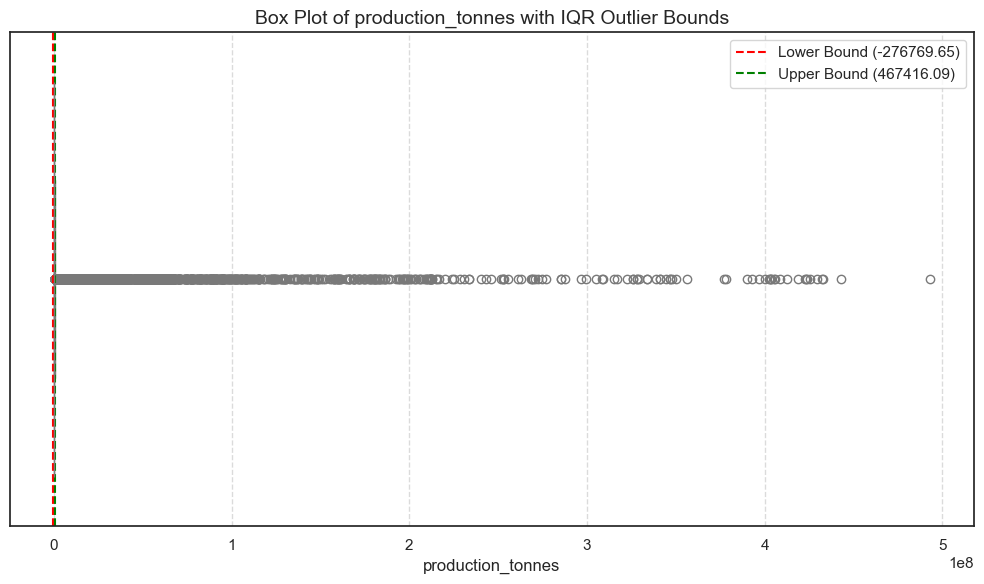

In [127]:
# Visualize the outliers in 'production_tonnes'
plot_outliers_iqr(merged_df_final, 'production_tonnes', lower_bound, upper_bound)

* GHG_kg: Emissions intensity

In [128]:
outliers, lower_bound, upper_bound = detect_outliers_iqr(merged_df_final, 'GHG_kg')
outliers

element_type      country  year  \
4             Afghanistan  1961   
15            Afghanistan  1962   
26            Afghanistan  1963   
37            Afghanistan  1964   
685               Albania  1961   
...                   ...   ...   
110052           Zimbabwe  2008   
110054           Zimbabwe  2008   
110061           Zimbabwe  2009   
110063           Zimbabwe  2009   
110160           Zimbabwe  2020   

element_type                                       food_item  \
4                             Meat of goat, fresh or chilled   
15                            Meat of goat, fresh or chilled   
26                            Meat of goat, fresh or chilled   
37                            Meat of goat, fresh or chilled   
685           Meat of cattle with the bone, fresh or chilled   
...                                                      ...   
110052                        Meat of goat, fresh or chilled   
110054                       Meat of sheep, fresh or chilled   
110061                        Meat of goat, fresh or chilled   
110063                       Meat of sheep, fresh or chilled   
110160                        Meat of goat, fresh or chilled   

element_type  avg_year_temp_change country_code  emissions_CO2eq_AR5  \
4                        -0.020294          AFG             786.4980   
15                       -0.250059          AFG             760.1865   
26                        0.851118          AFG             665.4671   
37                       -0.929118          AFG             595.3773   
685                       0.477235          ALB             673.0797   
...                            ...          ...                  ...   
110052                    0.297294          ZWE             744.8772   
110054                    0.297294          ZWE              87.7965   
110061                   -0.139941          ZWE             988.5916   
110063                   -0.139941          ZWE              68.2674   
110160                    0.423824          ZWE            1382.0977   

element_type    GHG_kg  production_tonnes  
4              64.3615           12220.00  
15             66.8296           11375.00  
26             63.1973           10530.00  
37             61.0643            9750.00  
685            92.2027            7300.00  
...                ...                ...  
110052         54.1178           13764.00  
110054        191.4864             458.50  
110061         52.8659           18700.00  
110063        174.1515             392.00  
110160         55.4278           24935.12  

[14321 rows x 8 columns]

In [129]:
# food_ite

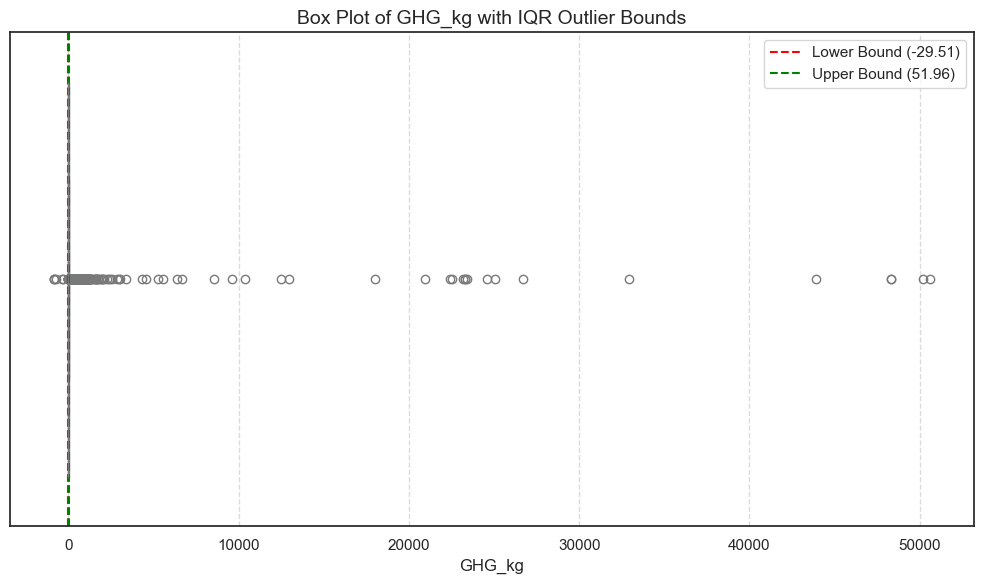

In [130]:
# Visualize the outliers in 'GHG_kg'
plot_outliers_iqr(merged_df_final, 'GHG_kg', lower_bound, upper_bound)

* emissions_CO2eq_AR5: Emissions in kilotones of CO2 emissions, kt stands for kilotonnes. Specifically, it represents 1,000 tonnes, or 1,000,000 kilograms, of carbon dioxide

In [131]:
outliers, lower_bound, upper_bound = detect_outliers_iqr(merged_df_final, 'emissions_CO2eq_AR5')
outliers

element_type      country  year  \
2             Afghanistan  1961   
5             Afghanistan  1961   
13            Afghanistan  1962   
16            Afghanistan  1962   
24            Afghanistan  1963   
...                   ...   ...   
110149           Zimbabwe  2019   
110158           Zimbabwe  2020   
110167           Zimbabwe  2021   
110176           Zimbabwe  2022   
110181           Zimbabwe  2022   

element_type                                       food_item  \
2             Meat of cattle with the bone, fresh or chilled   
5                            Meat of sheep, fresh or chilled   
13            Meat of cattle with the bone, fresh or chilled   
16                           Meat of sheep, fresh or chilled   
24            Meat of cattle with the bone, fresh or chilled   
...                                                      ...   
110149        Meat of cattle with the bone, fresh or chilled   
110158        Meat of cattle with the bone, fresh or chilled   
110167        Meat of cattle with the bone, fresh or chilled   
110176        Meat of cattle with the bone, fresh or chilled   
110181                                    Raw milk of cattle   

element_type  avg_year_temp_change country_code  emissions_CO2eq_AR5   GHG_kg  \
2                        -0.020294          AFG            1989.1250  46.2587   
5                        -0.020294          AFG            2598.4153  42.5970   
13                       -0.250059          AFG            2260.3380  49.3524   
16                       -0.250059          AFG            2624.5986  43.0262   
24                        0.851118          AFG            2278.4330  48.2208   
...                            ...          ...                  ...      ...   
110149                    1.249765          ZWE            5338.5701   8.4848   
110158                    0.423824          ZWE            5489.1397   8.7303   
110167                    0.175529          ZWE            5663.9853   8.0914   
110176                   -0.299353          ZWE            5755.7404   7.9395   
110181                   -0.299353          ZWE            1842.5600   4.3494   

element_type  production_tonnes  
2                      43000.00  
5                      61000.00  
13                     45800.00  
16                     61000.00  
24                     47250.00  
...                         ...  
110149                629189.00  
110158                628746.00  
110167                700000.00  
110176                724951.53  
110181                423632.42  

[16167 rows x 8 columns]

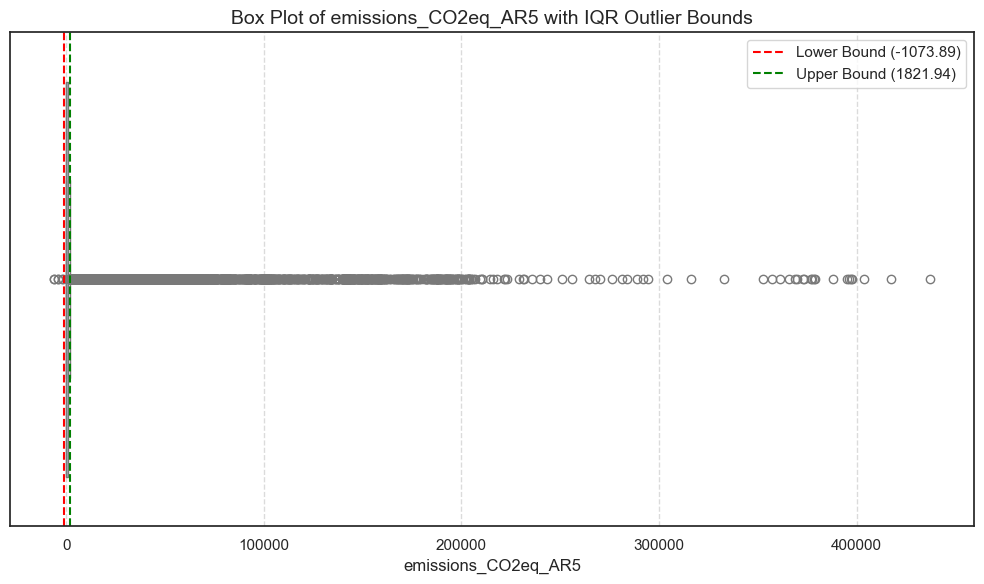

In [132]:
# Visualize the outliers in 'emissions_CO2eq_AR5'
plot_outliers_iqr(merged_df_final, 'emissions_CO2eq_AR5', lower_bound, upper_bound)

* temperature change: mean surface temperature change by country, with annual updates

In [133]:
outliers, lower_bound, upper_bound = detect_outliers_iqr(merged_df_final, 'avg_year_temp_change')
outliers

element_type      country  year  \
121           Afghanistan  1972   
122           Afghanistan  1972   
123           Afghanistan  1972   
124           Afghanistan  1972   
125           Afghanistan  1972   
...                   ...   ...   
104125            Ukraine  2020   
104126            Ukraine  2020   
104127            Ukraine  2020   
104128            Ukraine  2020   
104129            Ukraine  2020   

element_type                                       food_item  \
121                                   Cereals excluding rice   
122                                 Hen eggs in shell, fresh   
123           Meat of cattle with the bone, fresh or chilled   
124                       Meat of chickens, fresh or chilled   
125                           Meat of goat, fresh or chilled   
...                                                      ...   
104125                       Meat of sheep, fresh or chilled   
104126                                    Raw milk of cattle   
104127                                     Raw milk of goats   
104128                                     Raw milk of sheep   
104129                                                  Rice   

element_type  avg_year_temp_change country_code  emissions_CO2eq_AR5   GHG_kg  \
121                      -1.359059          AFG             446.3151   0.1257   
122                      -1.359059          AFG              25.2500   1.9650   
123                      -1.359059          AFG            2147.3105  35.2018   
124                      -1.359059          AFG               3.4865   0.3632   
125                      -1.359059          AFG             257.0373  19.7721   
...                            ...          ...                  ...      ...   
104125                    2.865882          UKR             126.7862  19.8103   
104126                    2.865882          UKR            6414.3345   0.7081   
104127                    2.865882          UKR             103.4578   0.5417   
104128                    2.865882          UKR              92.5016   6.2926   
104129                    2.865882          UKR            1322.5479  21.7954   

element_type  production_tonnes  
121                   3550000.0  
122                     12850.0  
123                     61000.0  
124                      9600.0  
125                     13000.0  
...                         ...  
104125                   6400.0  
104126                9057900.0  
104127                 191000.0  
104128                  14700.0  
104129                  60680.0  

[1040 rows x 8 columns]

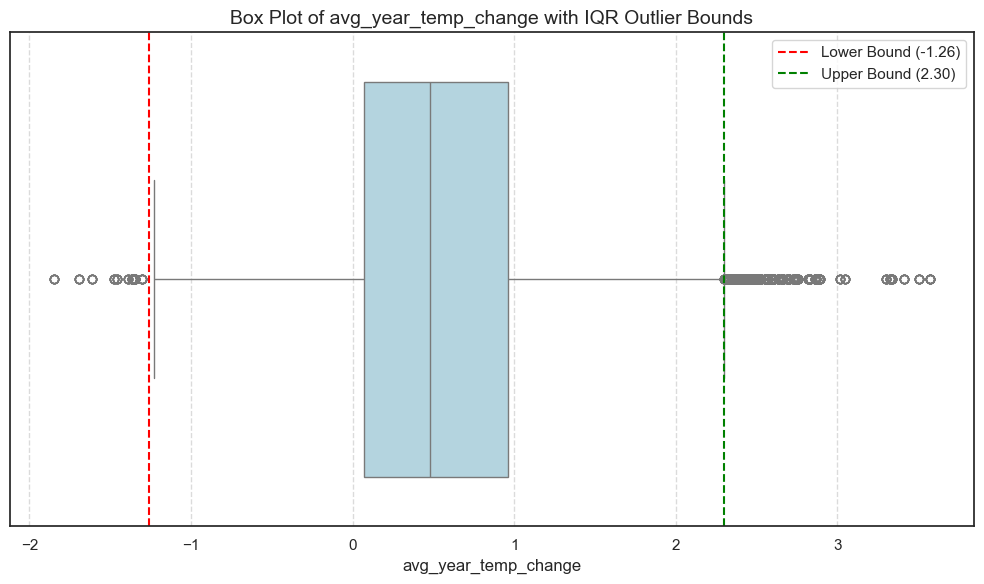

In [134]:
# Visualize the outliers in 'avg_year_temp_change'
plot_outliers_iqr(merged_df_final, 'avg_year_temp_change', lower_bound, upper_bound)


* Because the methodology follows the underlying FAOSTAT data, it does not cover cases when animals are involved in the production of both milk and meat. It should also be noted that, a consistent comparison of different livestock products (e.g. meat, milk, eggs) would require further conversion of the data provided to a common dietary unit, such as protein or energy content. 

* The single gas emissions are converted to kilotonnes of CO2eq by using the IPCC Fifth Assessment report global warming potentials, AR5 (IPCC, 2014);

* Due to this, and checking the ouliers, I have decided to split the food items per category and then check outliers per group.

##### 4.1.3.1 Grouping per food category to check for outliers

The calculation of the emissions intensities is made by commodity as follows:

* Cereals: The analysis includes the following cereal crops: Barley, Maize, Millet, Oats, Rice, Rye, Sorghum and Wheat. Emissions intensities are computed and disseminated for Rice and for the aggregate “Cereals excluding rice”

* Rice

* Meat, milk, and eggs

    * Meat, cattle / Cattle, dairy
    * Cattle, dairy (milk)
    * Meat, goat
    * Goat, dairy (milk)
    * Meat, pig / Swine, total.
    * Chicken, broilers / Meat, chicken

In [135]:
merged_df_final['food_item'].unique()

array(['Cereals excluding rice', 'Hen eggs in shell, fresh',
       'Meat of cattle with the bone, fresh or chilled',
       'Meat of chickens, fresh or chilled',
       'Meat of goat, fresh or chilled',
       'Meat of sheep, fresh or chilled', 'Raw milk of camel',
       'Raw milk of cattle', 'Raw milk of goats', 'Raw milk of sheep',
       'Rice', 'Meat of pig with the bone, fresh or chilled',
       'Raw milk of buffalo', 'Meat of buffalo, fresh or chilled'],
      dtype=object)

---

------------------------------------------------- 1. Define Outlier Detection Function (Per Group) -----------------------------------------------------------------

In [136]:
# --- 1. Define Outlier Detection Function (Per Group) ---
def detect_outliers_iqr_grouped(df, column_name, group_column='food_category'):
    """
    Detects outliers using the IQR method within each specified group.
    Returns a DataFrame of detected outliers and their bounds per group.
    """
    outliers_list = []
    bounds_list = []

    for group_name, group_df in df.groupby(group_column):
        if not pd.api.types.is_numeric_dtype(group_df[column_name]) or group_df[column_name].isnull().all():
            # print(f"Skipping non-numeric or all-NaN column '{column_name}' in group '{group_name}'.")
            continue

        Q1 = group_df[column_name].quantile(0.25)
        Q3 = group_df[column_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        group_outliers = group_df[(group_df[column_name] < lower_bound) | (group_df[column_name] > upper_bound)]

        if not group_outliers.empty:
            outliers_list.append(group_outliers.assign(Group=group_name, Outlier_Type='IQR'))
            bounds_list.append({
                'Group': group_name,
                'Column': column_name,
                'Lower_Bound': lower_bound,
                'Upper_Bound': upper_bound
            })
    
    all_outliers_df = pd.concat(outliers_list) if outliers_list else pd.DataFrame()
    all_bounds_df = pd.DataFrame(bounds_list) if bounds_list else pd.DataFrame()

    return all_outliers_df, all_bounds_df

In [137]:
num_var_to_check = [
    'production_tonnes',
    'GHG_kg',
    'emissions_CO2eq_AR5',
    'avg_year_temp_change'
]

print("|n--- Starting outlier detection for each numeric variable in the dataset ---")
all_detected_outliers = []
all_bounds_info = []

for col in num_var_to_check:
    if col in merged_df_final.columns and pd.api.types.is_numeric_dtype(merged_df_final[col]):
        print(f"\nDetecting outliers for column: '{col}' per food_item...")
        outliers, bounds = detect_outliers_iqr_grouped(merged_df_final, col, group_column='food_item')

        if not outliers.empty:
            all_detected_outliers.append(outliers)
            all_bounds_info.append(bounds)
            print(f"  Total IQR outliers found for '{col}': {len(outliers)}")
            print(f"  Bounds for '{col}' across items (sample):\n{bounds.head()}")
        else:
            print(f"  No IQR outliers found for '{col}' across all items.")
    else:
        print(f"  Column '{col}' not found or not numeric in merged_df_final. Skipping.")

if all_detected_outliers:
    final_outliers_df = pd.concat(all_detected_outliers).reset_index(drop=True)
    print("\n--- Summary of All Detected Outliers Across All Checked Columns and Items ---")
    print(f"Total unique outlier rows detected: {len(final_outliers_df.drop_duplicates(subset=merged_df_final.columns.tolist()))}")
    print("\nTop 10 outlier rows (sample):")
    print(final_outliers_df.head(10)[['country', 'food_item', 'production_tonnes', 'GHG_kg', 'avg_year_temp_change', 'emissions_CO2eq_AR5', 'Group']])
 
    final_outliers_df.to_csv('detected_outliers_by_item.csv', index=False)
    print("\nDetailed outlier report saved to 'detected_outliers_by_item.csv'.")
else:
    print("\nNo outliers detected across any specified numerical columns or food items.")

if all_bounds_info:
    final_bounds_df = pd.concat(all_bounds_info).reset_index(drop=True)
    print("\n--- Summary of Outlier Bounds by Item and Column ---")
    print(final_bounds_df.head(10))
    final_bounds_df.to_csv('outlier_bounds_by_item.csv', index=False)
    print("Outlier bounds report saved to 'outlier_bounds_by_item.csv'.")

|n--- Starting outlier detection for each numeric variable in the dataset ---

Detecting outliers for column: 'production_tonnes' per food_item...
  Total IQR outliers found for 'production_tonnes': 14797
  Bounds for 'production_tonnes' across items (sample):
                                            Group             Column  \
0                          Cereals excluding rice  production_tonnes   
1                        Hen eggs in shell, fresh  production_tonnes   
2               Meat of buffalo, fresh or chilled  production_tonnes   
3  Meat of cattle with the bone, fresh or chilled  production_tonnes   
4              Meat of chickens, fresh or chilled  production_tonnes   

   Lower_Bound  Upper_Bound  
0 -4920666.875  8383200.125  
1  -128722.380   219937.300  
2   -65266.875   111724.125  
3  -207778.100   354828.460  
4  -146950.000   252650.000  

Detecting outliers for column: 'GHG_kg' per food_item...
  Total IQR outliers found for 'GHG_kg': 5801
  Bounds for 'GHG_kg' 

In [138]:
detected_outliers = pd.read_csv('detected_outliers_by_item.csv')
detected_outliers

country  year               food_item  avg_year_temp_change  \
0       Argentina  1961  Cereals excluding rice              0.123353   
1       Argentina  1962  Cereals excluding rice             -0.016353   
2       Argentina  1963  Cereals excluding rice              0.104176   
3       Argentina  1964  Cereals excluding rice             -0.387000   
4       Argentina  1965  Cereals excluding rice              0.060588   
...           ...   ...                     ...                   ...   
35738     Ukraine  2015                    Rice              2.192647   
35739     Ukraine  2019                    Rice              2.487824   
35740     Ukraine  2020                    Rice              2.865882   
35741  Uzbekistan  2016                    Rice              2.146941   
35742  Uzbekistan  2022                    Rice              2.210176   

      country_code  emissions_CO2eq_AR5   GHG_kg  production_tonnes  \
0              ARG            1398.0821   0.0976        14322300.00   
1              ARG            1299.6215   0.0947        13727900.00   
2              ARG            1668.9923   0.0976        17094300.00   
3              ARG            1927.6983   0.0937        20567500.00   
4              ARG            1441.7627   0.1066        13519500.00   
...            ...                  ...      ...                ...   
35738          UKR             802.3064  12.8348           62510.00   
35739          UKR            1138.4780  20.8627           54570.00   
35740          UKR            1322.5479  21.7954           60680.00   
35741          UZB            1309.0498   2.8962          451981.00   
35742          UZB            1272.2181   3.5423          359147.06   

                        Group Outlier_Type  
0      Cereals excluding rice          IQR  
1      Cereals excluding rice          IQR  
2      Cereals excluding rice          IQR  
3      Cereals excluding rice          IQR  
4      Cereals excluding rice          IQR  
...                       ...          ...  
35738                    Rice          IQR  
35739                    Rice          IQR  
35740                    Rice          IQR  
35741                    Rice          IQR  
35742                    Rice          IQR  

[35743 rows x 10 columns]

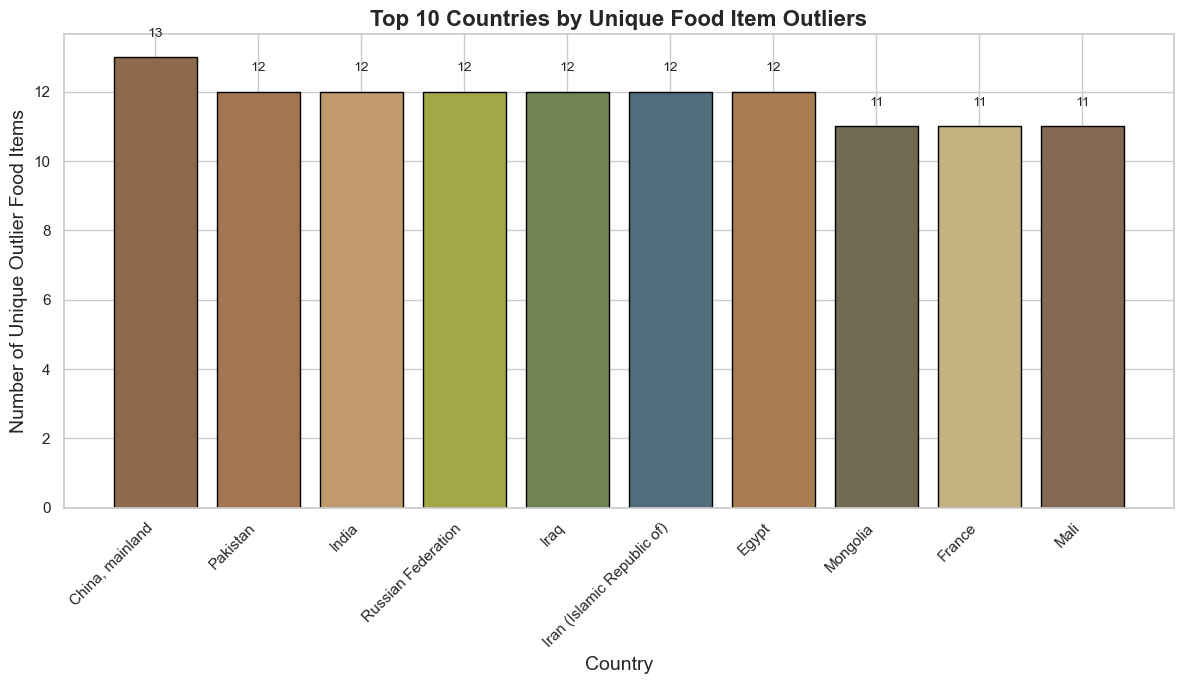

In [139]:
# Define custom earth-tone colors
earth_tones = ['#8C6A4B', '#A47551', '#C19A6B', '#A3A847', '#718355',
               '#4F6D7A', '#A97C50', '#726953', '#C2B280', '#836953']

# Count unique outlier food items per country
list_of_food_outliers_per_country = final_outliers_df.groupby('country')['food_item'].nunique().sort_values(ascending=False)

# Prepare top 10 data
top10_outliers = list_of_food_outliers_per_country.head(10)

# Set plot style
sns.set_style('whitegrid')

# Create the bar plot
plt.figure(figsize=(12, 7))
bars = plt.bar(top10_outliers.index, top10_outliers.values, 
               color=earth_tones, edgecolor='black')

# Annotate bars with values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, 
             f'{int(height)}', ha='center', va='bottom', fontsize=10)

# Add titles and labels
plt.title('Top 10 Countries by Unique Food Item Outliers', fontsize=16, weight='bold')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Unique Outlier Food Items', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

---

---------------------------------------------------------------- Outiers in production_tonnes by food_item. -------------------------------------------------------------


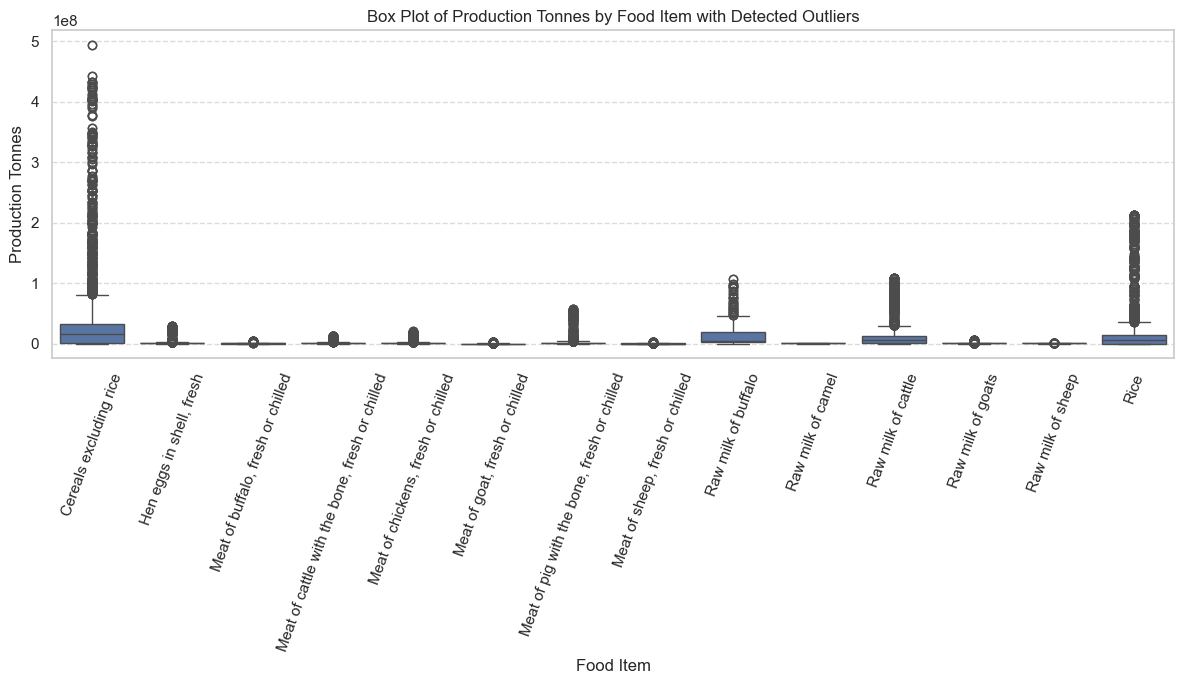

In [140]:
# Visualize the outliers in 'production_tonnes' by 'food_item'
plt.figure(figsize=(12, 7))
sns.boxplot(data=detected_outliers, x='food_item', y='production_tonnes')
plt.xticks(rotation=70)
plt.title('Box Plot of Production Tonnes by Food Item with Detected Outliers')
plt.xlabel('Food Item')
plt.ylabel('Production Tonnes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


* At simple view we can see some in the category of Cereals; Meat of sheep, fresh or chilled; and Rice.

* In the rice and cereals categories, it could point to true production extremes in some countries or years due that some have exceptionally high or low harvests production/volumnes due to weather, policy or economic factors.

* Rice and Cereals naturally involve massive production volumes. A production figure that might be an "outlier" for a small country's fruit harvest could be a perfectly normal or even low value for a major grain-producing nation like China or India.

* Deleting these high production_tonnes outliers would significantly distort the analysis. It would inaccurately reduce the total food production figures for these key categories and countries, subsequently misrepresenting their true contribution to global food supply and, by extension, their total GHG emissions.

I will investigate per country to see what can I find:

In [141]:
detected_outliers.describe().T.style.background_gradient(cmap='Blues', low=0, high=1, axis=None).set_properties(**{'font-size': '12pt'})

In [142]:
# Identify the countries with the high emissions number in production tonnes for Rice, Cereals excluding rice, Raw milk of camel and Meat of sheep, fresh or chilled
threshold = 1  # Define a threshold for high emissions

high_production_cereals = detected_outliers[(detected_outliers['food_item'] == 'Cereals excluding rice') & (detected_outliers['production_tonnes'] > threshold)]
high_production_bufalo_milk = detected_outliers[(detected_outliers['food_item'] == 'Raw milk of buffalo') & (detected_outliers['production_tonnes'] > threshold)]
high_production_cattle_milk = detected_outliers[(detected_outliers['food_item'] == 'Raw milk of cattle') & (detected_outliers['production_tonnes'] > threshold)]
high_production_rice = detected_outliers[(detected_outliers['food_item'] == 'Rice') & (detected_outliers['production_tonnes'] > threshold)]

# Display the countries with high emissions in rice production
print("Countries with outliers in Rice production:")
print(high_production_rice[['country', 'year', 'production_tonnes', 'food_item']])

print("\nCountries with outliers in Raw milk of buffalo production:")
print(high_production_bufalo_milk[['country', 'year', 'production_tonnes', 'food_item']])

print("\nCountries with outliers in Raw milk of cattle production:")
print(high_production_cattle_milk[['country', 'year', 'production_tonnes', 'food_item']])

print("\nCountries with outliers in Cereals excluding rice production:")
print(high_production_cereals[['country', 'year', 'production_tonnes', 'food_item']])

Countries with outliers in Rice production:
          country  year  production_tonnes food_item
13769  Bangladesh  1961        14426184.00      Rice
13770  Bangladesh  1962        13304520.00      Rice
13771  Bangladesh  1963        15934944.00      Rice
13772  Bangladesh  1964        15753588.00      Rice
13773  Bangladesh  1965        15750540.00      Rice
...           ...   ...                ...       ...
35738     Ukraine  2015           62510.00      Rice
35739     Ukraine  2019           54570.00      Rice
35740     Ukraine  2020           60680.00      Rice
35741  Uzbekistan  2016          451981.00      Rice
35742  Uzbekistan  2022          359147.06      Rice

[2865 rows x 4 columns]

Countries with outliers in Raw milk of buffalo production:
                    country  year  production_tonnes            food_item
10590       China, mainland  1980         1390000.00  Raw milk of buffalo
10591       China, mainland  1981         1410000.00  Raw milk of buffalo
10592       C

* We have some possible outliers in the category of Cereals, excluding rice: Argentina, Brazil, Nigeria, Poland, Romania, South Africa, Ukraine

* In the category of rice: Pakistan, South Africa

* In the category of Raw milk of camel: Solamia (lower bound)

* In the category of Meat of sheep, fresh or chilled: New Zealand, Mongolia, Australia 

Let's break down by category:

--------------------------------------------------------------- Cereals excluding rice ---------------------------------------------------------------------------


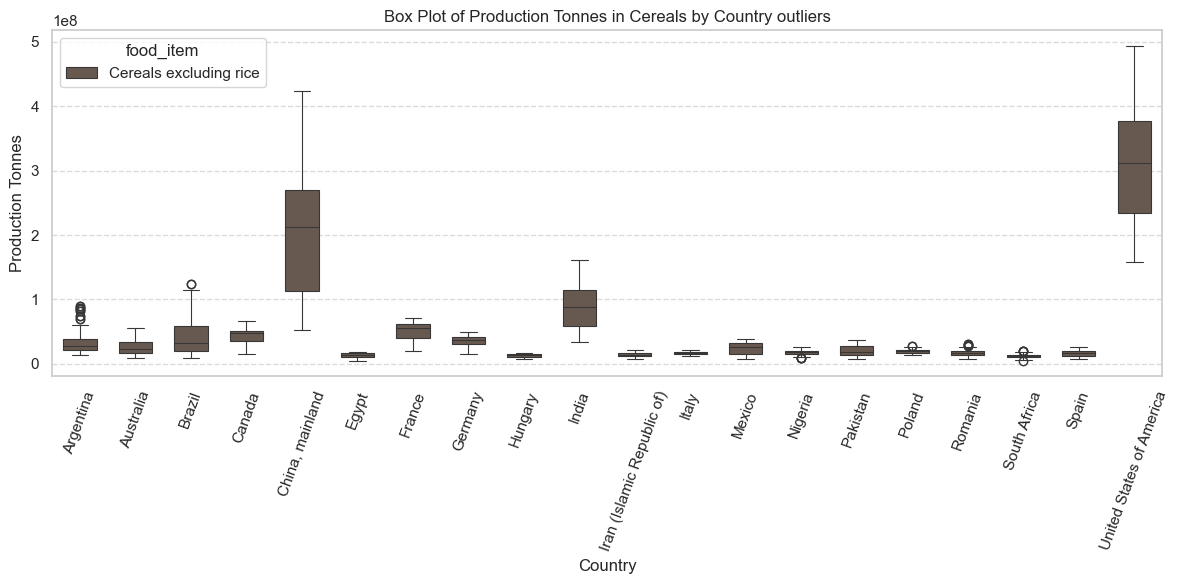

In [143]:
# visualize the outliers high_production_cereals
# Top 10 countries

custom_palette = {
    'Rice': "#FFB300B2",
    'Raw milk of buffalo': '#D7263D',
    'Cereals excluding rice': '#6C584C',
    'Raw milk of cattle': "#B69625"
}

# Concatenate both DataFrames
outlier_df1 = pd.concat([high_production_cereals])

top_countries = outlier_df1['country'].value_counts().nlargest(20).index
outlier_df1 = outlier_df1[outlier_df1['country'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=outlier_df1,
    x='country',
    y='production_tonnes',
    hue='food_item',
    palette=[custom_palette['Cereals excluding rice']],
    showfliers=True,  # Show outliers
    linewidth=0.8,
    width=0.6
)
plt.xticks(rotation=70)
plt.title('Box Plot of Production Tonnes in Cereals by Country outliers')
plt.xlabel('Country')
plt.ylabel('Production Tonnes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

* China, mainland: Exhibits a very large production range, with its upper quartile and whiskers extending significantly higher than most other countries.

* United States of America: Shows an even more pronounced high production, with its box and whiskers reaching the highest values on the chart, confirming it as a dominant producer.

* Brazil, Argentina, Canada, India, Ukraine: These countries also show generally higher production levels than others, and their upper ranges or individual data points might be flagged as "outliers" relative to the global distribution, but are large within their own contexts.

* Global Scale: When looking at worldwide cereal production, countries like China and the USA have truly massive agricultural output. Their production volumes are so far above the average (or even the upper quartile) of other countries that they are statistically flagged as outliers because they are extreme values in the global distribution.

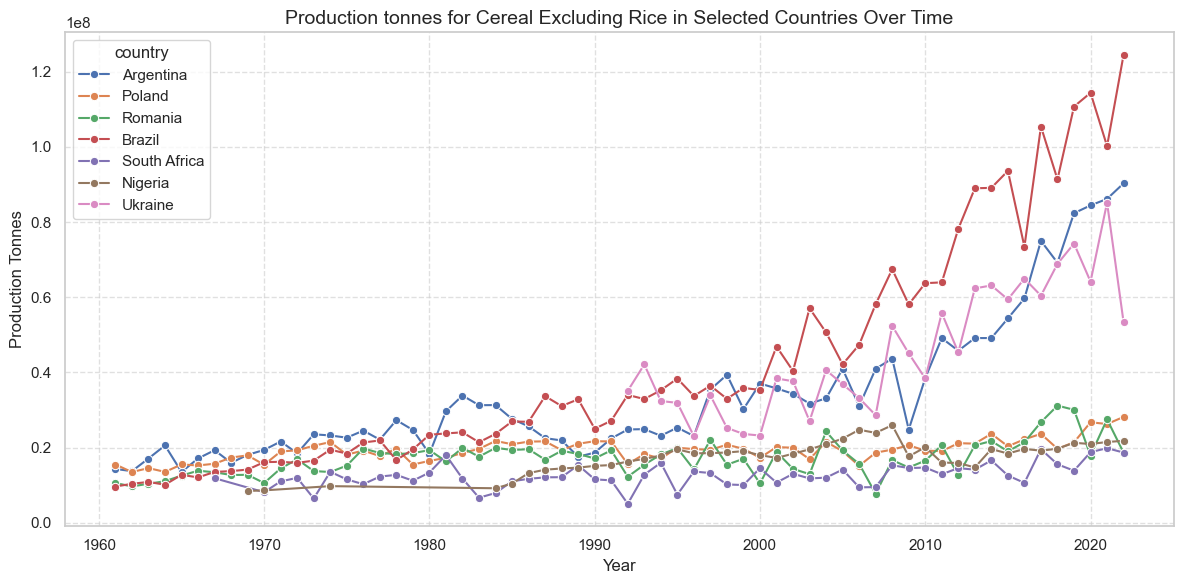

In [144]:
# Cereal excluding rice outliers in selected countries

df_cereal_excluding_rice = detected_outliers[
    (detected_outliers['food_item'] == 'Cereals excluding rice') &  
    (detected_outliers['country'].isin(['Argentina', 'Brazil', 'Nigeria', 'Poland', 'Romania', 'South Africa', 'Ukraine']))
].sort_values(by='year')


if not df_cereal_excluding_rice.empty:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_cereal_excluding_rice, x='year', y='production_tonnes', hue='country', marker='o', errorbar=None)
    plt.title('Production tonnes for Cereal Excluding Rice in Selected Countries Over Time', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Production Tonnes', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
else:
    print("No data for Cereal Excluding Rice in Selected Countries to plot.")

* Growth Trends: Many of these countries (e.g., Brazil, Argentina, Ukraine) show clear and consistent growth trends in cereal production over time, especially from the 1990s onwards. Their current high production is not a sudden spike but a result of sustained agricultural development.

* Variability: While there's an overall upward trend, there's also year-to-year variability (e.g., dips in Argentina and Brazil's production), which is normal for agricultural output due to weather, policy, and market conditions.

* No Obvious Errors: Unlike the 'Rice' in 'Hong Kong SAR' example, there are no sudden, absurd, one-off spikes in production for these countries that scream "data error." The values generally appear consistent with historical agricultural development.

------------------------------------------------------------------------------------- Rice ---------------------------------------------------------------------------


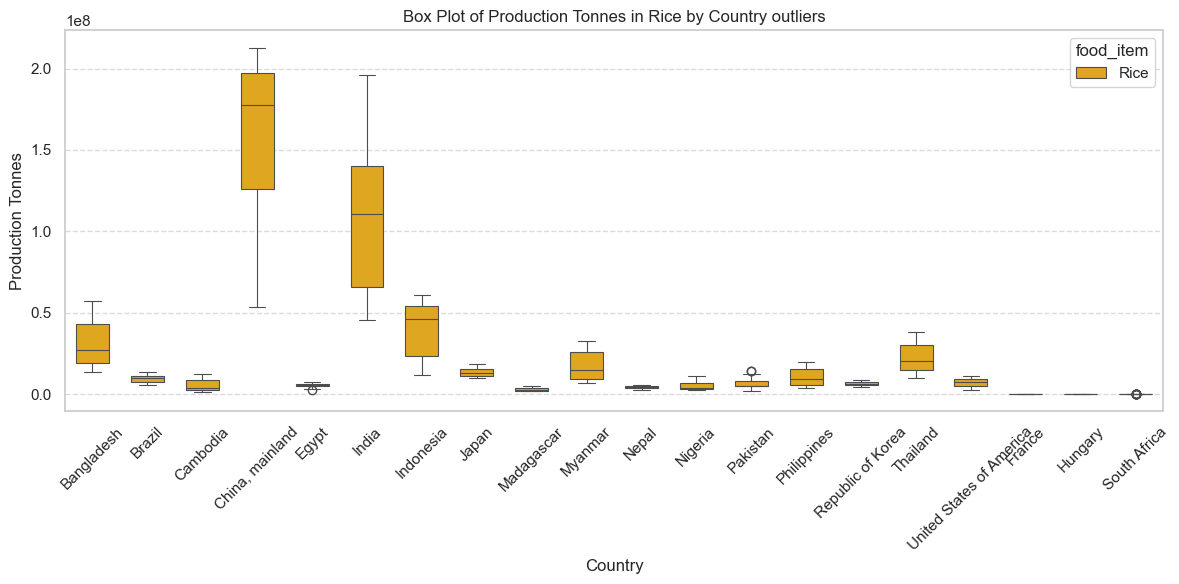

In [145]:
# visualize the outliers high_production_rice
# Top 10 countries

custom_palette = {
    'Rice': "#FFB300B2",
    'Meat of sheep, fresh or chilled': '#D7263D',
    'Raw milk of camel': "#CCCF1A",
    'Cereals excluding rice': "#0FE116",
    'Raw milk of sheep': "#B69625",
}

# Concatenate both DataFrames
outlier_df1 = pd.concat([high_production_rice])

top_countries = outlier_df1['country'].value_counts().nlargest(20).index
outlier_df1 = outlier_df1[outlier_df1['country'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=outlier_df1,
    x='country',
    y='production_tonnes',
    hue='food_item',
    palette=[custom_palette['Rice']],
    showfliers=True,  # Show outliers
    linewidth=0.8,
    width=0.6
)
plt.xticks(rotation=45)
plt.title('Box Plot of Production Tonnes in Rice by Country outliers')
plt.xlabel('Country')
plt.ylabel('Production Tonnes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

* In rice category we have a couple of outliers in Egipt, Pakistan, and South Africa.

* China, mainland: This country is by far the largest outlier. Its production volume is exceptionally high, extending far beyond the upper ranges of all other countries shown. The box itself is very tall, indicating a wide range of high production years.

* India: Similar to China, India also exhibits very large production volumes, making it a significant outlier in the global distribution, though slightly less than China.

* Indonesia, Bangladesh, Brazil, Pakistan, Philippines, Thailand: These countries also show substantial rice production, and their upper whiskers or individual data points may be flagged as outliers when compared to the global median and IQR, even if their own production is consistent.

* Given that rice is a staple food for billions, countries like China and India have agricultural scales that are truly immense. Their production volumes are so far above the average of the "rest of the world" that they are statistically classified as outliers, not because they are errors, but because they are extreme, dominant producers.

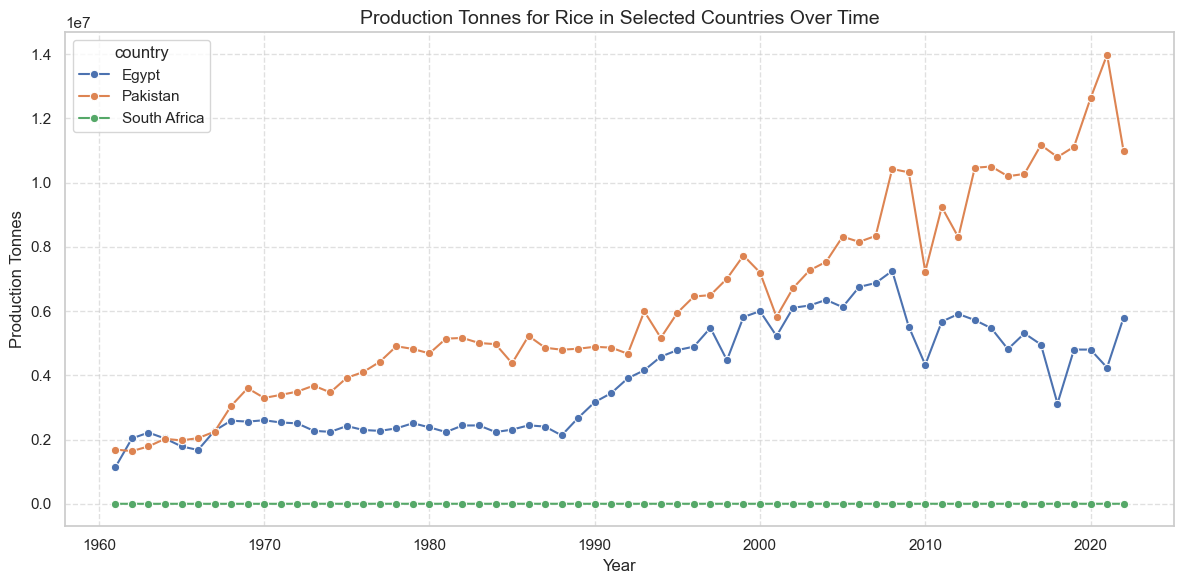

In [146]:
# Rice in production tonnes

df_rice_outliers = merged_df_final[
    (merged_df_final['food_item'] == 'Rice') &  
    (merged_df_final['country'].isin(['Egypt', 'Pakistan', 'South Africa']))].sort_values(by='year')

if not df_rice_outliers.empty:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_rice_outliers, x='year', y='production_tonnes', hue='country', marker='o', errorbar=None)
    plt.title('Production Tonnes for Rice in Selected Countries Over Time', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Production Tonnes', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
else:
    print("No data for Rice in Selected Countries to plot.")

The second graph, showing 'Production Tonnes' for Rice in South Africa, Pakistan, and Egypt over time, provides crucial context for some of the countries shown in the box plot:

* Pakistan: Shows a strong and consistent upward trend in rice production from 1960 to 2020. There are natural year-to-year fluctuations, but the overall growth is clear. Its higher production (compared to South Africa and Egypt) naturally positions it as an "outlier" relative to those smaller producers.

* Egypt: Also demonstrates a significant growth trend in rice production, especially from the late 1990s onwards.

* South Africa: Shows a remarkably flat and near-zero production for rice across the entire period. This is an outlier on the low end, indicating that rice is not a significant crop for them, or perhaps their data is consistently reported as very low.

* Growing Producers (Pakistan, Egypt): Countries like Pakistan and Egypt show that their increasing production over time can lead them to be statistical outliers relative to countries with lower or stagnant production. This signifies agricultural development and increasing importance in the rice market.

* Low Producers (South Africa): Countries with consistently low production are also statistical outliers, but on the lower end. This is also a genuine data point reflecting their agricultural focus.

* I will keep those outliers, and use them as core for my analysis.

------------------------------------------------------------------------------- Raw milk of buffalo and cattle ------------------------------------------------------------------------

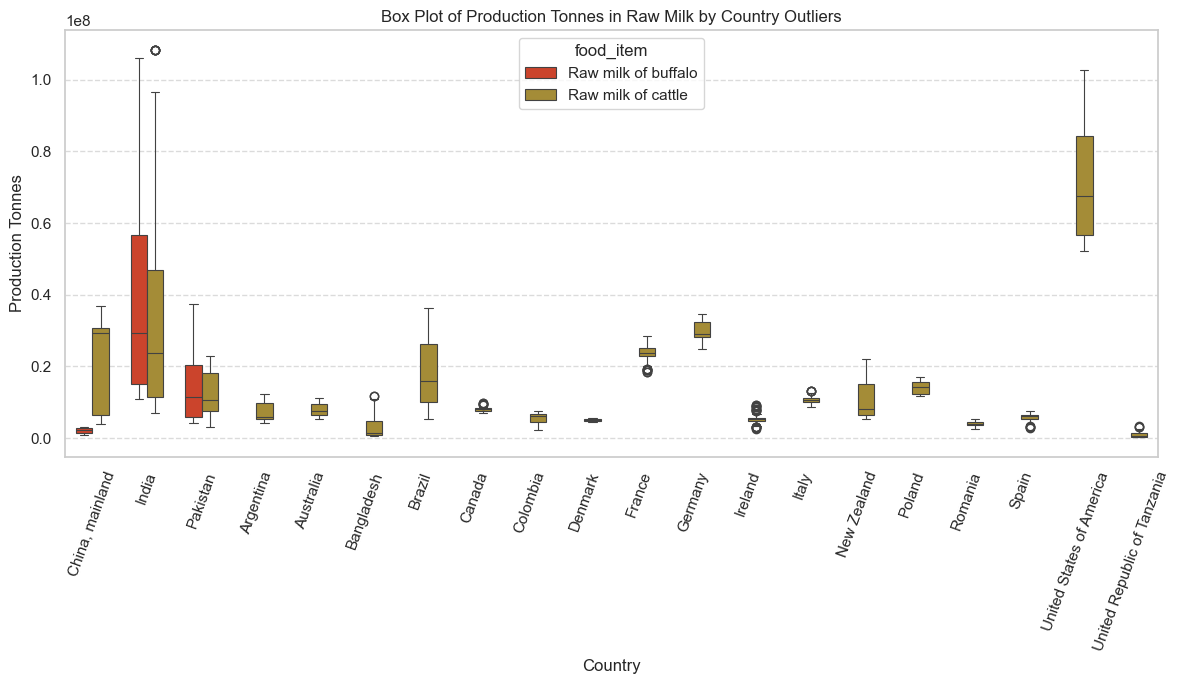

In [147]:
# visualize the outliers in raw milk of buffalo and cattle per country 
# Top 10 countries

custom_palette = {
    'Rice': "#FFB300B2",
    'Meat of sheep, fresh or chilled': '#D7263D',
    'Raw milk of buffalo': "#E63111",
    'Cereals excluding rice': '#6C584C',
    'Raw milk of cattle': "#B69625",
}

# Concatenate both DataFrames
outlier_df1 = pd.concat([high_production_bufalo_milk, high_production_cattle_milk])

top_countries = outlier_df1['country'].value_counts().nlargest(20).index
outlier_df1 = outlier_df1[outlier_df1['country'].isin(top_countries)]

plt.figure(figsize=(12, 7))
sns.boxplot(
    data=outlier_df1,
    x='country',
    y='production_tonnes',
    hue='food_item',
    palette=[custom_palette['Raw milk of buffalo'], custom_palette['Raw milk of cattle']],
    showfliers=True,  # Show outliers
    linewidth=0.8,
    width=0.6
)
plt.xticks(rotation=70)
plt.title('Box Plot of Production Tonnes in Raw Milk by Country Outliers')
plt.xlabel('Country')
plt.ylabel('Production Tonnes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

* Raw Milk of Buffalo:

    * India: Stands out as the largest producer, with its box and whiskers reaching extremely high production volumes.

    * China, mainland: Also shows very significant buffalo milk production, though slightly less than India.

    * Pakistan: A prominent producer of buffalo milk, indicating its importance in their dairy sector.

These three countries are clearly the primary "outliers" for buffalo milk production, dominating the global supply.

* Raw Milk of Cattle:

    * United States of America: Shows the highest production volumes for cattle milk, reaching above 0.8e8 tonnes, making it a clear outlier.

    * India, China, mainland, Brazil: Also exhibit very large cattle milk production, consistently ranking among the top global producers.

    * France, Germany, New Zealand, Poland, Ireland, Italy: These are significant cattle milk producers, with notable volumes, but on a scale lower than the global giants.



Why these countries are considered "outliers" by the box plot method:

* Global Dairy Powerhouses: The countries identified as "outliers" (USA, India, China, Pakistan, Brazil) are indeed the world's largest dairy producers (whether from cattle or buffalo). Their massive production volumes are genuine and fundamentally define the scale of the global dairy industry.

* Scale of Operations: The sheer scale of their dairy farming, driven by large populations and established agricultural economies, means their production figures are far removed from the global median or the production levels of smaller dairy-producing nations. The statistical outlier definition simply captures this extreme scale.

* Specialization (Buffalo Milk): For buffalo milk, the production is even more concentrated in specific regions (South Asia, Southeast Asia, parts of China, Italy), where buffalo are traditionally farmed for dairy. India, China, and Pakistan are leaders in this specialized segment.

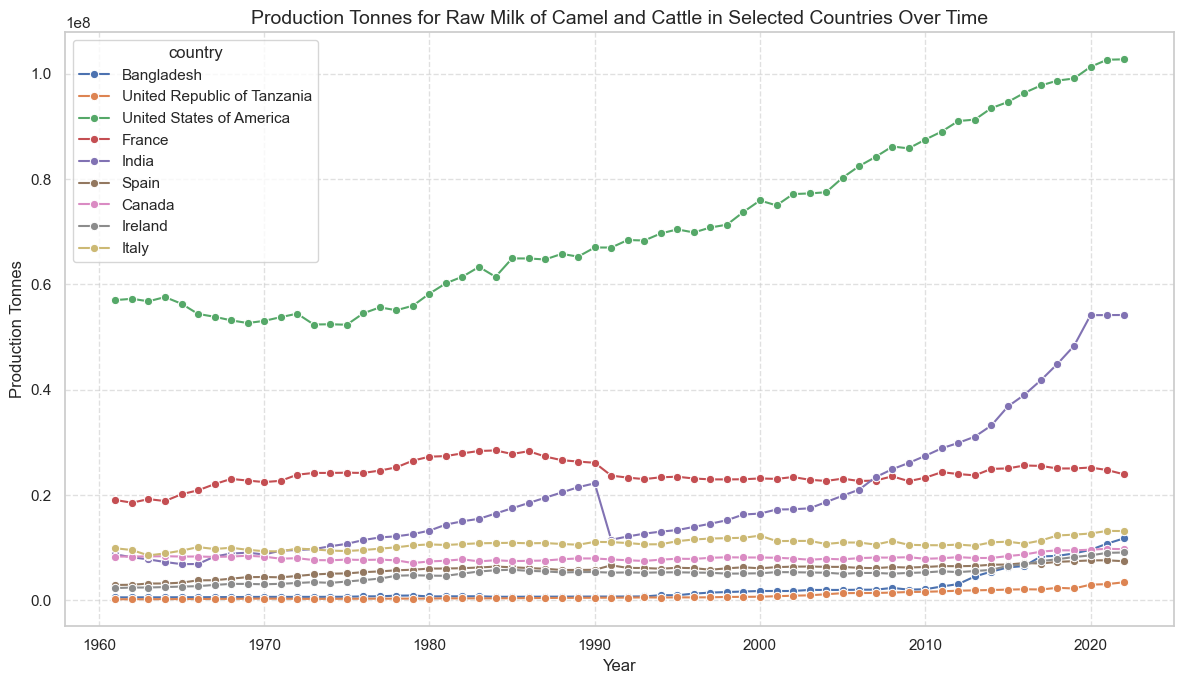

In [148]:
# Raw milk of camel in production tonnes

df_camel_milk_outliers = merged_df_final[
    (merged_df_final['food_item'].isin(['Raw milk of camel', 'Raw milk of cattle'])) &  
    (merged_df_final['country'].isin(['India', 'Bangladesh', 'Canada', 'France', 'Ireland', 'Italy', 'Spain', 'United Republic of Tanzania', 'United States of America']))].sort_values(by='year')

if not df_camel_milk_outliers.empty:
    plt.figure(figsize=(12, 7))
    sns.lineplot(data=df_camel_milk_outliers, x='year', y='production_tonnes', hue='country', marker='o', errorbar=None)
    plt.title('Production Tonnes for Raw Milk of Camel and Cattle in Selected Countries Over Time', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Production Tonnes', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
else:
    print("No data for Raw Milk of Camel and Cattle in Selected Countries to plot.")

* Dominant Growth, India and the USA:

    * The most striking trend is for India and the USA, showing explosive, consistent growth in 'Production Tonnes' from around 20 million tonnes in 1960 to nearly 60 million tonnes by 2020. This is an enormous increase and clearly positions India as a global dairy powerhouse. And the US from around 60 milliones tonnes in the 60s to almost 1 million tonnes in 2020.

    * Interpretation: India's and the US trajectory reflects a massive increase in dairy production, likely driven by domestic demand, population growth, and agricultural development. These are not "outliers" in the sense of errors, but rather extreme growth and volume that make India a dominant force and thus a statistical outlier in terms of total production volume.

    * India's low point in 1990 it's very unlikely to be a data error given the context of agricultural data:
        * Weather Events: A severe drought, flood, or other adverse weather conditions in 1989-1990 could have impacted pasture quality, feed availability, or directly affected livestock health, leading to lower milk yields.

        * Disease Outbreaks: An outbreak of a livestock disease (e.g., Foot-and-Mouth Disease, Rinderpest, or other prevalent cattle/buffalo diseases) could temporarily reduce herd sizes or milk production.

        * Economic Factors: Changes in dairy prices, government policies, or feed costs could have disincentivized production for a short period.

        * Policy Changes: Major agricultural reforms or policy shifts could sometimes lead to temporary disruptions in supply.



* Steady Producers (France, Italy, Canada, Spain, Ireland, Bangladesh):

    * France shows high and relatively stable production, with some fluctuations, but generally within a consistent range (around 20-25 million tonnes).

    * Italy, Canada, Spain, and Ireland also show generally stable or slowly increasing trends, but at significantly lower volumes than India and France.

    * Bangladesh shows slow but consistent growth from a very low base.

* Interpretation: These countries represent mature or developing dairy sectors with consistent, but not as explosive, production volumes. Their "outlier" status (if any) in a global box plot would depend on how their volume compares to the overall distribution.

* United Republic of Tanzania: Starts at a very low base and shows very slow, gradual growth. This country's production volume is consistently much lower than the others shown, making it a low-volume data point.
    *  Interpretation: This represents a smaller-scale or emerging dairy sector.

---
---------------------------------------------------------------- Outiers in variable GHG_kg by food_item. ---------------------------------------------------------------

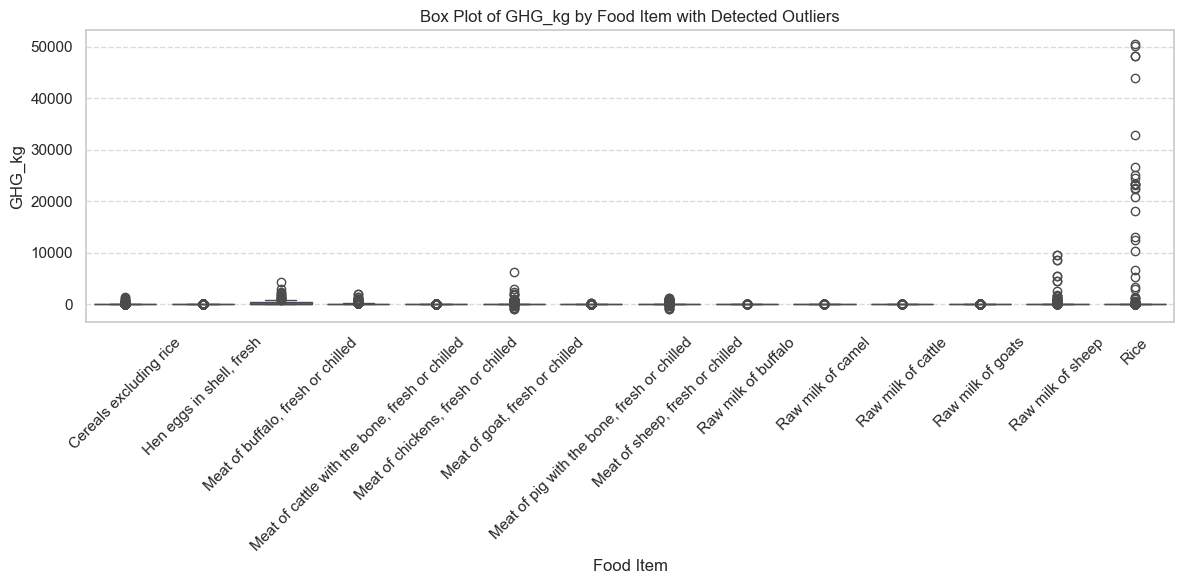

In [149]:
# Visualize the outliers in the variable 'GHG_kg' by 'food_item'
plt.figure(figsize=(12, 6))
sns.boxplot(data=detected_outliers, x='food_item', y='GHG_kg')
plt.xticks(rotation=45)
plt.title('Box Plot of GHG_kg by Food Item with Detected Outliers')
plt.xlabel('Food Item')
plt.ylabel('GHG_kg')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

 * Greenhouses per kg (GHG) per kg in food_item

* The most extreme one is the category of Rice:
    * It is a well-known phenomenon in agricultural emissions that rice is often grown in flooded fields (paddy fields). Anaerobic decomposition of organic matter in these waterlogged soils by microbes produces large amounts of methane (CH4), a potent greenhouse gas (about 28 times more potent than CO over 100 years).
    * Nitrogen fertilizer application can also influence methane emissions indirectly.
    * Different soil types and climates can also lead to variations in methane production rates.

* Raw milk of sheep: 
    * Ruminant Emissions: Sheep are ruminant animals, similar to cattle and goats. Ruminants produce methane (a potent greenhouse gas) during their digestion process (enteric fermentation). This is a primary reason why livestock products, especially from ruminants, generally have a higher carbon footprint per kilogram compared to plant-based foods.
    * Feed Type: While less dominant than enteric fermentation, the type and source of feed can also contribute.
    * Regional Differences: Emissions intensity can vary greatly by country due to differences in climate, local practices, and available resources. A sheep farm in a dry, sparse region might require more resources or lead to more land degradation (and thus emissions) per kg of milk than one in a lush, temperate area.

As part of my analysis, I have decided to also not drop these outliers. They represent crucial information about the environmental hotspots in food production.
I will identify the countries associated with these high-emission rice or sheep milk productions.

In [150]:
# Identify the countries with the high emissions number in rice and sheep milk production
threshold = 5000  # Define a threshold for high emissions

high_emissions_rice = detected_outliers[(detected_outliers['food_item'] == 'Rice') & (detected_outliers['GHG_kg'] > threshold)]
high_emissions_sheep_milk = detected_outliers[(detected_outliers['food_item'] == 'Raw milk of sheep') & (detected_outliers['GHG_kg'] > threshold)]

# Display the countries with high emissions in rice production
print("Countries with high emissions in Rice production:")
print(high_emissions_rice[['country', 'year', 'GHG_kg', 'food_item']])

print("\nCountries with high emissions in Raw milk of sheep production:")
print(high_emissions_sheep_milk[['country', 'year', 'GHG_kg', 'food_item']])

Countries with high emissions in Rice production:
                    country  year      GHG_kg food_item
19931  China, Hong Kong SAR  2002  48303.6330      Rice
19932  China, Hong Kong SAR  2003  48303.6330      Rice
19933  China, Hong Kong SAR  2004  50193.7751      Rice
19934  China, Hong Kong SAR  2005  50613.8067      Rice
19935  China, Hong Kong SAR  2007  43893.3013      Rice
19936  China, Hong Kong SAR  2008  32919.9760      Rice
19937  China, Hong Kong SAR  2009  26714.0092      Rice
19938  China, Hong Kong SAR  2010  24571.8481      Rice
19939  China, Hong Kong SAR  2011  25075.8860      Rice
19940  China, Hong Kong SAR  2012  23185.7438      Rice
19941  China, Hong Kong SAR  2013  23311.7533      Rice
19942  China, Hong Kong SAR  2014  23437.7628      Rice
19943  China, Hong Kong SAR  2015  23311.7533      Rice
19944  China, Hong Kong SAR  2016  22555.6964      Rice
19945  China, Hong Kong SAR  2017  22429.6870      Rice
19946  China, Hong Kong SAR  2018  20917.5732      Ric

In [151]:
detected_outliers.describe().T.style.background_gradient(cmap='Blues', low=0, high=1, axis=None).set_properties(**{'font-size': '12pt'})

In [152]:
# Identify the countries with the high emissions number in rice and sheep milk production
threshold1 = 50  # Define a threshold for high emissions

high_emissions_rice = detected_outliers[(detected_outliers['food_item'] == 'Rice') & (detected_outliers['GHG_kg'] > threshold1)]
high_emissions_sheep_milk = detected_outliers[(detected_outliers['food_item'] == 'Raw milk of sheep') & (detected_outliers['GHG_kg'] > threshold1)]

# Display the countries with high emissions in rice production
print("Countries with high emissions in Rice production:")
print(high_emissions_rice[['country', 'year', 'GHG_kg', 'food_item']])

print("\n---Countries with high emissions in Raw milk of sheep production:\"---")
print(high_emissions_sheep_milk[['country', 'year', 'GHG_kg', 'food_item']])

Countries with high emissions in Rice production:
        country  year    GHG_kg food_item
19789   Algeria  1978  107.0193      Rice
19808   Algeria  1997   65.8861      Rice
19809   Algeria  1998   50.4211      Rice
19810   Algeria  1999   57.7129      Rice
19811   Algeria  2000   57.2371      Rice
...         ...   ...       ...       ...
20559  Zimbabwe  1982  126.4869      Rice
20560  Zimbabwe  1983   93.4420      Rice
20562  Zimbabwe  1985   86.3722      Rice
35693   Algeria  2010  102.5542      Rice
35694   Algeria  2021  120.2712      Rice

[123 rows x 4 columns]

---Countries with high emissions in Raw milk of sheep production:"---
                   country  year     GHG_kg          food_item
19732  Republic of Moldova  1992    58.9665  Raw milk of sheep
19740   Russian Federation  1992  8546.2755  Raw milk of sheep
19741   Russian Federation  1993  9606.0459  Raw milk of sheep
19742   Russian Federation  1994  5565.7041  Raw milk of sheep
19743   Russian Federation  1995  45

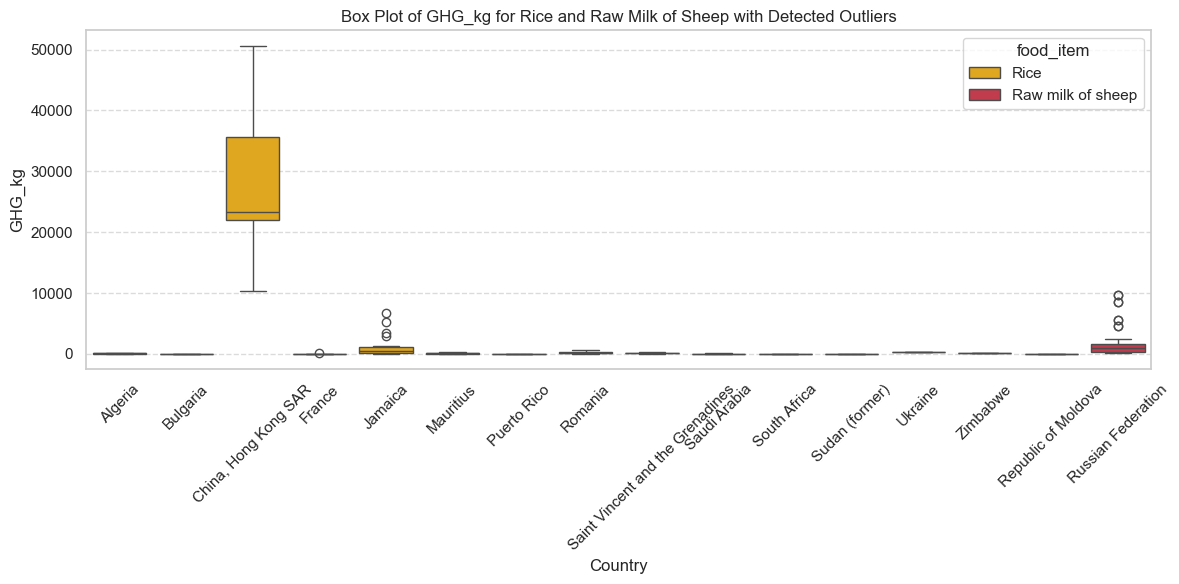

In [153]:
# visualize the outliers in high_emissions_rice and high_emissions_sheep_milk

custom_palette = {
    'Rice': "#FFB300B2",
    'Raw milk of sheep': '#D7263D',
}   

# Concatenate both DataFrames
outlier_df = pd.concat([high_emissions_rice, high_emissions_sheep_milk])

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=outlier_df,
    x='country',
    y='GHG_kg',
    hue='food_item',
    palette=[custom_palette['Rice'], custom_palette['Raw milk of sheep']]
)
plt.xticks(rotation=45)
plt.title('Box Plot of GHG_kg for Rice and Raw Milk of Sheep with Detected Outliers')
plt.xlabel('Country')
plt.ylabel('GHG_kg')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

* Hypothesis:

* Rice: High emissions in China often relate to paddy rice cultivation practices, specifically continuous flooding and residue management. China is a massive producer, so even small changes in method can have huge total impacts.

* Sheep Milk: High emissions from sheep milk in Russia could be due to factors like less efficient feeding practices, manure management, or specific regional climate/soil conditions that affect pasture quality and animal health, thus increasing emissions intensity.


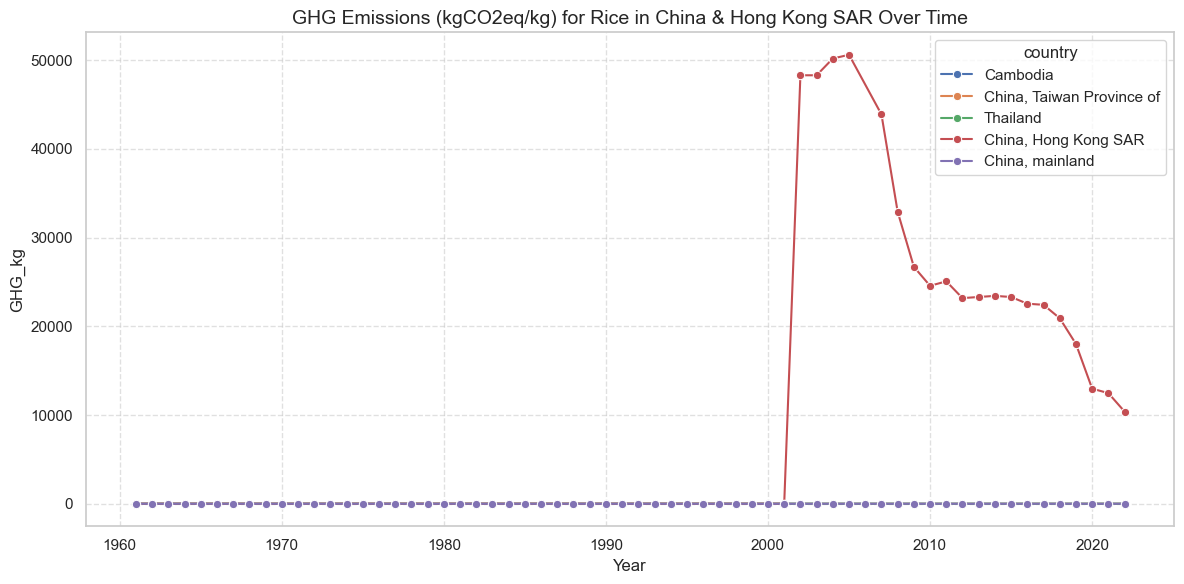

In [154]:
# Rice in China and Hong Kong SAR investigation
# Rice in China/Hong Kong SAR
df_rice_china_hk = merged_df_final[
    (merged_df_final['food_item'] == 'Rice') &  
    (merged_df_final['country'].isin(['China, Hong Kong SAR', 'China, Macao SAR', 'China, Taiwan Province of', 'China, mainland', 'Vietnam', 'Cambodia', 'Thailand']))
].sort_values(by='year')

if not df_rice_china_hk.empty:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_rice_china_hk, x='year', y='GHG_kg', hue='country', marker='o', errorbar=None)
    plt.title('GHG Emissions (kgCO2eq/kg) for Rice in China & Hong Kong SAR Over Time', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('GHG_kg', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
else:
    print("No data for Rice in China/Hong Kong SAR to plot.")

Justification for Imputing Outlier GHG Emissions for Rice in China, Hong Kong SAR:

During the outlier analysis, a significant anomaly was identified in the `ghg_per_kg` (Greenhouse Gas emissions per kilogram) values for **Rice (Milled Equivalent)** originating from **China, Hong Kong SAR**. Specifically, values from approximately 2002 through 2005 peaked at an extremely high and physically implausible level (up to ~50,000 $kgCO₂eq/kg$), followed by a sharp, yet still high, decreasing trend in subsequent years.

**The Problem:**
* **Physical Implausibility:** A `ghg_per_kg` value of 50,000 $kgCO₂eq/kg$ for rice is orders of magnitude higher than any scientifically reported emission intensity for rice production globally. Even the most methane-intensive paddy cultivation methods do not yield such extreme figures. This strongly indicates a data reporting error or a fundamental unit inconsistency in the source.
* **Skewed Analysis:** If left unaddressed, these extreme values would severely skew any aggregated KPIs related to 'Cereals & Grains' or global GHG emissions, leading to inaccurate conclusions about the environmental footprint of food categories.

**Investigation and Context:**
* An investigation into rice `ghg_per_kg` data for neighboring and significant rice-producing regions such as **China (mainland), Vietnam, and Cambodia** revealed stable and comparatively low `ghg_per_kg` values, consistent with general scientific understanding of rice cultivation emissions. This stark contrast further highlights the unique and problematic nature of the Hong Kong SAR data.
* It's understood that **FAOSTAT provides the data "as is,"** meaning that while the anomaly exists in the source, a direct correction or explanation isn't immediately available within the dataset itself. Given Hong Kong SAR's highly urbanized nature and negligible agricultural output, any reported local rice production is likely minimal and prone to reporting nuances or errors at such detailed levels.

**Decision for Imputation:**
To address this data quality issue and ensure the robustness and accuracy of downstream analyses and KPIs, the decision has been made to **impute the anomalous `ghg_per_kg` values for 'Rice (Milled Equivalent)' in 'China, Hong Kong SAR' with a more representative and plausible value.**

* **Why Imputation Instead of Deletion?** Deleting the rows entirely, even if the `ghg_per_kg` value is flawed, would create gaps in the time series data for this specific country-item combination. If the corresponding `production_tonnes` data for these years is valid, retaining the rows (with corrected `ghg_per_kg`) helps preserve data continuity and avoids undercounting total emissions or production for these periods.
* **Imputation Method:** The `ghg_per_kg` values for 'Rice (Milled Equivalent)' in 'China, Hong Kong SAR' will be replaced by the **average of its `ghg_per_kg` values from 2002 onwards**. This specific average is chosen because the graph indicates that while the absolute values remain high, a discernible decreasing trend begins after the initial peak (around 2005), suggesting a potential stabilization or improvement in reporting consistency or actual practices in later years. Averaging from 2002 leverages this post-spike behavior to derive a more reasonable, albeit still an estimated, baseline for this anomaly.

**Impact of this Decision:**
This imputation strategy ensures that:
* The integrity of the time-series data for 'Rice' in 'China, Hong Kong SAR' is maintained.
* The derived KPIs, particularly those related to `ghg_per_kg` for 'Cereals & Grains' and overall food categories, will no longer be disproportionately skewed by a single, extreme data anomaly.
* The resulting analyses and visualizations will more accurately reflect genuine environmental impact trends, allowing for more reliable insights into sustainable food systems.

---

In [155]:
# Imput the average GHG_kg for Rice in China and Hong Kong SAR from 1961 to 2001 in the years from 2002 to 2022
average_ghg_rice_china_hk = df_rice_china_hk[df_rice_china_hk['year'] <= 2001]['GHG_kg'].mean()
print(f"Average GHG_kg for Rice in China and Hong Kong SAR from 1961 to 2001: {average_ghg_rice_china_hk:.2f} kgCO2eq/kg")

# Impute the average GHG_kg for Rice in China and Hong Kong SAR from 1961 to 2001 in the years from 2002 to 2022 in the merged_df_final DataFrame
df_rice_china_hk.loc[df_rice_china_hk['year'] > 2001, 'GHG_kg'] = average_ghg_rice_china_hk

# Impute the average GHG_kg for Rice in China and Hong Kong SAR from 1961 to 2001 in the merged_df_final DataFrame
merged_df_final.loc[(merged_df_final['food_item'] == 'Rice') & 
                    (merged_df_final['country'] == 'China, Hong Kong SAR') &
                    (merged_df_final['year'] > 2001), 'GHG_kg'] = average_ghg_rice_china_hk

Average GHG_kg for Rice in China and Hong Kong SAR from 1961 to 2001: 2.19 kgCO2eq/kg


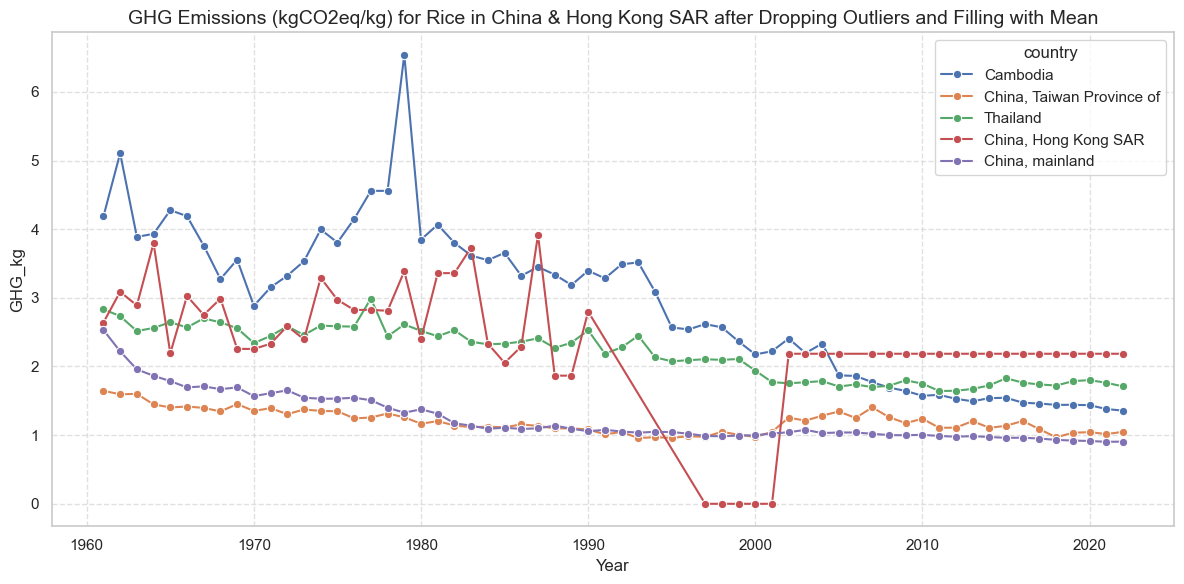

In [156]:
# Rice in China and Hong Kong SAR after dropping outliers and filling with mean
# Rice in China/Hong Kong SAR
df_rice_china_hk = merged_df_final[
    (merged_df_final['food_item'] == 'Rice') &  
    (merged_df_final['country'].isin(['China, Hong Kong SAR', 'China, Macao SAR', 'China, Taiwan Province of', 'China, mainland', 'Vietnam', 'Cambodia', 'Thailand']))
].sort_values(by='year')

if not df_rice_china_hk.empty:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_rice_china_hk, x='year', y='GHG_kg', hue='country', marker='o', errorbar=None)
    plt.title('GHG Emissions (kgCO2eq/kg) for Rice in China & Hong Kong SAR after Dropping Outliers and Filling with Mean', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('GHG_kg', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
else:
    print("No data for Rice in China/Hong Kong SAR to plot.")

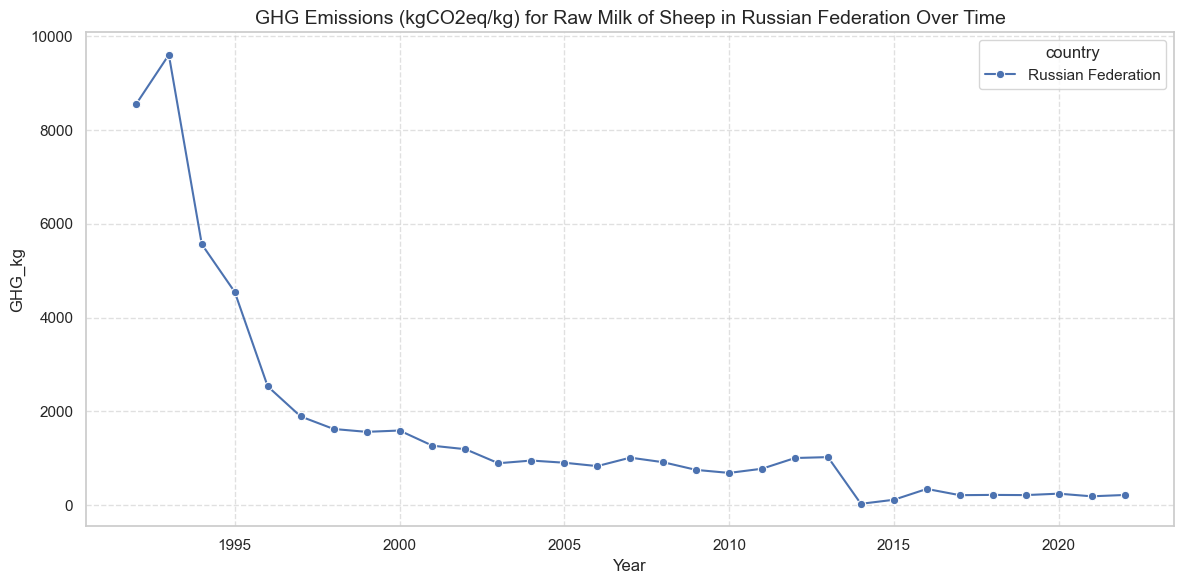

In [157]:
# Investigation of Raw milk of sheep in Russian Federation
df_sheep_milk_russia = merged_df_final[
    (merged_df_final['food_item'] == 'Raw milk of sheep') &
    (merged_df_final['country'] == 'Russian Federation')
].sort_values(by='year')

if not df_sheep_milk_russia.empty:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_sheep_milk_russia, x='year', y='GHG_kg', hue='country', marker='o', errorbar=None)
    plt.title('GHG Emissions (kgCO2eq/kg) for Raw Milk of Sheep in Russian Federation Over Time', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('GHG_kg', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
else:
    print("No data for Raw milk of sheep in Russian Federation to plot.")

* Analysis of 'Raw milk of sheep' in Russian Federation:

* The high ghg_per_kg for sheep milk in Russia is likely a genuine reflection of high emissions intensity for this product in that region. Factors contributing could include:
    * Ruminant Physiology: Sheep produce methane during digestion.
    * Production System: Specific Russian sheep farming practices (e.g., extensive grazing on less productive lands, feed quality, manure management, or lower feed     conversion efficiency) could lead to higher emissions per unit of milk.
    * Climate/Environment: Cold climates might necessitate more energy for animal housing or feed production, indirectly raising emissions.
    * Data Accuracy: Unlike the Hong Kong rice anomaly, these values for sheep milk are within ranges observed for high-impact animal agriculture globally, suggesting they are accurate within the dataset's scope.

---

---------------------------------------------------------------- Variable Avg Temperature change per year ----------------------------------------------------------------

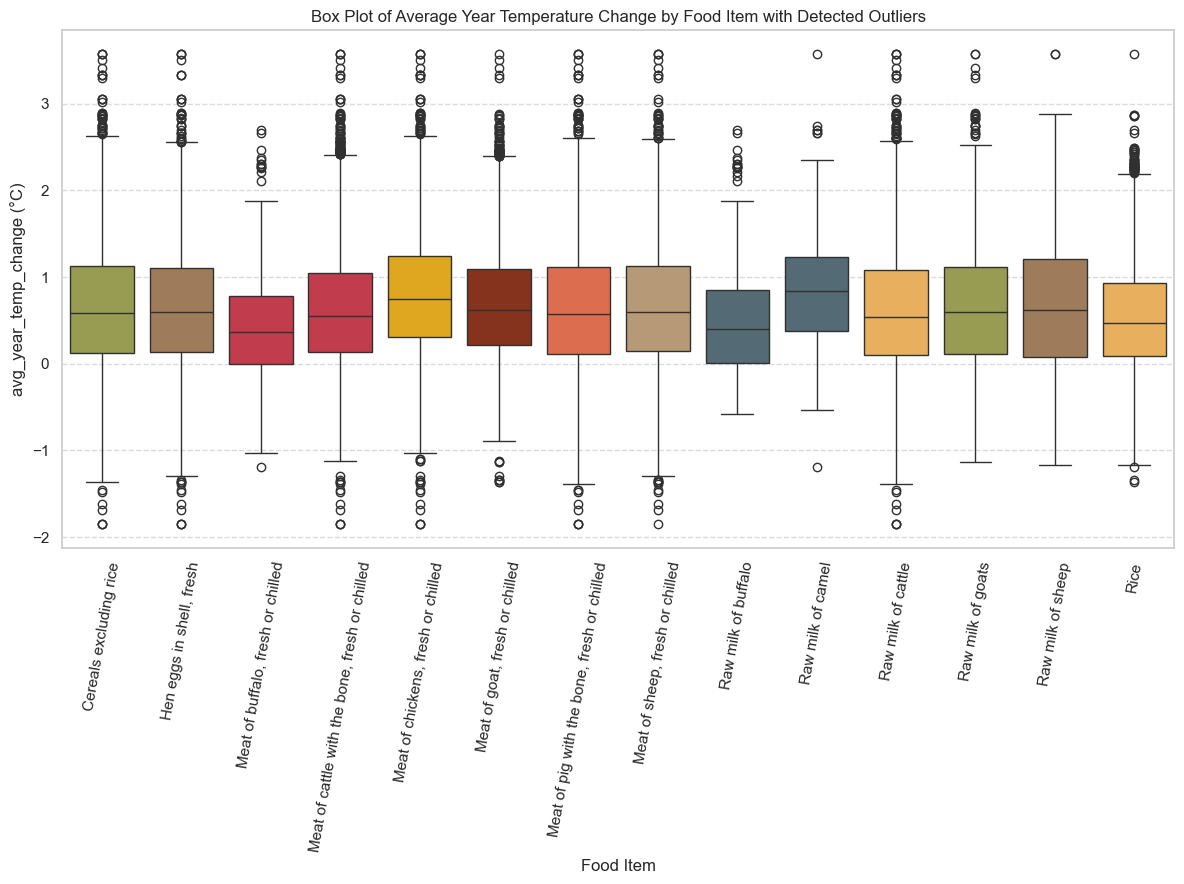

In [158]:
# Visualize the outliers in 'avg_year_temp_change' by 'food_item'

custom_palette_temp = {
    'Cereals excluding rice': '#A3A847',        # olive green
    'Hen eggs in shell, fresh': '#A97C50',          # light chestnut
    'Meat of cattle with the bone, fresh or chilled': '#D7263D',         # vivid red
    'Meat of chickens, fresh or chilled': '#FFB400',      # bold amber
    'Meat of goat, fresh or chilled': "#96290B",         # coral
    'Meat of sheep, fresh or chilled': '#C19A6B',        # soft brown
    'Raw milk of camel': '#4F6D7A',         # desaturated blue
    'Raw milk of cattle': '#FFB347',         # warm orange
    'Raw milk of goats': '#A3A847',        # olive green
    'Raw milk of sheep': '#A97C50',          # light chestnut
    'Rice': '#FFB347',         # warm orange
    'Meat of pig with the bone, fresh or chilled': "#F46036",         # coral
    'Raw milk of buffalo': '#4F6D7A',         # desaturated blue
    'Meat of buffalo, fresh or chilled': '#D7263D',         # vivid red
}

plt.figure(figsize=(12, 9))
sns.boxplot(data=detected_outliers, x='food_item', y='avg_year_temp_change', palette=custom_palette_temp)
plt.xticks(rotation=80)
plt.title('Box Plot of Average Year Temperature Change by Food Item with Detected Outliers')
plt.xlabel('Food Item')
plt.ylabel('avg_year_temp_change (°C)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [159]:
detected_outliers.describe().T.style.background_gradient(cmap='Blues', low=0, high=1, axis=None).set_properties(**{'font-size': '12pt'})

In [160]:
# Identify the countries with the high temperature change by food item
threshold = 0.67  # Define a threshold for high temperature change
high_temp_change_food = detected_outliers[detected_outliers['avg_year_temp_change'] > threshold]

# Display the countries with high temperature change
print("Countries with high temperature change by food item:")
print(high_temp_change_food[['country', 'year', 'avg_year_temp_change', 'food_item']])  

Countries with high temperature change by food item:
          country  year  avg_year_temp_change               food_item
36      Argentina  1997              0.680412  Cereals excluding rice
48      Argentina  2009              0.674706  Cereals excluding rice
51      Argentina  2012              0.725353  Cereals excluding rice
53      Argentina  2014              0.807529  Cereals excluding rice
54      Argentina  2015              0.964941  Cereals excluding rice
...           ...   ...                   ...                     ...
35738     Ukraine  2015              2.192647                    Rice
35739     Ukraine  2019              2.487824                    Rice
35740     Ukraine  2020              2.865882                    Rice
35741  Uzbekistan  2016              2.146941                    Rice
35742  Uzbekistan  2022              2.210176                    Rice

[16329 rows x 4 columns]


In [161]:
# Groups
meat_group = ['Meat of cattle with the bone, fresh or chilled', 'Meat of chickens, fresh or chilled', 'Meat of goat, fresh or chilled', 'Meat of sheep, fresh or chilled', 'Meat of pig with the bone, fresh or chilled', 'Meat of buffalo, fresh or chilled']
dairy_group = ['Raw milk of camel', 'Raw milk of cattle', 'Raw milk of goats', 'Raw milk of sheep', 'Raw milk of buffalo']
cereal_group = ['Cereals excluding rice']
rice_group = ['Rice']
egg_group = ['Hen eggs in shell, fresh']

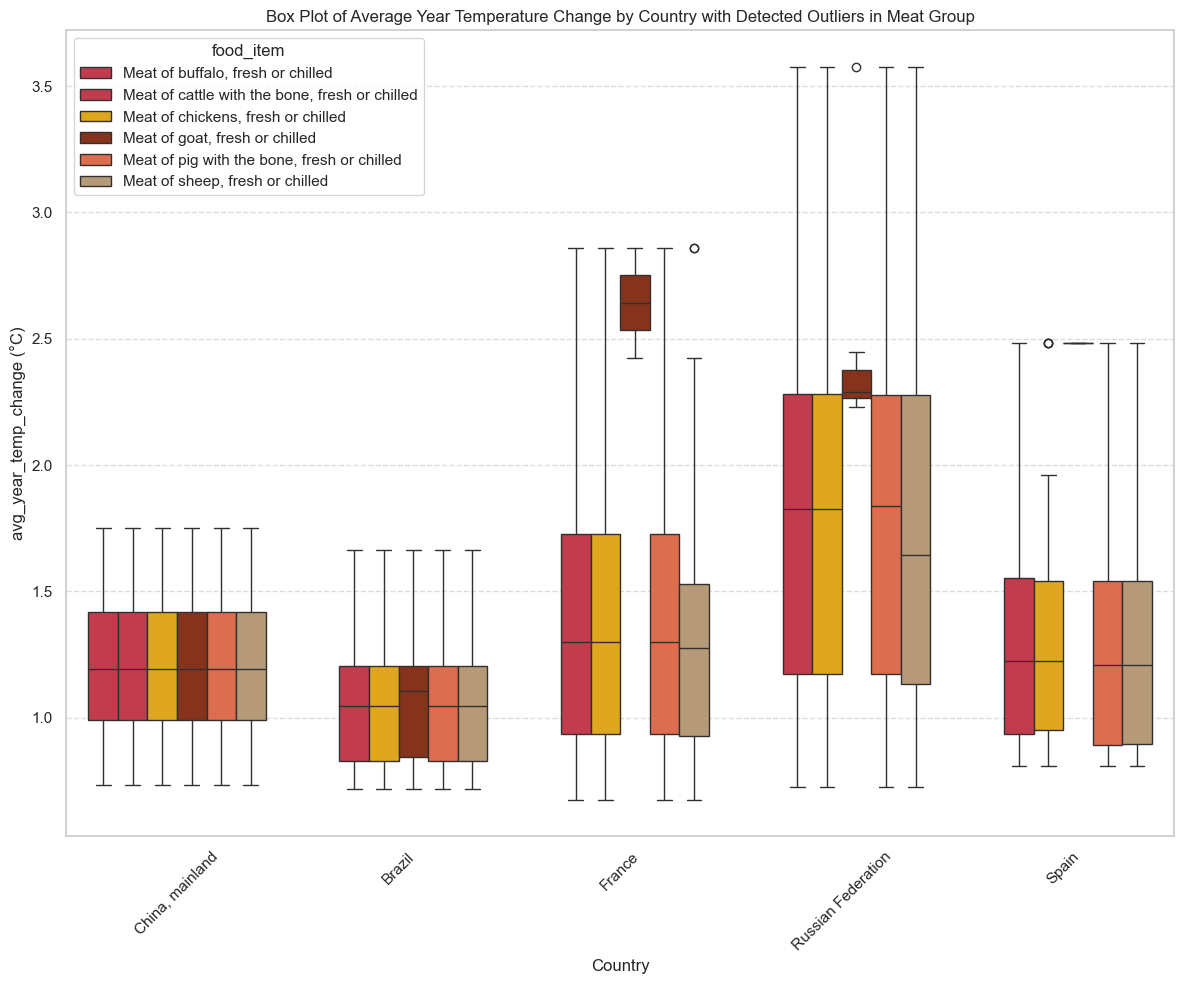

In [162]:
# Visualize the outliers in high_temp_change_food per group of food items

meat_group_temp = high_temp_change_food[high_temp_change_food['food_item'].isin(meat_group)]

top_5_temp_countries = meat_group_temp['country'].value_counts().nlargest(5).index

plt.figure(figsize=(12, 10))
sns.boxplot(
    data=meat_group_temp[meat_group_temp['country'].isin(top_5_temp_countries)],
    x='country',
    y='avg_year_temp_change',
    hue='food_item',
    palette=custom_palette_temp
)
plt.xticks(rotation=45)
plt.title('Box Plot of Average Year Temperature Change by Country with Detected Outliers in Meat Group')
plt.xlabel('Country')
plt.ylabel('avg_year_temp_change (°C)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

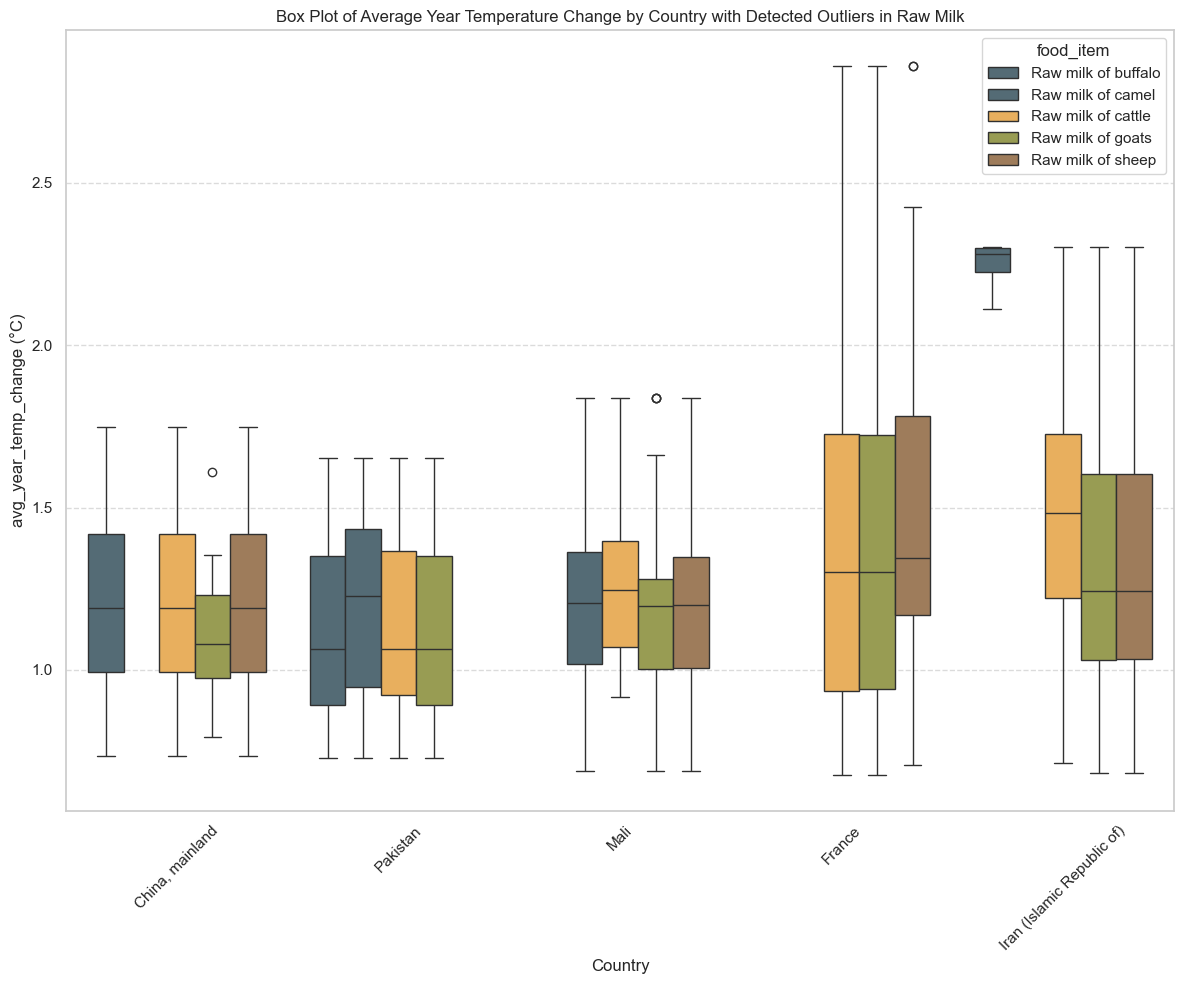

In [163]:
dairy_group_temp = high_temp_change_food[high_temp_change_food['food_item'].isin(dairy_group)]

top_5_temp_countries = dairy_group_temp['country'].value_counts().nlargest(5).index

plt.figure(figsize=(12, 10))
sns.boxplot(
    data=dairy_group_temp[dairy_group_temp['country'].isin(top_5_temp_countries)],
    x='country',
    y='avg_year_temp_change',
    hue='food_item',
    palette=custom_palette_temp
)
plt.xticks(rotation=45)
plt.title('Box Plot of Average Year Temperature Change by Country with Detected Outliers in Raw Milk')
plt.xlabel('Country')
plt.ylabel('avg_year_temp_change (°C)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

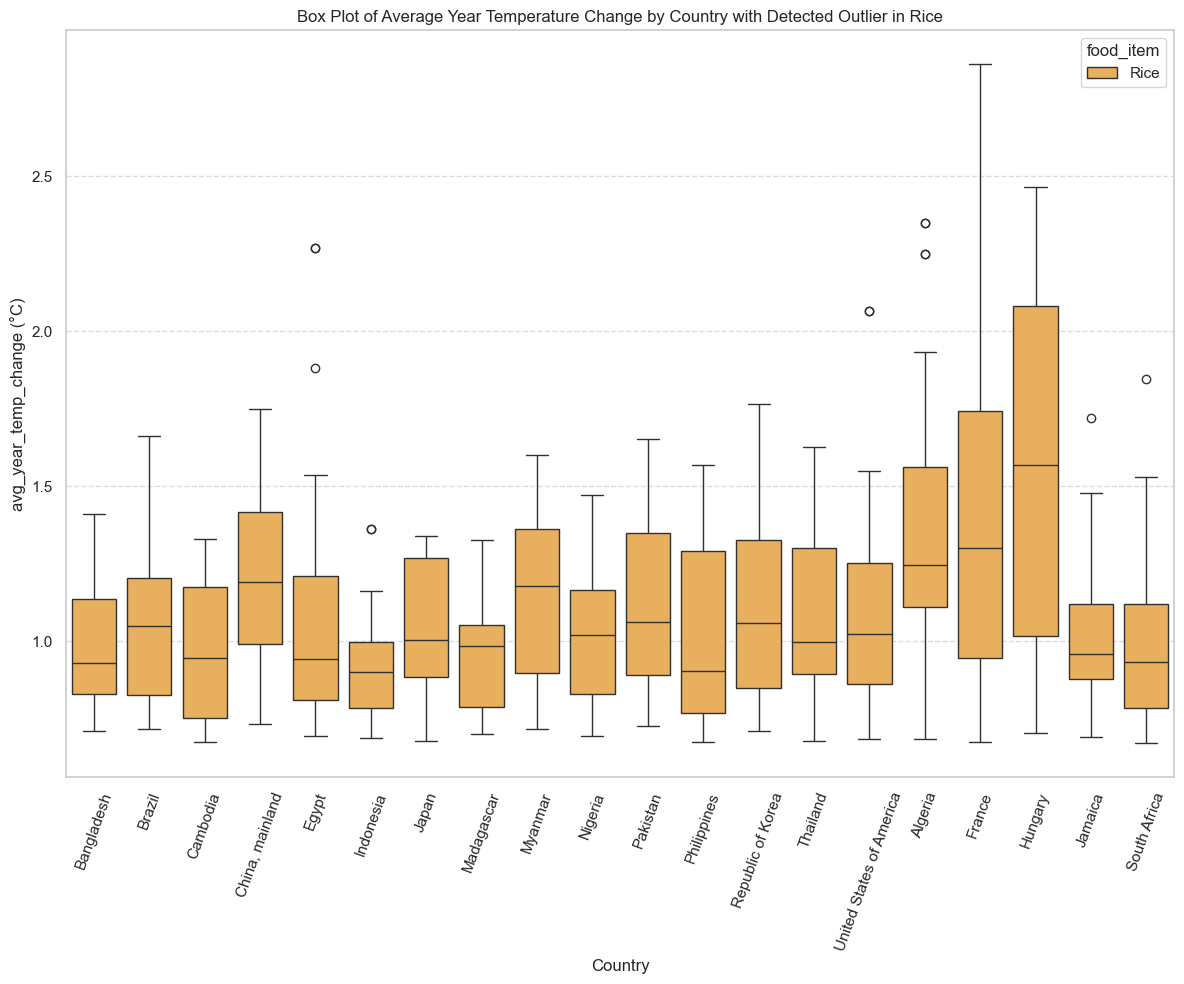

In [164]:
rice_group_temp = high_temp_change_food[high_temp_change_food['food_item'].isin(rice_group)]

top_20_temp_rice_countries = rice_group_temp['country'].value_counts().nlargest(20).index

plt.figure(figsize=(12, 10))
sns.boxplot(
    data=rice_group_temp[rice_group_temp['country'].isin(top_20_temp_rice_countries)],
    x='country',
    y='avg_year_temp_change',
    hue='food_item',
    palette=custom_palette_temp
)
plt.xticks(rotation=70)
plt.title('Box Plot of Average Year Temperature Change by Country with Detected Outlier in Rice')
plt.xlabel('Country')
plt.ylabel('avg_year_temp_change (°C)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

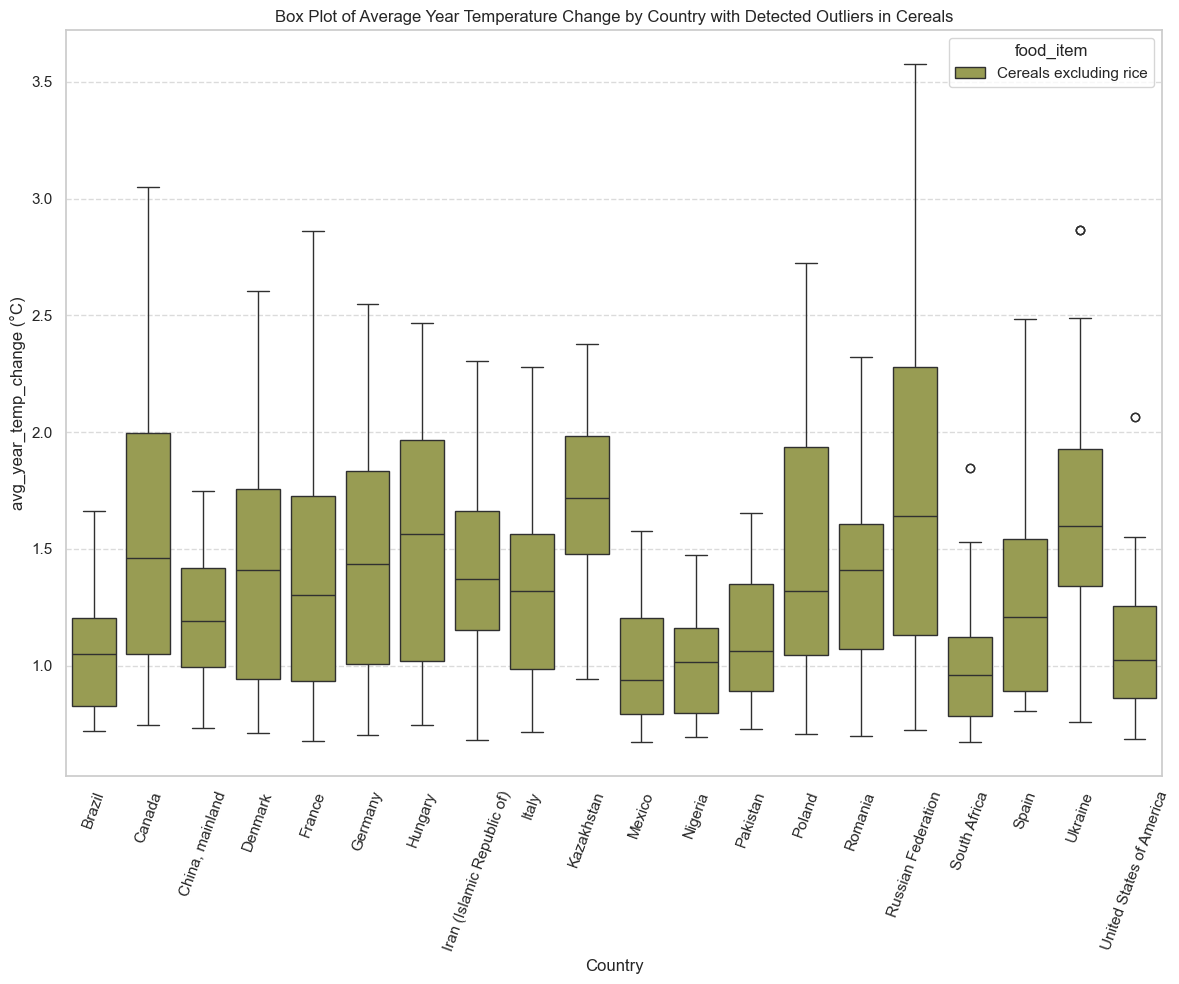

In [165]:
cereal_group_temp = high_temp_change_food[high_temp_change_food['food_item'].isin(cereal_group)]

top_20_temp_cereals = cereal_group_temp['country'].value_counts().nlargest(20).index

plt.figure(figsize=(12, 10))
sns.boxplot(
    data=cereal_group_temp[cereal_group_temp['country'].isin(top_20_temp_cereals)],
    x='country',
    y='avg_year_temp_change',
    hue='food_item',
    palette=custom_palette_temp
)
plt.xticks(rotation=70)
plt.title('Box Plot of Average Year Temperature Change by Country with Detected Outliers in Cereals')
plt.xlabel('Country')
plt.ylabel('avg_year_temp_change (°C)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

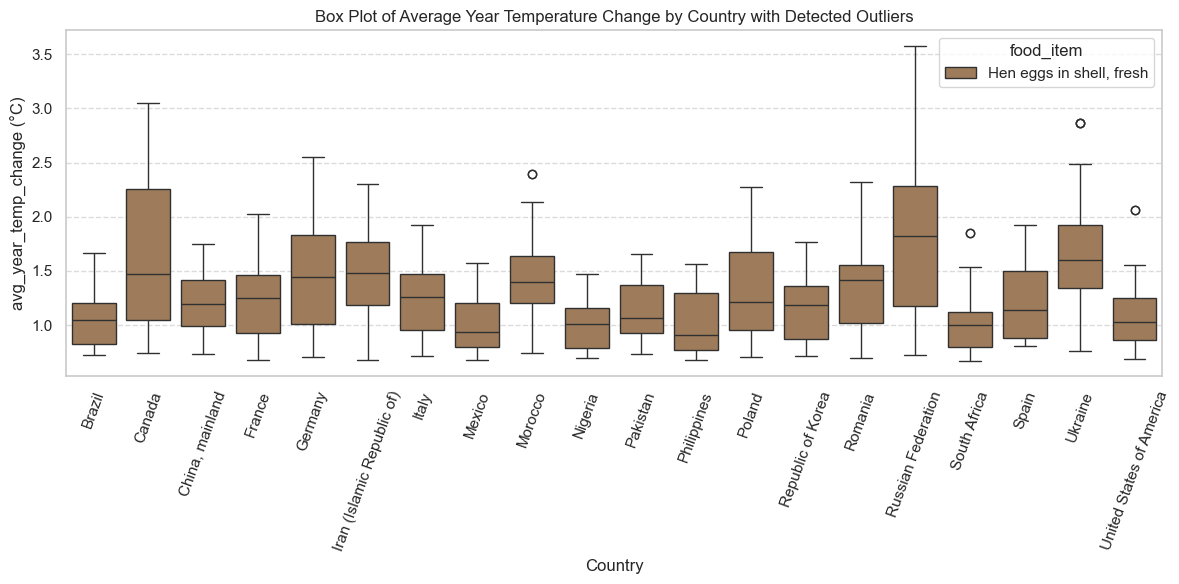

In [166]:
egg_group = ['Hen eggs in shell, fresh']

egg_group_group_temp = high_temp_change_food[high_temp_change_food['food_item'].isin(egg_group)]

top_20_temp_eggs = egg_group_group_temp['country'].value_counts().nlargest(20).index

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=egg_group_group_temp[egg_group_group_temp['country'].isin(top_20_temp_eggs)],
    x='country',
    y='avg_year_temp_change',
    hue='food_item',
    palette=custom_palette_temp
)
plt.xticks(rotation=70)
plt.title('Box Plot of Average Year Temperature Change by Country with Detected Outliers')
plt.xlabel('Country')
plt.ylabel('avg_year_temp_change (°C)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Across all these food items and countries, a consistent pattern emerges for average yearly temperature change:

1. Overall Warming Trend: For almost every food item and country, the box plots (representing the interquartile range of yearly average temperature changes) are centered above 0°C. Many medians (the line inside the box) are around 1°C to 1.5°C, and the upper whiskers often extend to 2.0°C or 2.5°C. This strongly reflects the global warming trend over the period covered by your data. The average yearly temperature for these producing regions is consistently higher than the baseline period used to calculate the anomalies.

2. Ubiquitous Outliers (Individual Circles):

    * High Positive Outliers: Almost every box plot shows numerous individual circles (outliers) extending significantly above the upper whisker, reaching 2.5°C, 3.0°C, and even higher in some cases. These represent years where the producing country experienced exceptionally hot average temperatures compared to its historical norm.

    * Low Negative Outliers: Similarly, for most food items, there are circles extending below the lower whisker into the negative range (e.g., -1.0°C to -1.5°C). These indicate years where the producing country experienced unusually cold average temperatures.

These temperature anomalies are flagged as statistical outliers because they represent years that were notably warmer or colder than the typical range of annual average temperatures experienced by that country for that particular food item's production.

* Climate Variability: Climate is naturally variable. Even with a warming trend, some years will be hotter and some colder than average due to natural cycles (like El Niño/La Niña), atmospheric oscillations, or random weather patterns.

* True Extreme Weather Events: The high positive outliers could correspond to widespread heatwaves, prolonged droughts, or periods of significantly elevated average temperatures that are critical for understanding climate change impacts. The low negative outliers might correspond to severe cold snaps or unusually harsh winters.

* Geographic Specificity: The magnitude and frequency of these outliers will vary by country, reflecting regional climate dynamics and how different areas are impacted by global warming.

Specific Observations by Food Item Category:
1. Meat (e.g., Cattle, Buffalo, Chicken, Goat, Pig, Sheep): These categories generally show very similar patterns of temperature anomalies and outliers. This is expected as these animals are often raised across diverse geographies that experience similar climate trends and extremes.
    * For meat products shows that countries like Russian Federation and France have some of the widest spreads and highest positive outliers for meat-producing regions, indicating their experience of more extreme temperature changes.

    * For various milks reinforces this, with France and Iran (Islamic Republic of) showing particularly high positive temperature anomalies.

2. Cereals (Cereals excluding rice, Rice):
    * 'Cereals excluding rice' shows a very wide spread of temperature anomalies for countries like Russian Federation (likely reflecting its vast landmass and varying climates) and also high outliers for Canada, Ukraine, and the USA.
    * for 'Rice' shows high positive outliers for countries like Algeria, Hungary, and the United States of America, indicating that some rice-producing regions in these countries experienced significant warming.

3. Hen eggs in shell, fresh: shows a similar widespread pattern of temperature outliers, consistent with poultry farming occurring globally.

Conclusion:
These outliers in avg_year_temp_change are highly likely to be genuine and represent critical information about climate extremes. They are not data errors that need to be removed.

---

##### 4.1.4. Categorical variables

* Filter the dataset per categorial variables for analysis

In [167]:
merged_df_final.dtypes

element_type
country                  object
year                      int64
food_item                object
avg_year_temp_change    float64
country_code             object
emissions_CO2eq_AR5     float64
GHG_kg                  float64
production_tonnes       float64
dtype: object

* For categorical columns, we have country, country_code and food_item

In [168]:
cat_var = merged_df_final.select_dtypes(include=['object']).columns
print("Categorical variables in the dataset:")
print(cat_var)

Categorical variables in the dataset:
Index(['country', 'food_item', 'country_code'], dtype='object', name='element_type')


In [169]:
# Filter the DataFrame to include only categorical variables
merged_df_final[cat_var]

element_type      country                                       food_item  \
0             Afghanistan                          Cereals excluding rice   
1             Afghanistan                        Hen eggs in shell, fresh   
2             Afghanistan  Meat of cattle with the bone, fresh or chilled   
3             Afghanistan              Meat of chickens, fresh or chilled   
4             Afghanistan                  Meat of goat, fresh or chilled   
...                   ...                                             ...   
110178           Zimbabwe                  Meat of goat, fresh or chilled   
110179           Zimbabwe     Meat of pig with the bone, fresh or chilled   
110180           Zimbabwe                 Meat of sheep, fresh or chilled   
110181           Zimbabwe                              Raw milk of cattle   
110182           Zimbabwe                                            Rice   

element_type country_code  
0                     AFG  
1                     AFG  
2                     AFG  
3                     AFG  
4                     AFG  
...                   ...  
110178                ZWE  
110179                ZWE  
110180                ZWE  
110181                ZWE  
110182                ZWE  

[101596 rows x 3 columns]

In [170]:
data_cat = merged_df_final[cat_var]

In [171]:
data_cat['food_item'].value_counts()

food_item
Meat of chickens, fresh or chilled                10845
Hen eggs in shell, fresh                          10748
Meat of cattle with the bone, fresh or chilled    10671
Raw milk of cattle                                10314
Meat of sheep, fresh or chilled                    9940
Cereals excluding rice                             9688
Meat of pig with the bone, fresh or chilled        9620
Meat of goat, fresh or chilled                     9484
Rice                                               6762
Raw milk of goats                                  5395
Raw milk of sheep                                  4058
Meat of buffalo, fresh or chilled                  1494
Raw milk of camel                                  1439
Raw milk of buffalo                                1138
Name: count, dtype: int64

In [172]:
# Frequency of food items
food_item_counts = data_cat['food_item'].value_counts()
type(food_item_counts)

pandas.core.series.Series

##### 4.1.4.1. Visualization of the frequencies

* food_item

In [173]:
custom_palette_temp = {
    'Cereals excluding rice': '#A3A847',        # olive green
    'Hen eggs in shell, fresh': '#A97C50',          # light chestnut
    'Meat of cattle with the bone, fresh or chilled': '#D7263D',         # vivid red
    'Meat of chickens, fresh or chilled': '#FFB400',      # bold amber
    'Meat of goat, fresh or chilled': "#96290B",         # coral
    'Meat of sheep, fresh or chilled': '#C19A6B',        # soft brown
    'Raw milk of camel': '#4F6D7A',         # desaturated blue
    'Raw milk of cattle': '#FFB347',         # warm orange
    'Raw milk of goats': '#A3A847',        # olive green
    'Raw milk of sheep': '#A97C50',          # light chestnut
    'Rice': '#FFB347',         # warm orange
    'Meat of pig with the bone, fresh or chilled': "#F46036",         # coral
    'Raw milk of buffalo': '#4F6D7A',         # desaturated blue
    'Meat of buffalo, fresh or chilled': '#D7263D',         # vivid red
}

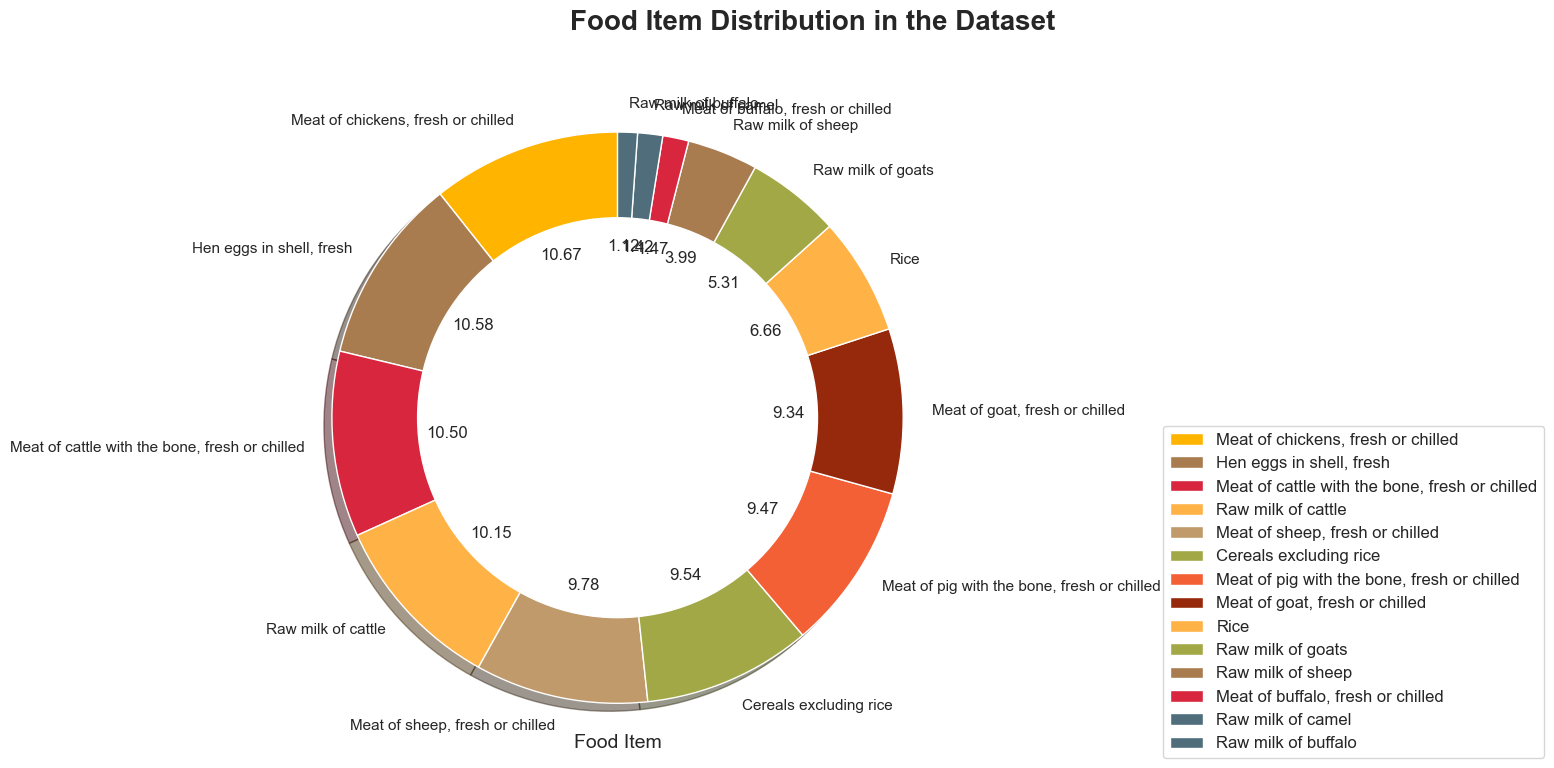

In [174]:
food_item_counts.plot.pie(figsize=(15,8), autopct='%.2f',
                        colors = [custom_palette_temp[item] for item in food_item_counts.index],
                        startangle=90, shadow=True, legend=False)
# add a circle at the center to make it look like a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.legend(food_item_counts.index, loc='upper left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.ylabel('')  # Hide the y-label
plt.xlabel('Food Item', fontsize=14) # rotate the labels
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.suptitle('Food Item Distribution in the Dataset', fontsize=20, weight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
plt.show()

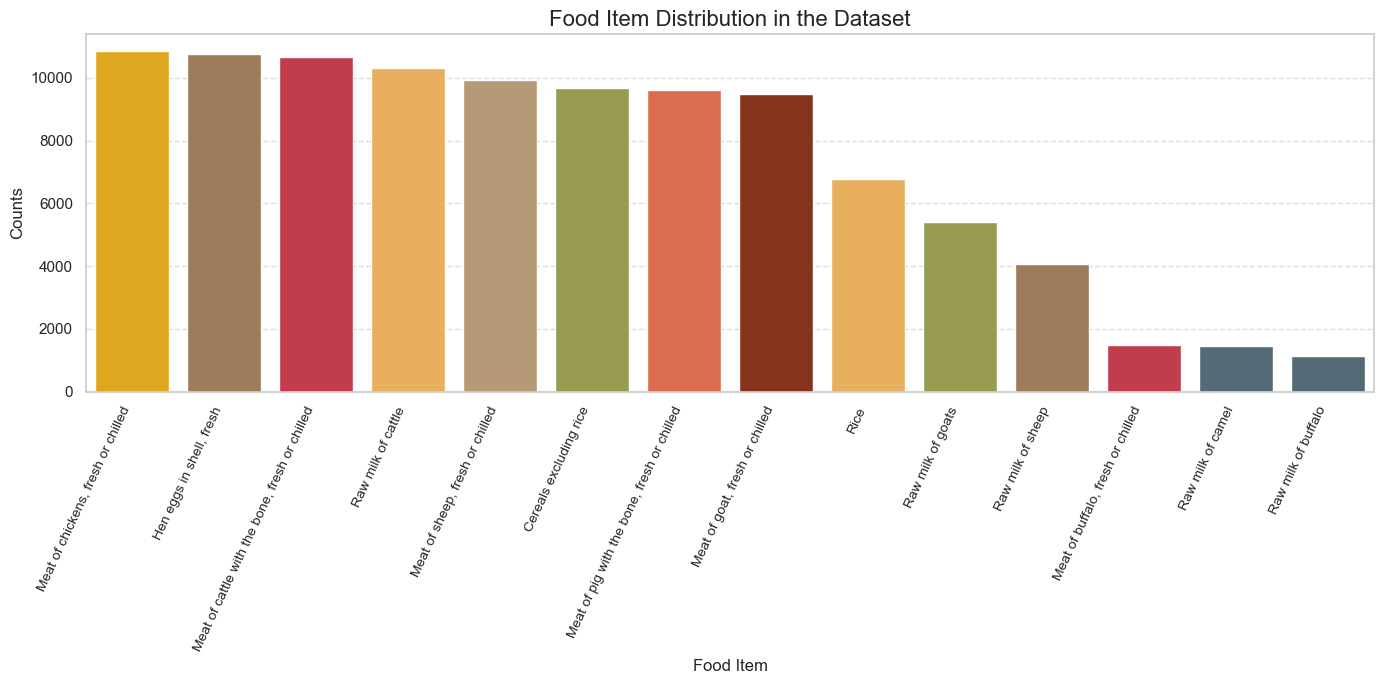

In [175]:
plt.figure(figsize=(14, 7))  # Wider to fit names
sns.barplot(x=food_item_counts.index, y=food_item_counts.values, palette=custom_palette_temp)
plt.title('Food Item Distribution in the Dataset', fontsize=16)
plt.xlabel('Food Item', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.xticks(rotation=65, ha='right', fontsize=10)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

* Countries

In [176]:
# Frequency of countries
country_counts = data_cat['country'].value_counts()
country_counts

country
China, mainland    868
Myanmar            806
Iraq               806
Egypt              806
Bulgaria           796
                  ... 
Sudan              121
South Sudan         96
Tokelau             93
Nauru               72
Maldives            58
Name: count, Length: 202, dtype: int64

In [177]:
# Create groups per country = Continent
africa = [
    'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
    'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
    'Congo', 'Democratic Republic of the Congo', 'Djibouti', 'Egypt',
    'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Ethiopia PDR',
    'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya',
    'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali',
    'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia',
    'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal',
    'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa',
    'South Sudan', 'Sudan', 'Sudan (former)', 'Togo', 'Tunisia',
    'Uganda', 'United Republic of Tanzania', 'Zambia', 'Zimbabwe'
]
americas = [
    'Antigua and Barbuda', 'Argentina', 'Bahamas', 'Barbados', 'Belize',
    'Bolivia (Plurinational State of)', 'Brazil', 'Canada', 'Chile',
    'Colombia', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic',
    'Ecuador', 'El Salvador', 'Grenada', 'Guadeloupe', 'Guatemala',
    'Guyana', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua',
    'Panama', 'Paraguay', 'Peru', 'Puerto Rico', 'Saint Kitts and Nevis',
    'Saint Lucia', 'Saint Vincent and the Grenadines', 'Suriname',
    'Trinidad and Tobago', 'United States of America', 'Uruguay',
    'Venezuela (Bolivarian Republic of)', 'Martinique'
]
asia = [
    'Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh',
    'Bhutan', 'Brunei Darussalam', 'Cambodia', 'China, Hong Kong SAR',
    'China, Macao SAR', 'China, Taiwan Province of', 'China, mainland',
    "Democratic People's Republic of Korea", 'Georgia', 'India',
    'Indonesia', 'Iran (Islamic Republic of)', 'Iraq', 'Israel',
    'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan',
    "Lao People's Democratic Republic", 'Lebanon', 'Malaysia',
    'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'Oman', 'Pakistan',
    'Palestine', 'Philippines', 'Qatar', 'Republic of Korea',
    'Saudi Arabia', 'Singapore', 'Sri Lanka', 'Syrian Arab Republic',
    'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkmenistan',
    'United Arab Emirates', 'Uzbekistan', 'Viet Nam', 'Yemen'
]
europe = [
    'Albania', 'Austria', 'Belarus', 'Belgium', 'Belgium-Luxembourg',
    'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus',
    'Czechia', 'Czechoslovakia', 'Denmark', 'Estonia', 'Faroe Islands',
    'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
    'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
    'Malta', 'Montenegro', 'Netherlands', 'North Macedonia',
    'Norway', 'Poland', 'Portugal', 'Republic of Moldova',
    'Romania', 'Russian Federation', 'Serbia',
    'Serbia and Montenegro', 'Slovakia', 'Slovenia', 'Spain',
    'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom',
    'USSR', 'Yugoslav SFR'
]
oceania = [
    'Australia', 'Cook Islands', 'Fiji', 'Kiribati', 'Micronesia (Federated States of)',
    'Nauru', 'New Caledonia', 'New Zealand', 'Niue', 'Palau',
    'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tokelau',
    'Tonga', 'Tuvalu', 'Vanuatu', 'French Polynesia'
]

In [178]:
merged_df_final

element_type      country  year  \
0             Afghanistan  1961   
1             Afghanistan  1961   
2             Afghanistan  1961   
3             Afghanistan  1961   
4             Afghanistan  1961   
...                   ...   ...   
110178           Zimbabwe  2022   
110179           Zimbabwe  2022   
110180           Zimbabwe  2022   
110181           Zimbabwe  2022   
110182           Zimbabwe  2022   

element_type                                       food_item  \
0                                     Cereals excluding rice   
1                                   Hen eggs in shell, fresh   
2             Meat of cattle with the bone, fresh or chilled   
3                         Meat of chickens, fresh or chilled   
4                             Meat of goat, fresh or chilled   
...                                                      ...   
110178                        Meat of goat, fresh or chilled   
110179           Meat of pig with the bone, fresh or chilled   
110180                       Meat of sheep, fresh or chilled   
110181                                    Raw milk of cattle   
110182                                                  Rice   

element_type  avg_year_temp_change country_code  emissions_CO2eq_AR5   GHG_kg  \
0                        -0.020294          AFG             381.5954   0.1130   
1                        -0.020294          AFG              20.2000   2.0200   
2                        -0.020294          AFG            1989.1250  46.2587   
3                        -0.020294          AFG               2.4485   0.4372   
4                        -0.020294          AFG             786.4980  64.3615   
...                            ...          ...                  ...      ...   
110178                   -0.299353          ZWE            1260.1049  44.3841   
110179                   -0.299353          ZWE              60.8675   5.6325   
110180                   -0.299353          ZWE              76.6988  21.4046   
110181                   -0.299353          ZWE            1842.5600   4.3494   
110182                   -0.299353          ZWE               9.7327   5.0603   

element_type  production_tonnes  
0                    3376000.00  
1                      10000.00  
2                      43000.00  
3                       5600.00  
4                      12220.00  
...                         ...  
110178                 28390.91  
110179                 10806.39  
110180                  3583.28  
110181                423632.42  
110182                  1923.32  

[101596 rows x 8 columns]

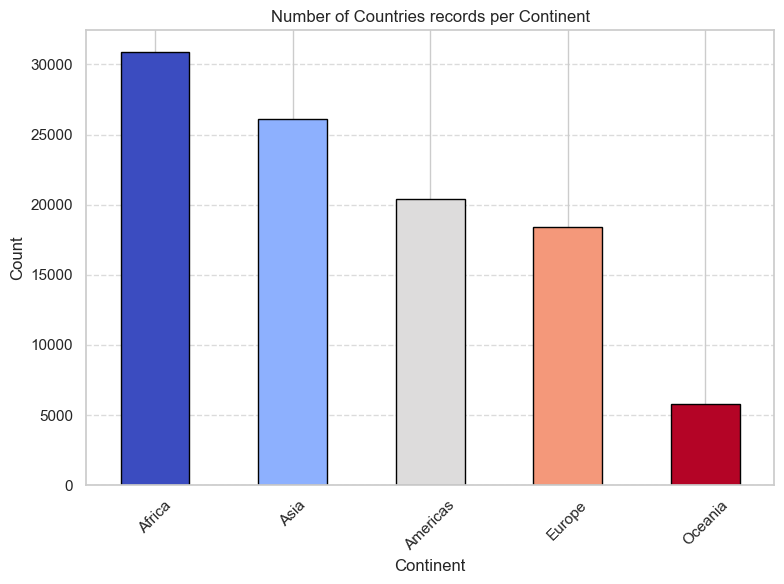

In [316]:
# Build a DataFrame: country + continent
continent_map = {
    country: 'Africa' if country in africa else
             'Asia' if country in asia else
             'Europe' if country in europe else
             'Americas' if country in americas else
             'Oceania' if country in oceania else 'Other'
    for country in merged_df_final['country'].unique()
}

# Assuming continent_map is already created based on your previous list
merged_df_final['continent'] = merged_df_final['country'].map(continent_map)

# Count countries per continent
continent_counts = merged_df_final['continent'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
continent_counts.plot(kind='bar', color=plt.cm.coolwarm(np.linspace(0, 1, len(continent_counts))), edgecolor='black')
plt.title('Number of Countries records per Continent')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


---

##### 4.4. Creating KPIs

* 4.1.5. KPI: Correlation between Total Food Production/GHG Emissions and Global/Regional Temperature Anomalies.

--- FINAL DATASET ---
merged_df_final

In [187]:
merged_df_final

element_type      country  year  \
0             Afghanistan  1961   
1             Afghanistan  1961   
2             Afghanistan  1961   
3             Afghanistan  1961   
4             Afghanistan  1961   
...                   ...   ...   
110178           Zimbabwe  2022   
110179           Zimbabwe  2022   
110180           Zimbabwe  2022   
110181           Zimbabwe  2022   
110182           Zimbabwe  2022   

element_type                                       food_item  \
0                                     Cereals excluding rice   
1                                   Hen eggs in shell, fresh   
2             Meat of cattle with the bone, fresh or chilled   
3                         Meat of chickens, fresh or chilled   
4                             Meat of goat, fresh or chilled   
...                                                      ...   
110178                        Meat of goat, fresh or chilled   
110179           Meat of pig with the bone, fresh or chilled   
110180                       Meat of sheep, fresh or chilled   
110181                                    Raw milk of cattle   
110182                                                  Rice   

element_type  avg_year_temp_change country_code  emissions_CO2eq_AR5   GHG_kg  \
0                        -0.020294          AFG             381.5954   0.1130   
1                        -0.020294          AFG              20.2000   2.0200   
2                        -0.020294          AFG            1989.1250  46.2587   
3                        -0.020294          AFG               2.4485   0.4372   
4                        -0.020294          AFG             786.4980  64.3615   
...                            ...          ...                  ...      ...   
110178                   -0.299353          ZWE            1260.1049  44.3841   
110179                   -0.299353          ZWE              60.8675   5.6325   
110180                   -0.299353          ZWE              76.6988  21.4046   
110181                   -0.299353          ZWE            1842.5600   4.3494   
110182                   -0.299353          ZWE               9.7327   5.0603   

element_type  production_tonnes continent  
0                    3376000.00      Asia  
1                      10000.00      Asia  
2                      43000.00      Asia  
3                       5600.00      Asia  
4                      12220.00      Asia  
...                         ...       ...  
110178                 28390.91    Africa  
110179                 10806.39    Africa  
110180                  3583.28    Africa  
110181                423632.42    Africa  
110182                  1923.32    Africa  

[101596 rows x 9 columns]

##### 4.1.1. KPI: Total Global Food Production (by weight and year)

In [188]:
# KPI: Calculate the Total Global Food Production (by weight in tonnes) per year
# production_tonnes is the total production of the food item in tonnes
KPI_total_production_yearly = merged_df_final.groupby(['year', 'country'])['production_tonnes'].sum().reset_index()

# Display the KPI DataFrame
print("\n--- Total Global Food Production (by weight in tonnes) per year ---")
KPI_total_production_yearly



--- Total Global Food Production (by weight in tonnes) per year ---


year                             country  production_tonnes
0      1961                         Afghanistan         4401720.00
1      1961                             Albania          491787.00
2      1961                             Algeria         1369376.00
3      1961                              Angola          688099.50
4      1961                 Antigua and Barbuda            2790.00
...     ...                                 ...                ...
11027  2022                          Uzbekistan        20895986.06
11028  2022                             Vanuatu            9366.73
11029  2022  Venezuela (Bolivarian Republic of)         5520541.08
11030  2022                              Zambia         3911112.28
11031  2022                            Zimbabwe         3210898.38

[11032 rows x 3 columns]

In [189]:
# Check per country the total food production per year
KPI_total_production_yearly.groupby('country')['production_tonnes'].sum().reset_index().sort_values(by='production_tonnes', ascending=False)

country  production_tonnes
38            China, mainland       2.705897e+10
193  United States of America       2.590712e+10
85                      India       1.725934e+10
188                      USSR       8.191105e+09
23                     Brazil       5.185458e+09
..                        ...                ...
111                  Maldives       9.889690e+03
187                    Tuvalu       7.247950e+03
132                      Niue       4.007040e+03
125                     Nauru       1.402530e+03
182                   Tokelau       7.430700e+02

[202 rows x 2 columns]

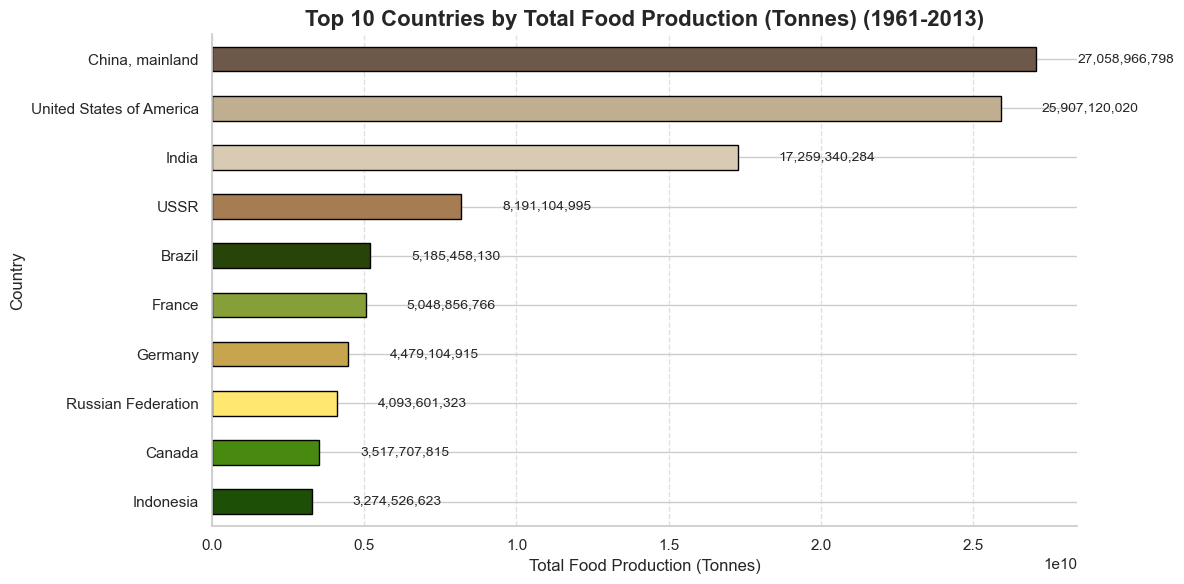

In [235]:
# Visualize the KPI total food production per year country
# Set up your color palette (Google-style vibrant tones)
colors = ['#1D4F06',  # Lincoln Green
          '#488A0F',  # Avocado
          '#FFE770',  # Shandy (sunlight yellow)
          '#C7A54E',  # Aztec Gold (harvest wheat)
          '#869F39',  # Palm Leaf
          '#284409',  # Deep Forest Green
          '#A67C52',  # Rustic Brown (wood/milk can tone)
          '#D9CBB3',  # Cream (dairy/milk)
          '#BFAE8F',  # Grain Beige
          '#6E5849']  # Earthy Taupe

# Prepare data
top_10_countries = KPI_total_production_yearly.groupby('country')['production_tonnes'].sum().sort_values(ascending=False).head(10)

# Reverse for horizontal orientation (optional but more readable if names are long)
top_10_countries = top_10_countries[::-1]

# Create figure
plt.figure(figsize=(12, 6))
ax = top_10_countries.plot(kind='barh', color=colors, edgecolor='black')

# Add value labels
for i, v in enumerate(top_10_countries):
    ax.text(v + 0.05 * max(top_10_countries), i, f'{v:,.0f}', va='center', fontsize=10)

# Style enhancements
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.grid(True, linestyle='--', alpha=0.6)
ax.set_axisbelow(True)

# Title and labels
plt.title('Top 10 Countries by Total Food Production (Tonnes) (1961-2013)', fontsize=16, weight='bold')
plt.xlabel('Total Food Production (Tonnes)', fontsize=12)
plt.ylabel('Country', fontsize=12)

# Tidy layout
plt.tight_layout()
plt.show()


In [320]:

# Visualize the KPI total food production per year country with Plotly
production_by_country_year = merged_df_final.groupby(['country', 'year', 'country_code']).agg(
    total_production_tonnes=('production_tonnes', 'sum')
).reset_index()

# Filter out rows where total_production_tonnes is 0 or NaN if any (though unlikely for sum)
production_by_country_year = production_by_country_year[
    production_by_country_year['total_production_tonnes'] > 0
].copy()


# --- Create the Animated Scatter Geo Plot ---
# This plot will show bubbles on countries, sized and colored by production, animated over years.
fig = px.scatter_geo(
    production_by_country_year,
    locations="country",                  # Column for country names
    locationmode="country names",         # Specifies that 'locations' are country names. Could also use 'ISO-3' codes.
    scope="world",                        # Scope of the map (world view)
    hover_name="country",                 # Display country name on hover
    size="total_production_tonnes",      # Size of the bubbles by production
    color="total_production_tonnes",     # Color of the bubbles by production
    animation_frame="year",               # Column to create the animation slider
    title="Worldwide Total Food Production (1961-2023)", # Chart title
    template="plotly_white",              # Use a clean white background template
    size_max=80,                          # Max size of bubbles to avoid overlap
    color_continuous_scale=px.colors.sequential.Viridis, # Color scale for production
    hover_data={
        "total_production_tonnes": ':.2f' # Show production in hover, formatted
    }
)

# Update layout for better appearance
fig.update_layout(
    geo=dict(
        showland=True, landcolor="lightgray",
        showocean=True, oceancolor="lightblue",
        showcountries=True, countrycolor="gray",
        showsubunits=True, subunitcolor="gray"
    ),
    sliders=[
        dict(
            steps=[
                dict(
                    method="animate",
                    args=[[f"year={year}"], {"frame": {"duration": 800, "redraw": True}, "mode": "immediate"}],
                    label=str(year)
                ) for year in production_by_country_year['year'].unique().tolist()
            ],
            transition=dict(duration=300),
            x=0.1, y=0,
            currentvalue=dict(font=dict(size=12), prefix="Year=", visible=True, xanchor="right")
        )
    ]
)

# Adjust animation speed for the play button
if fig.layout.updatemenus: # Check if updatemenus exist (they should for animation_frame)
    if fig.layout.updatemenus[0].buttons: # Check if buttons exist
        fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 250
        fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 80


fig.show()

# save the figure as an HTML file
fig.write_html("worldwide_total_food_production_1961_2023.html")
# This will create an interactive HTML file that can be opened in a web brows

##### 4.1.2. KPI: GHG Emissions per Food Category (in tonnes)

In [192]:
merged_df_final.head()

element_type      country  year  \
0             Afghanistan  1961   
1             Afghanistan  1961   
2             Afghanistan  1961   
3             Afghanistan  1961   
4             Afghanistan  1961   

element_type                                       food_item  \
0                                     Cereals excluding rice   
1                                   Hen eggs in shell, fresh   
2             Meat of cattle with the bone, fresh or chilled   
3                         Meat of chickens, fresh or chilled   
4                             Meat of goat, fresh or chilled   

element_type  avg_year_temp_change country_code  emissions_CO2eq_AR5   GHG_kg  \
0                        -0.020294          AFG             381.5954   0.1130   
1                        -0.020294          AFG              20.2000   2.0200   
2                        -0.020294          AFG            1989.1250  46.2587   
3                        -0.020294          AFG               2.4485   0.4372   
4                        -0.020294          AFG             786.4980  64.3615   

element_type  production_tonnes continent  
0                     3376000.0      Asia  
1                       10000.0      Asia  
2                       43000.0      Asia  
3                        5600.0      Asia  
4                       12220.0      Asia

In [ ]:
# Calculate the total GHG emissions per food item in tonnes

merged_df_final['production_kg'] = merged_df_final['production_tonnes'] * 1000 # 1 tonne = 1000 kg
merged_df_final['ghg_emissions_total'] = (merged_df_final['production_kg'] * merged_df_final['GHG_kg'])  
# GHG emissions total is the product of production in kg and GHG emissions in kgCO2eq/kg

KPI_total_emissions = (
    merged_df_final.groupby('food_item')['ghg_emissions_total']
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_ghg_emissions_kg')
)
KPI_total_emissions

food_item  total_ghg_emissions_kg
0   Meat of cattle with the bone, fresh or chilled            1.012319e+14
1                                             Rice            4.218209e+13
2                               Raw milk of cattle            3.919867e+13
3                           Cereals excluding rice            1.626600e+13
4                  Meat of sheep, fresh or chilled            1.417257e+13
5                Meat of buffalo, fresh or chilled            1.257485e+13
6      Meat of pig with the bone, fresh or chilled            9.790259e+12
7                   Meat of goat, fresh or chilled            7.483181e+12
8                              Raw milk of buffalo            4.893342e+12
9                                Raw milk of sheep            2.381920e+12
10                        Hen eggs in shell, fresh            1.775185e+12
11                               Raw milk of goats            1.774430e+12
12              Meat of chickens, fresh or chilled            1.755162e+12
13                               Raw milk of camel            4.437003e+11

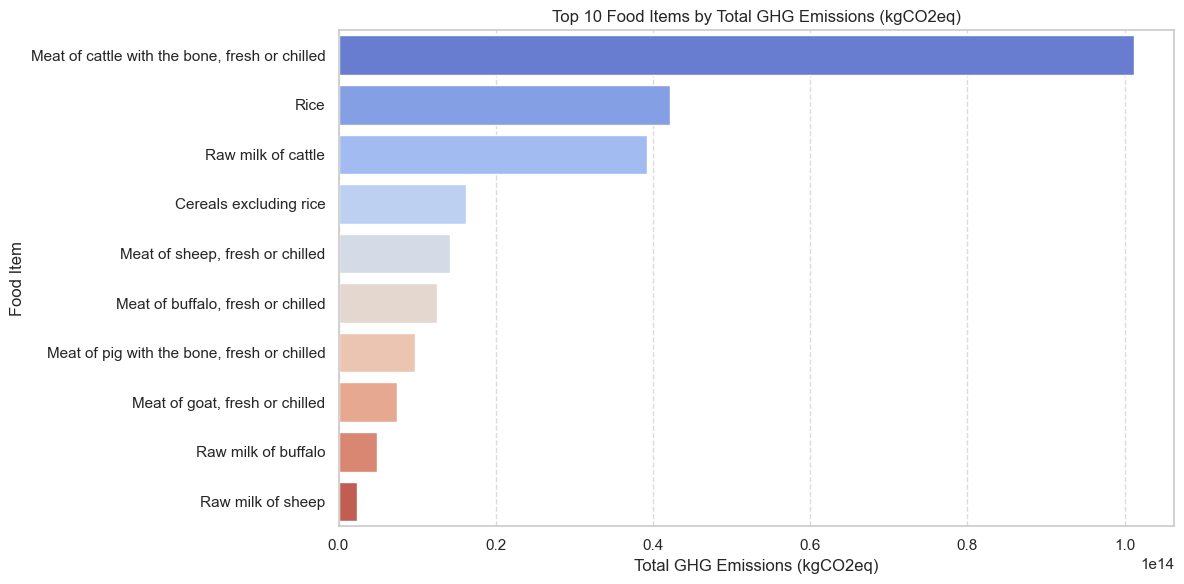

In [310]:
# Visualize KPI_GHG_per_food_category

top_10_food_items = KPI_total_emissions.head(10)

# Reverse the order to get highest at the top

plt.figure(figsize=(12, 6))
sns.barplot(    data=top_10_food_items,
    x='total_ghg_emissions_kg',
    y='food_item',
    palette='coolwarm',  # Use a diverging color palette for better visibility
)
plt.title('Top 10 Food Items by Total GHG Emissions (kgCO2eq)')
plt.xlabel('Total GHG Emissions (kgCO2eq)', fontsize=12)
plt.ylabel('Food Item', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Emissions are measured in carbon dioxide equivalents (CO2eq). This means non-CO2 gases are weighted by the amount of warming
they cause over a 100-year timescale.

##### 4.1.3. KPI: Country-level GHG emissions per food production

* This KPI points to which countries have the most carbon-intensive food production systems on a per-unit basis, not necessarily who is the largest overall emitter.

In [258]:
merged_df_final

element_type      country  year  \
0             Afghanistan  1961   
1             Afghanistan  1961   
2             Afghanistan  1961   
3             Afghanistan  1961   
4             Afghanistan  1961   
...                   ...   ...   
110178           Zimbabwe  2022   
110179           Zimbabwe  2022   
110180           Zimbabwe  2022   
110181           Zimbabwe  2022   
110182           Zimbabwe  2022   

element_type                                       food_item  \
0                                     Cereals excluding rice   
1                                   Hen eggs in shell, fresh   
2             Meat of cattle with the bone, fresh or chilled   
3                         Meat of chickens, fresh or chilled   
4                             Meat of goat, fresh or chilled   
...                                                      ...   
110178                        Meat of goat, fresh or chilled   
110179           Meat of pig with the bone, fresh or chilled   
110180                       Meat of sheep, fresh or chilled   
110181                                    Raw milk of cattle   
110182                                                  Rice   

element_type  avg_year_temp_change country_code  emissions_CO2eq_AR5   GHG_kg  \
0                        -0.020294          AFG             381.5954   0.1130   
1                        -0.020294          AFG              20.2000   2.0200   
2                        -0.020294          AFG            1989.1250  46.2587   
3                        -0.020294          AFG               2.4485   0.4372   
4                        -0.020294          AFG             786.4980  64.3615   
...                            ...          ...                  ...      ...   
110178                   -0.299353          ZWE            1260.1049  44.3841   
110179                   -0.299353          ZWE              60.8675   5.6325   
110180                   -0.299353          ZWE              76.6988  21.4046   
110181                   -0.299353          ZWE            1842.5600   4.3494   
110182                   -0.299353          ZWE               9.7327   5.0603   

element_type  production_tonnes continent  ghg_emissions_total  production_kg  
0                    3376000.00      Asia         3.814880e+08   3.376000e+09  
1                      10000.00      Asia         2.020000e+07   1.000000e+07  
2                      43000.00      Asia         1.989124e+09   4.300000e+07  
3                       5600.00      Asia         2.448320e+06   5.600000e+06  
4                      12220.00      Asia         7.864975e+08   1.222000e+07  
...                         ...       ...                  ...            ...  
110178                 28390.91    Africa         1.260105e+09   2.839091e+07  
110179                 10806.39    Africa         6.086699e+07   1.080639e+07  
110180                  3583.28    Africa         7.669868e+07   3.583280e+06  
110181                423632.42    Africa         1.842547e+09   4.236324e+08  
110182                  1923.32    Africa         9.732576e+06   1.923320e+06  

[101596 rows x 11 columns]

In [259]:
# Create a KPI for country-level GHG emissions per food production

# emissions_CO2eq_AR5 is the GHG emissions in carbon dioxide equivalent (CO2eq) kilotonnes (kt) per tonne of food production
# GHG emissions total is the product of production in kg and GHG emissions in kgCO2eq/kg

# Calculate the total_ghg_emissions for each row by multiplying production_tonnes by ghg_per_tonne
merged_df_final['total_ghg_emissions'] = merged_df_final['production_tonnes'] * merged_df_final['emissions_CO2eq_AR5']

# Group by country, year, and sum the total_ghg_emissions and production_tonnes
country_year_kpi = merged_df_final.groupby(['country', 'year']).agg(
    total_ghg_emissions=('total_ghg_emissions', 'sum'),
    total_production_tonnes=('production_tonnes', 'sum')
).reset_index()

# Calculate the KPI: GHG emissions per tonne of food production
# Handle potential division by zero if total_production_tonnes is 0
country_year_kpi['ghg_emissions_per_production_tonne'] = np.where(
    country_year_kpi['total_production_tonnes'] != 0,
    country_year_kpi['total_ghg_emissions'] / country_year_kpi['total_production_tonnes'],
    0
)

In [260]:
top_10_countries_ghg = country_year_kpi.groupby('country')['ghg_emissions_per_production_tonne'].sum().sort_values(ascending=False).head(25)
top_10_countries_ghg

country
China, mainland             6.395006e+06
India                       4.806269e+06
United States of America    3.727296e+06
Indonesia                   3.290934e+06
USSR                        2.311089e+06
Thailand                    2.275333e+06
Brazil                      1.951910e+06
Bangladesh                  1.949675e+06
Myanmar                     1.510889e+06
Philippines                 1.504704e+06
Germany                     1.038717e+06
France                      7.804823e+05
New Zealand                 7.382901e+05
Argentina                   6.563713e+05
Pakistan                    6.208952e+05
Russian Federation          5.940384e+05
Cambodia                    5.473914e+05
Japan                       5.443676e+05
Poland                      5.427126e+05
Australia                   5.408243e+05
Canada                      5.221717e+05
Colombia                    4.995069e+05
Italy                       4.011195e+05
Mexico                      3.604694e+05
Madagasc

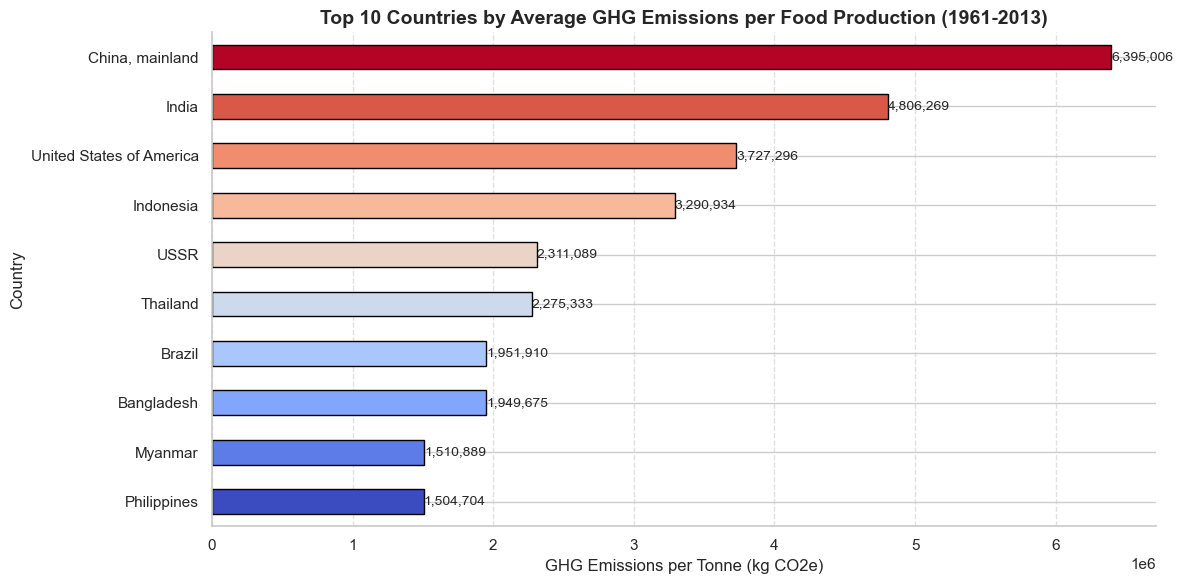

In [309]:
# Visalize the KPI_GHG_per_food_production

top_10_countries_ghg = country_year_kpi.groupby('country')['ghg_emissions_per_production_tonne'].sum().sort_values(ascending=False).head(10)

# Reverse the order to get highest at the top
top_10_countries_ghg = top_10_countries_ghg[::-1]

# Plot with custom colors
plt.figure(figsize=(12, 6))
ax = top_10_countries_ghg.plot(kind='barh', color=plt.get_cmap('coolwarm')(np.linspace(0, 1, 10)), edgecolor='black')

# Add value labels
for i, v in enumerate(top_10_countries_ghg):
    ax.text(v + 0.1, i, f'{v:,.0f}', va='center', fontsize=10)
# Style tweaks
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.grid(True, linestyle='--', alpha=0.6)
plt.title('Top 10 Countries by Average GHG Emissions per Food Production (1961-2013)', fontsize=14, weight='bold')
plt.xlabel('GHG Emissions per Tonne (kg CO2e)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

The top 10 countries based on their average country-level GHG emissions per food production (in tonnes of CO2 equivalent per tonne of food produced) are:

* 

This ranking represents countries that, on average over the available years, have the highest GHG emissions relative to their total food production volume.

Countries like the USA or China have a very high total greenhouse gas emissions, given their massive scales of agricultural and industrial output. However, the KPI we calculated is GHG emissions per tonne of food production (tonnes of CO2 equivalent per tonne of food produced). This is a measure of emissions intensity, not total emissions.

Here's why countries like Sri Lanka, Vanuatu, or Fiji might appear at the top of this particular list, rather than the USA or China:

Emissions Intensity vs. Total Emissions:
* Total Emissions: Large agricultural producers like the USA and China produce an immense volume of food, which naturally leads to high total emissions.
* Emissions Intensity (our KPI): This metric looks at how much GHG is emitted for each unit of food produced. A country might have lower total production but higher emissions per unit if:
    * Production Mix: Their primary food production might be heavily weighted towards emission-intensive food items. For example, certain types of meat (like beef or lamb) and dairy products have significantly higher GHG emissions per kilogram compared to fruits, vegetables, or grains. If a country's agricultural output is disproportionately made up of these high-impact foods, its intensity KPI will be higher.
    * Farming Practices: The specific farming methods used in a country can also influence intensity. Less efficient practices, higher reliance on certain fertilizers, or specific land use changes can lead to more emissions per unit of output.
    * Smaller Scale, Higher Variability: Smaller economies or those with less diversified agricultural sectors might see their intensity figures fluctuate more drastically based on the dominant crops or livestock.

The USA and China, despite their large overall emissions, might also produce vast quantities of less emission-intensive foods (e.g., corn, rice, soybeans) or use highly efficient large-scale farming techniques, which could "dilute" their average emissions per tonne of food produced, leading to a lower intensity score compared to countries focusing on more impactful food types.

##### 4.1.4. Total GHG Emissions by Food Category (Global & Over Time)

* This KPI will help us understand which broad food categories contribute the most to global greenhouse gas emissions over time

In [277]:
# --- KPI: Total GHG Emissions by Food Category (Global & Over Time) ---

# Group by Year and Food_Category, then sum the total_ghg_emissions
KPI_GHG_over_time = merged_df_final.groupby(['year', 'food_item']).agg(
    total_ghg_emissions_tonnes_CO2eq=('total_ghg_emissions', 'sum')
).reset_index()

print("\n--- KPI: Total GHG Emissions by Food Category (Global & Over Time - Head) ---")
print(KPI_GHG_over_time.head(10))


--- KPI: Total GHG Emissions by Food Category (Global & Over Time - Head) ---
   year                                       food_item  \
0  1961                          Cereals excluding rice   
1  1961                        Hen eggs in shell, fresh   
2  1961               Meat of buffalo, fresh or chilled   
3  1961  Meat of cattle with the bone, fresh or chilled   
4  1961              Meat of chickens, fresh or chilled   
5  1961                  Meat of goat, fresh or chilled   
6  1961     Meat of pig with the bone, fresh or chilled   
7  1961                 Meat of sheep, fresh or chilled   
8  1961                             Raw milk of buffalo   
9  1961                               Raw milk of camel   

   total_ghg_emissions_tonnes_CO2eq  
0                      6.577135e+12  
1                      1.951231e+10  
2                      4.357662e+10  
3                      1.998907e+12  
4                      5.124300e+09  
5                      4.415459e+09  
6    

In [279]:
# --- Top food categories (all years combined) by GHG emissions ---
overall_top_categories = KPI_GHG_over_time.groupby('food_item').agg(
    overall_ghg_emissions_tonnes_CO2eq=('total_ghg_emissions_tonnes_CO2eq', 'sum')
).reset_index().sort_values(by='overall_ghg_emissions_tonnes_CO2eq', ascending=False)

print("\n--- Overall Top Food Categories by GHG Emissions (All Years Combined) ---")
print(overall_top_categories.head(10))


--- Overall Top Food Categories by GHG Emissions (All Years Combined) ---
                                         food_item  \
13                                            Rice   
0                           Cereals excluding rice   
10                              Raw milk of cattle   
3   Meat of cattle with the bone, fresh or chilled   
8                              Raw milk of buffalo   
6      Meat of pig with the bone, fresh or chilled   
2                Meat of buffalo, fresh or chilled   
1                         Hen eggs in shell, fresh   
4               Meat of chickens, fresh or chilled   
7                  Meat of sheep, fresh or chilled   

    overall_ghg_emissions_tonnes_CO2eq  
13                        3.292141e+15  
0                         2.493554e+15  
10                        1.138940e+15  
3                         3.294732e+14  
8                         1.732582e+14  
6                         1.110588e+14  
2                         1.462796e+13  
1 

In [282]:
merged_df_final

element_type      country  year  \
0             Afghanistan  1961   
1             Afghanistan  1961   
2             Afghanistan  1961   
3             Afghanistan  1961   
4             Afghanistan  1961   
...                   ...   ...   
110178           Zimbabwe  2022   
110179           Zimbabwe  2022   
110180           Zimbabwe  2022   
110181           Zimbabwe  2022   
110182           Zimbabwe  2022   

element_type                                       food_item  \
0                                     Cereals excluding rice   
1                                   Hen eggs in shell, fresh   
2             Meat of cattle with the bone, fresh or chilled   
3                         Meat of chickens, fresh or chilled   
4                             Meat of goat, fresh or chilled   
...                                                      ...   
110178                        Meat of goat, fresh or chilled   
110179           Meat of pig with the bone, fresh or chilled   
110180                       Meat of sheep, fresh or chilled   
110181                                    Raw milk of cattle   
110182                                                  Rice   

element_type  avg_year_temp_change country_code  emissions_CO2eq_AR5   GHG_kg  \
0                        -0.020294          AFG             381.5954   0.1130   
1                        -0.020294          AFG              20.2000   2.0200   
2                        -0.020294          AFG            1989.1250  46.2587   
3                        -0.020294          AFG               2.4485   0.4372   
4                        -0.020294          AFG             786.4980  64.3615   
...                            ...          ...                  ...      ...   
110178                   -0.299353          ZWE            1260.1049  44.3841   
110179                   -0.299353          ZWE              60.8675   5.6325   
110180                   -0.299353          ZWE              76.6988  21.4046   
110181                   -0.299353          ZWE            1842.5600   4.3494   
110182                   -0.299353          ZWE               9.7327   5.0603   

element_type  production_tonnes continent  ghg_emissions_total  production_kg  \
0                    3376000.00      Asia         3.814880e+08   3.376000e+09   
1                      10000.00      Asia         2.020000e+07   1.000000e+07   
2                      43000.00      Asia         1.989124e+09   4.300000e+07   
3                       5600.00      Asia         2.448320e+06   5.600000e+06   
4                      12220.00      Asia         7.864975e+08   1.222000e+07   
...                         ...       ...                  ...            ...   
110178                 28390.91    Africa         1.260105e+09   2.839091e+07   
110179                 10806.39    Africa         6.086699e+07   1.080639e+07   
110180                  3583.28    Africa         7.669868e+07   3.583280e+06   
110181                423632.42    Africa         1.842547e+09   4.236324e+08   
110182                  1923.32    Africa         9.732576e+06   1.923320e+06   

element_type  total_ghg_emissions  
0                    1.288266e+09  
1                    2.020000e+05  
2                    8.553238e+07  
3                    1.371160e+04  
4                    9.611006e+06  
...                           ...  
110178               3.577552e+07  
110179               6.577579e+05  
110180               2.748333e+05  
110181               7.805682e+08  
110182               1.871910e+04  

[101596 rows x 12 columns]

<Figure size 1400x800 with 0 Axes>

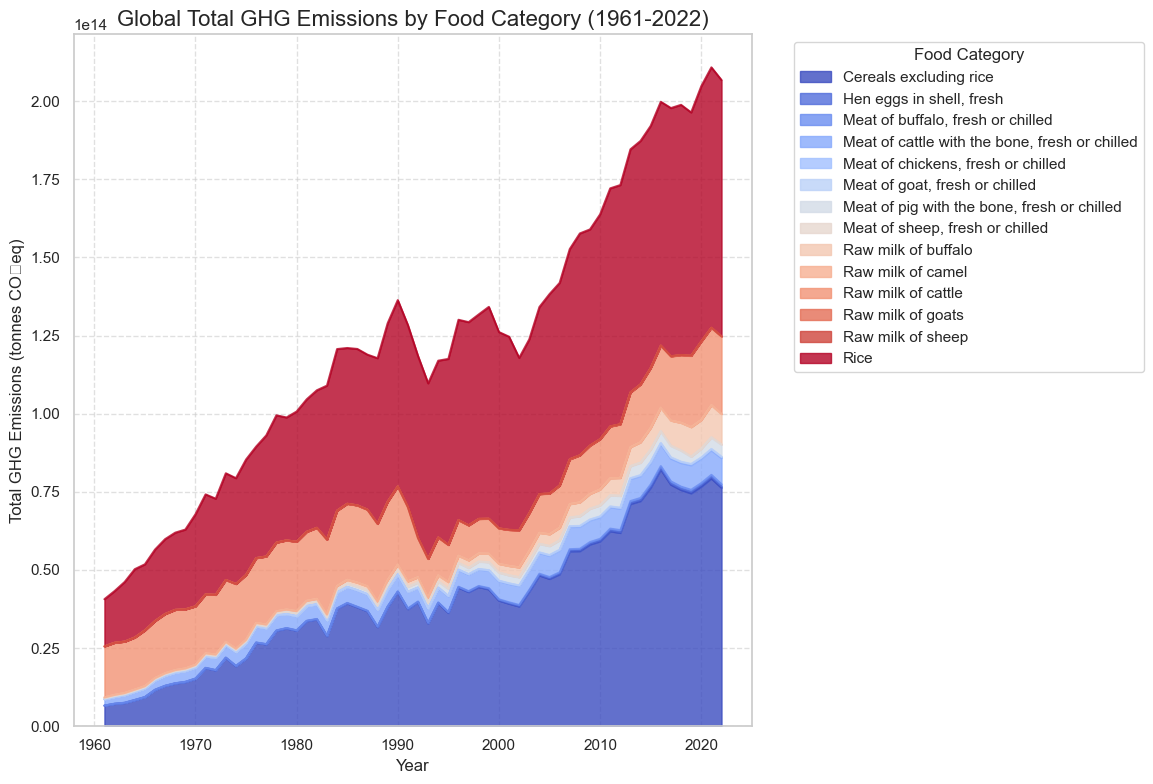

In [308]:
# Visualize GHG emissions by food category over time

top_n = 20
overall_category_sum = merged_df_final.groupby('food_item')['emissions_CO2eq_AR5'].sum().sort_values(ascending=False)
top_categories = overall_category_sum.head(top_n).index.tolist()

# create a new column for categorized data
KPI_GHG_over_time['food_item_grouped'] = KPI_GHG_over_time['food_item'].apply(
    lambda x: x if x in top_categories else 'Other / Miscellaneous')

# Recalculate sums with the grouped categories
df_plot_data = KPI_GHG_over_time.groupby(['year', 'food_item_grouped']).agg(
    total_ghg_emissions_tonnes_CO2eq=('total_ghg_emissions_tonnes_CO2eq', 'sum')
).reset_index()

# Pivot the data for stacked area plot
df_pivot = df_plot_data.pivot(index='year', columns='food_item_grouped', values='total_ghg_emissions_tonnes_CO2eq').fillna(0)

# --- Create the Stacked Area Chart ---
plt.figure(figsize=(14, 8))
df_pivot.plot(kind='area', stacked=True, alpha=0.8, figsize=(14, 8), cmap='coolwarm') # Using coolwarm colormap

plt.title('Global Total GHG Emissions by Food Category (1961-2022)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total GHG Emissions (tonnes CO₂eq)', fontsize=12)
plt.legend(title='Food Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make room for the legend

# Save the plot
# plot_filename_time = 'ghg_emissions_by_food_category_over_time.png'
#plt.savefig(plot_filename_time, dpi=300)
# print(f"\nStacked area chart saved as '{plot_filename_time}'.")

plt.show()

##### 4.1.5. KPI: Top countries in average temperature change yearly per food item

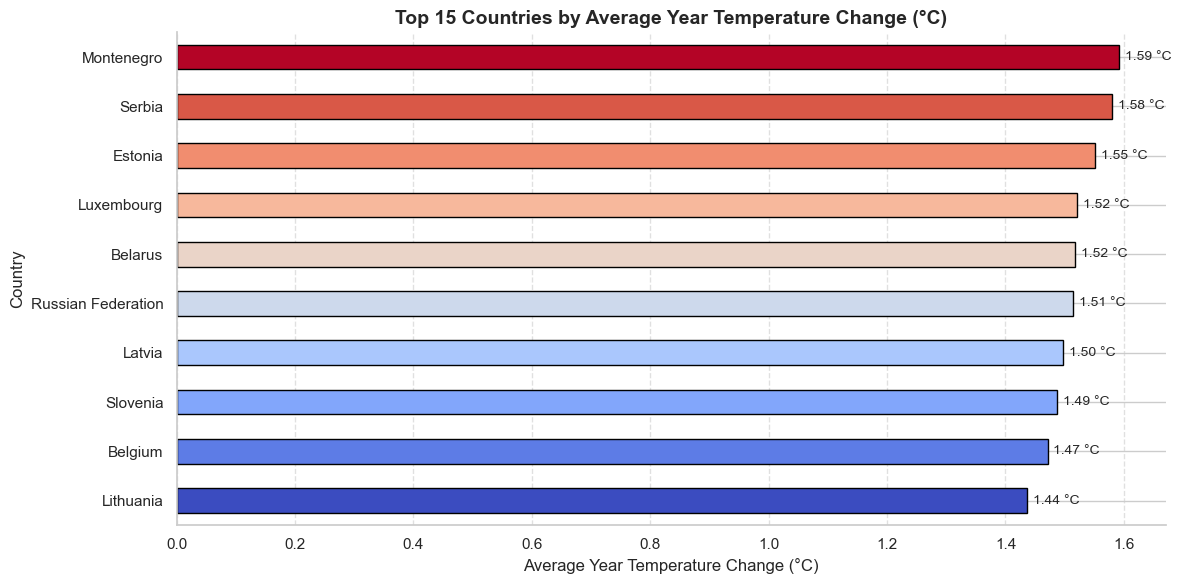

In [307]:
# 4.1.5. KPI: Top countries in average temperature change yearly
top_10 = 10
top_countries_temp_change = merged_df_final.groupby('country')['avg_year_temp_change'].mean().sort_values(ascending=False).head(top_10)

# Reverse the order to get highest at the top
top_countries_temp_change = top_countries_temp_change[::-1]

# Plot with custom colors
plt.figure(figsize=(12, 6))
ax = top_countries_temp_change.plot(kind='barh', color=plt.get_cmap('coolwarm')(np.linspace(0, 1, top_10)), edgecolor='black')
# Add value labels
for i, v in enumerate(top_countries_temp_change):
    ax.text(v + 0.01, i, f'{v:.2f} °C', va='center', fontsize=10)
# Style tweaks
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.grid(True, linestyle='--', alpha=0.6)
plt.title('Top 15 Countries by Average Year Temperature Change (°C)', fontsize=14, weight='bold')
plt.xlabel('Average Year Temperature Change (°C)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

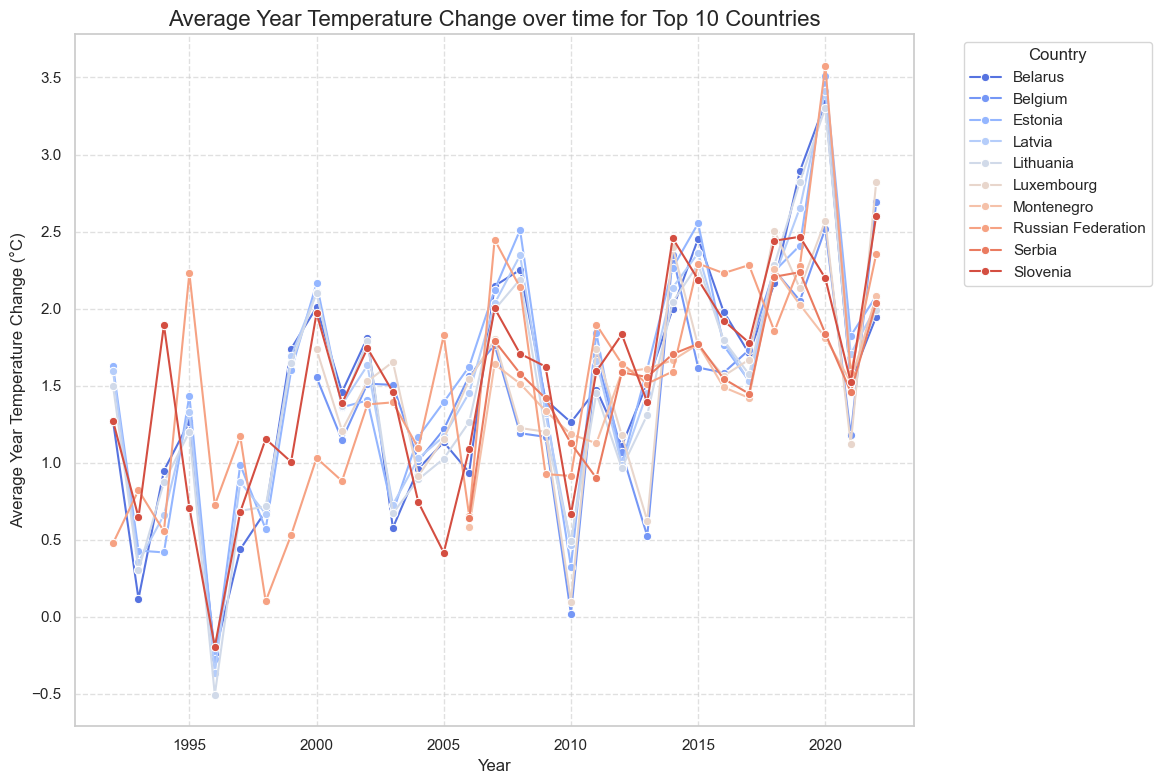

In [306]:
# Visualize the average temperature change in a trend line plot over time for the top 10 countries
plt.figure(figsize=(14, 8))
sns.lineplot(data=merged_df_final[merged_df_final['country'].isin(top_countries_temp_change.index)],
             x='year', y='avg_year_temp_change', hue='country',
             marker='o', palette='coolwarm', errorbar=None)
plt.title('Average Year Temperature Change over time for Top 10 Countries', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Year Temperature Change (°C)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make room for the legend
plt.show()

In [ ]:
top_countries_temp_change

country
Ukraine                   1.241184
Bosnia and Herzegovina    1.278848
Kazakhstan                1.302148
Croatia                   1.342380
Czechia                   1.387402
Lithuania                 1.436113
Belgium                   1.471077
Slovenia                  1.486372
Latvia                    1.496651
Russian Federation        1.514738
Belarus                   1.517840
Luxembourg                1.521279
Estonia                   1.551639
Serbia                    1.579474
Montenegro                1.591680
Name: avg_year_temp_change, dtype: float64

##### 4.1.6. KPI: Correlation between Total Food Production/Emissions CO2eq and Regional Temperature Anomalies

In [329]:
# Regional analysis of average temperature change
# Create a new DataFrame for average temperature change by continent
continent_temp_change = merged_df_final.groupby(['year', 'continent'])['avg_year_temp_change'].mean().reset_index()
continent_temp_change2 = merged_df_final.groupby(['year', 'continent'])['emissions_CO2eq_AR5'].mean().reset_index()
# join the two DataFrames on 'year' and 'continent'
continent_temp_change = pd.merge(continent_temp_change, continent_temp_change2, on=['year', 'continent'], how='left')
continent_temp_change

year continent  avg_year_temp_change  emissions_CO2eq_AR5
0    1961    Africa             -0.025265           496.785186
1    1961  Americas              0.052712          2361.807316
2    1961      Asia             -0.035368          2969.150305
3    1961    Europe              0.774216          2966.321329
4    1961   Oceania              0.071980          1440.942896
..    ...       ...                   ...                  ...
305  2022    Africa              1.016489          1709.437627
306  2022  Americas              0.818941          4496.706807
307  2022      Asia              1.534099          4607.227796
308  2022    Europe              2.103917          1346.495128
309  2022   Oceania              0.988518          1573.247349

[310 rows x 4 columns]

In [ ]:
from scipy.stats import pearsonr

# check Africa
africa_data = continent_temp_change[continent_temp_change['continent'] == 'Africa']
corr, p_value = pearsonr(africa_data['avg_year_temp_change'], africa_data['emissions_CO2eq_AR5'])
print(f"Pearson correlation coefficient between average year temperature change and Carbon dioxide equivalent emissions in Africa: {corr}")

Pearson correlation coefficient between average year temperature change and GHG emissions in Africa: 0.9007944264995288


In [ ]:
# check Asia
asia_data = continent_temp_change[continent_temp_change['continent'] == 'Asia']
corr, p_value = pearsonr(asia_data['avg_year_temp_change'], asia_data['emissions_CO2eq_AR5'])
print(f"Pearson correlation coefficient between average year temperature change and Carbon dioxide equivalent in Asia: {corr}")

Pearson correlation coefficient between average year temperature change and GHG emissions in Asia: 0.7320454364544664


In [333]:
# Check Europe
europe_data = continent_temp_change[continent_temp_change['continent'] == 'Europe']
corr, p_value = pearsonr(europe_data['avg_year_temp_change'], europe_data['emissions_CO2eq_AR5'])
print(f"Pearson correlation coefficient between average year temperature change and Carbon dioxide equivalent emissions in Europe: {corr}")

Pearson correlation coefficient between average year temperature change and Carbon dioxide equivalent emissions in Europe: -0.7908658023774024


In [334]:
# Check Americas
americas_data = continent_temp_change[continent_temp_change['continent'] == 'Americas']
corr, p_value = pearsonr(americas_data['avg_year_temp_change'], americas_data['emissions_CO2eq_AR5'])
print(f"Pearson correlation coefficient between average year temperature change and Carbon dioxide equivalent emissions in Americas: {corr}")

Pearson correlation coefficient between average year temperature change and Carbon dioxide equivalent emissions in Americas: 0.8643361956390727


In [335]:
# Check Oceania
oceania_data = continent_temp_change[continent_temp_change['continent'] == 'Oceania']
corr, p_value = pearsonr(oceania_data['avg_year_temp_change'], oceania_data['emissions_CO2eq_AR5'])
print(f"Pearson correlation coefficient between average year temperature change and Carbon dioxide equivalent emissions in Oceania: {corr}")

Pearson correlation coefficient between average year temperature change and Carbon dioxide equivalent emissions in Oceania: -0.3895461686025083


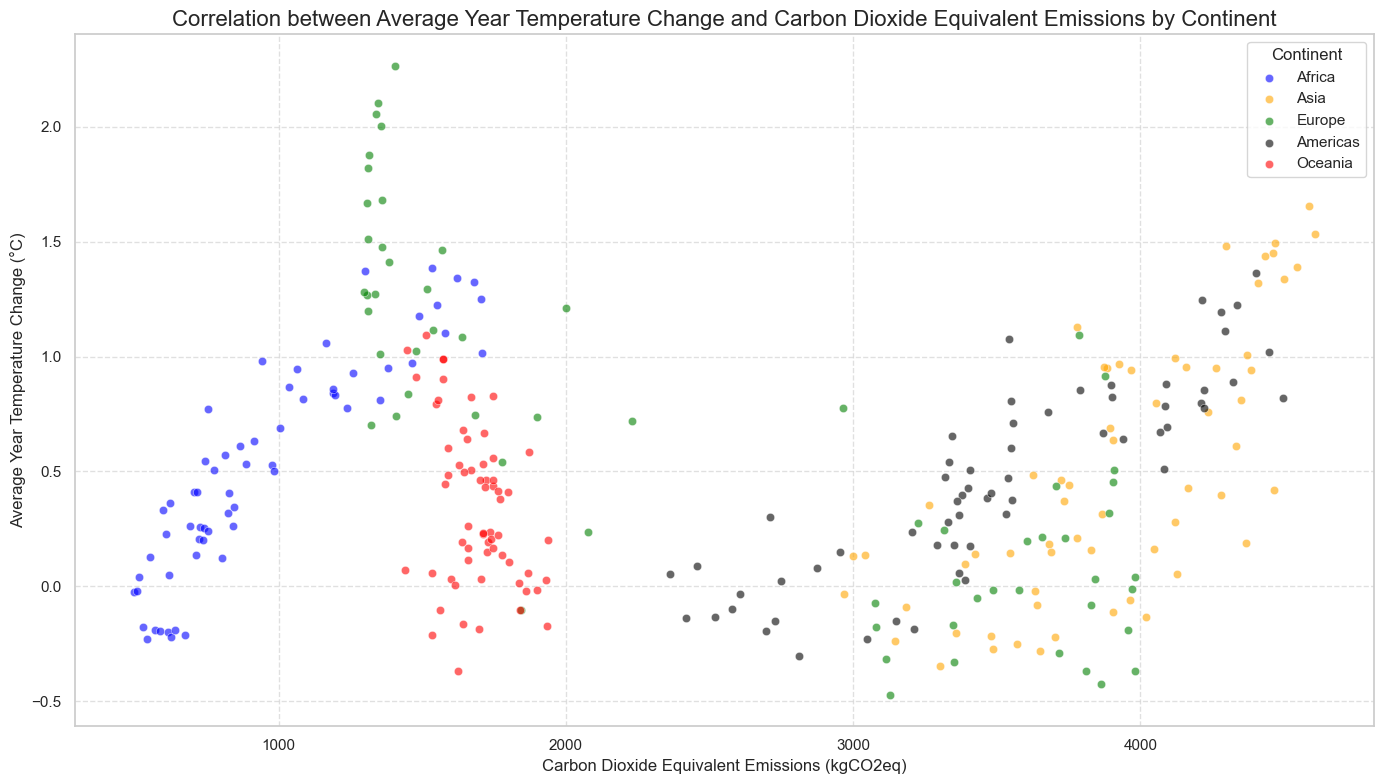

In [341]:
# Visualize the correlation between africa_data, europe_data, asia_data, americas_data, oceania_data with Emissions CO2eq and Average Year Temperature Change

plt.figure(figsize=(14, 8))
sns.scatterplot(data=africa_data, x='emissions_CO2eq_AR5', y='avg_year_temp_change', color='blue', label='Africa', alpha=0.6)
sns.scatterplot(data=asia_data, x='emissions_CO2eq_AR5', y='avg_year_temp_change', color='orange', label='Asia', alpha=0.6)
sns.scatterplot(data=europe_data, x='emissions_CO2eq_AR5', y='avg_year_temp_change', color='green', label='Europe', alpha=0.6)
sns.scatterplot(data=americas_data, x='emissions_CO2eq_AR5', y='avg_year_temp_change', color='black', label='Americas', alpha=0.6)
sns.scatterplot(data=oceania_data, x='emissions_CO2eq_AR5', y='avg_year_temp_change', color='red', label='Oceania', alpha=0.6)
plt.title('Correlation between Average Year Temperature Change and Carbon Dioxide Equivalent Emissions by Continent', fontsize=16)
plt.xlabel('Carbon Dioxide Equivalent Emissions (kgCO2eq)', fontsize=12)
plt.ylabel('Average Year Temperature Change (°C)', fontsize=12)
plt.legend(title='Continent')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

---

## 5. Hypothesis Testing & Statistical Analysis

* 5.2. T-Test for Emission Differences by Food Type

##### 5.1. Correlation Analysis (Pearson)

In [268]:
# Correlation Analysis (Pearson)

Columns_to_check1 = ['GHG_kg', 'avg_year_temp_change', 'production_tonnes', 'emissions_CO2eq_AR5']
correlation_matrix = merged_df_final[Columns_to_check1].corr(method='pearson')
correlation_matrix.style.background_gradient(cmap='coolwarm', low=0, high=1, axis=None).set_properties(**{'font-size': '12pt'})

##### 5.1.1. Create relationships between variables

In [ ]:
merged_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101596 entries, 0 to 110182
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   country               101596 non-null  object 
 1   year                  101596 non-null  int64  
 2   food_item             101596 non-null  object 
 3   avg_year_temp_change  101596 non-null  float64
 4   country_code          101596 non-null  object 
 5   emissions_CO2eq_AR5   101596 non-null  float64
 6   GHG_kg                101596 non-null  float64
 7   production_tonnes     101596 non-null  float64
 8   continent             101596 non-null  object 
dtypes: float64(4), int64(1), object(4)
memory usage: 7.8+ MB


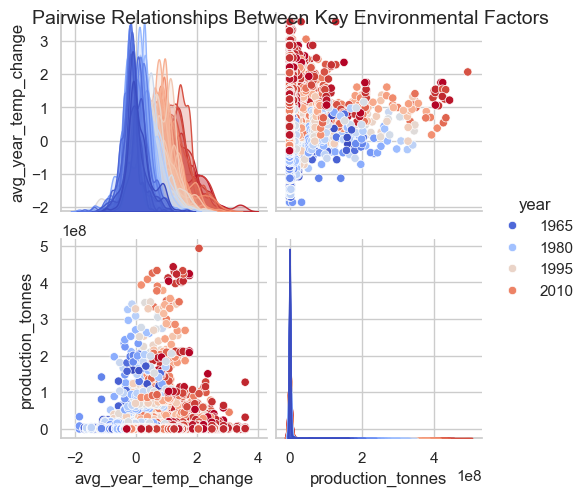

In [ ]:
# Define variables for comparison
columns_of_interest1 = ["avg_year_temp_change", "production_tonnes"]

# Create a pairplot
sns.pairplot(merged_df_final, vars=columns_of_interest1, hue="year", palette="coolwarm")
plt.suptitle("Pairwise Relationships Between Key Environmental Factors", fontsize=14)
plt.show()

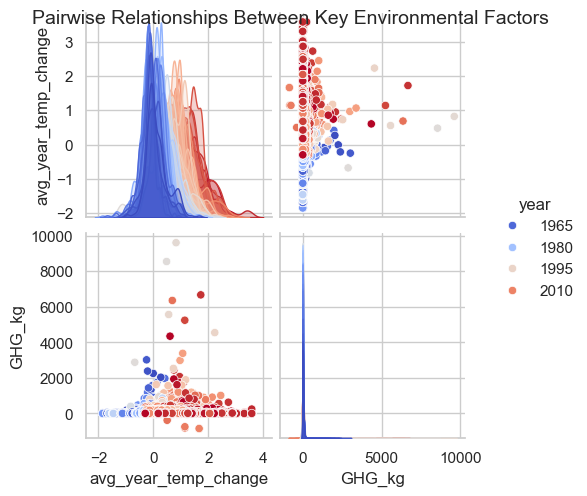

In [ ]:
# Define variables for comparison
columns_of_interest2 = ["avg_year_temp_change", "GHG_kg"]

# Create a pairplot
sns.pairplot(merged_df_final, vars=columns_of_interest2, hue="year", palette="coolwarm")
plt.suptitle("Pairwise Relationships Between Key Environmental Factors", fontsize=14)
plt.show()

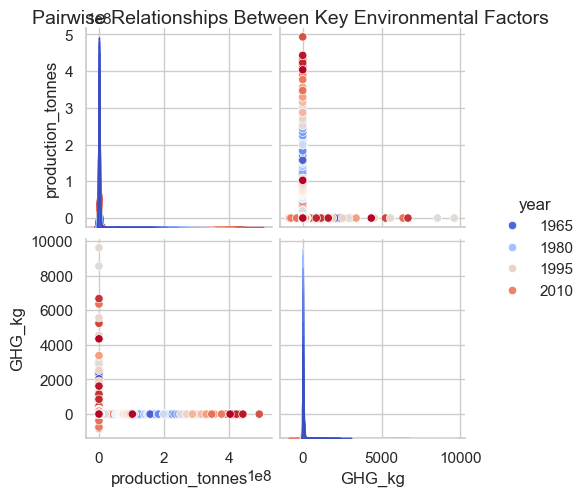

In [ ]:
# Define variables for comparison
columns_of_interest3 = ["production_tonnes", "GHG_kg"]

# Create a pairplot
sns.pairplot(merged_df_final, vars=columns_of_interest3, hue="year", palette="coolwarm")
plt.suptitle("Pairwise Relationships Between Key Environmental Factors", fontsize=14)
plt.show()

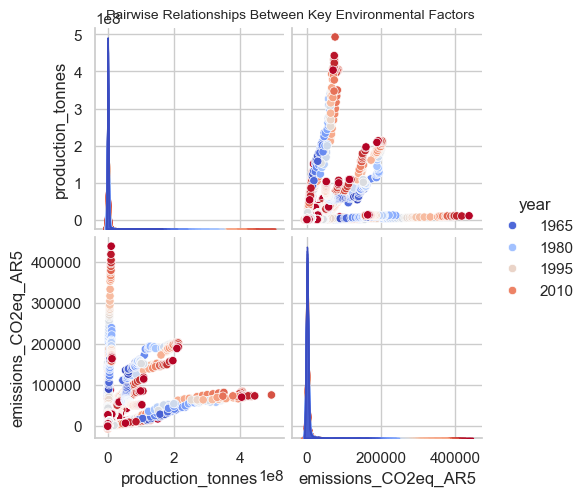

In [ ]:
# Define variables for comparison
columns_of_interest4 = ["production_tonnes", "emissions_CO2eq_AR5"]

# Create a pairplot
sns.pairplot(merged_df_final, vars=columns_of_interest4, hue="year", palette="coolwarm")
plt.suptitle("Pairwise Relationships Between Key Environmental Factors", fontsize=10)
plt.show()

In [ ]:
columns_of_interest5 = ["production_tonnes", "emissions_CO2eq_AR5", "GHG_kg", "avg_year_temp_change"]

In [ ]:
# Compute the correlation matrix
correlation_matrix = merged_df_final[columns_of_interest5].corr()
print("\n--- Corr between production tonnes and other variables ---")
print(correlation_matrix[['production_tonnes']])
print("\n--- Corr between GHG_kg and other variables ---")
print(correlation_matrix[['GHG_kg']])
print("\n--- Corr between emissions_CO2eq_AR5 and other variables ---")
print(correlation_matrix[['emissions_CO2eq_AR5']])
print("\n--- Corr between avg_year_temp_change and other variables ---")
print(correlation_matrix[['avg_year_temp_change']])


--- Corr between production tonnes and other variables ---
element_type          production_tonnes
element_type                           
production_tonnes              1.000000
emissions_CO2eq_AR5            0.417921
GHG_kg                        -0.030598
avg_year_temp_change           0.026460

--- Corr between GHG_kg and other variables ---
element_type            GHG_kg
element_type                  
production_tonnes    -0.030598
emissions_CO2eq_AR5   0.041353
GHG_kg                1.000000
avg_year_temp_change -0.014104

--- Corr between emissions_CO2eq_AR5 and other variables ---
element_type          emissions_CO2eq_AR5
element_type                             
production_tonnes                0.417921
emissions_CO2eq_AR5              1.000000
GHG_kg                           0.041353
avg_year_temp_change             0.000847

--- Corr between avg_year_temp_change and other variables ---
element_type          avg_year_temp_change
element_type                              
pr

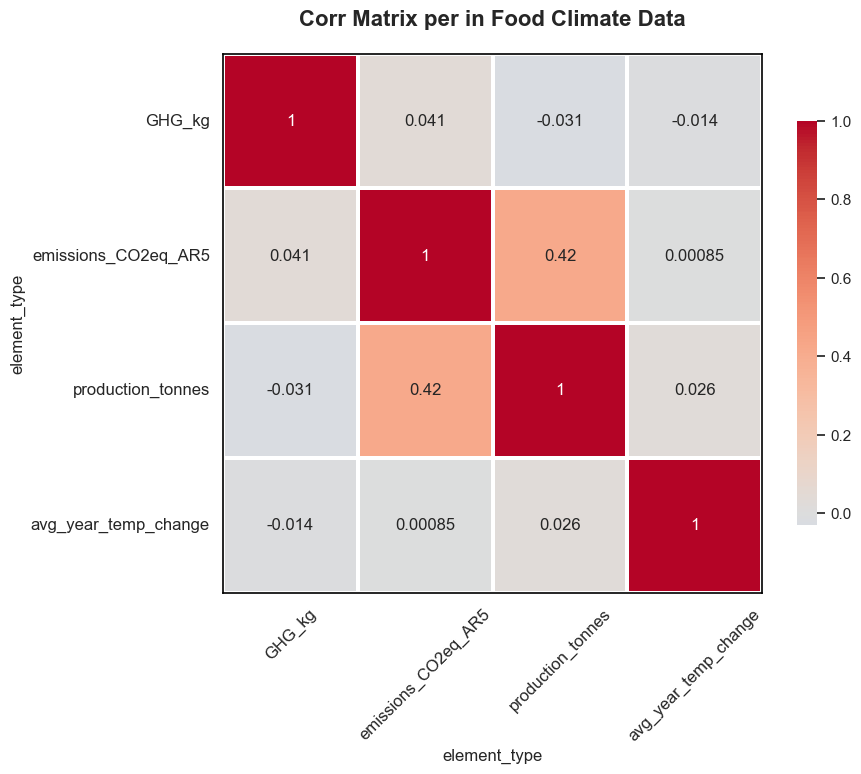

In [347]:
# Create a varible with the columns of interest
columns_of_interest_ = ['GHG_kg', 
                       'emissions_CO2eq_AR5', 
                       'production_tonnes', 
                       'avg_year_temp_change']

# Compute correlation matrix
corr_matrix = merged_df_final[columns_of_interest_].corr() 

# Set figure size and style
plt.figure(figsize=(9,7))
sns.set_style("whitegrid")  

# Create heatmap with updated style
ax = sns.heatmap(corr_matrix, 
                 annot=True, 
                 cmap="coolwarm",  # Use a diverging color palette for better visibility
                 center=0, 
                 linewidths=1.5,  # Thicker borders for readability
                 square=True,  # Ensures neat square layout
                 cbar_kws={"shrink": 0.75})  # Adjust color bar size

# Customize labels & title
plt.xticks(fontsize=12, rotation=45)  # Improve label readability
plt.yticks(fontsize=12)
plt.title("Corr Matrix per in Food Climate Data", fontsize=16, fontweight="bold", pad=20)

# Add border for sleek effect
for _, spine in ax.spines.items():
    spine.set_visible(True) # Make sure all spines are visible
    spine.set_color("black")  # Set spine color to black
    spine.set_linewidth(1.2) # Set spine width for emphasis
# Show the plot
plt.show()

In [ ]:
# Select 15 years over time to find the correlation between production tonnes and GHG_kg
# Years to select
years_to_select = [2000, 2005, 2010, 2015, 2020, 2021, 2022]
# Filter the DataFrame for the selected years
filtered_df = merged_df_final[merged_df_final['year'].isin(years_to_select)]    
# Compute the correlation matrix for the filtered DataFrame
correlation_matrix_filtered = filtered_df[['emissions_CO2eq_AR5', 'production_tonnes']].corr()
print("\n--- Correlation between GHG emissions and production tonnes for selected years ---")
print(correlation_matrix_filtered)
  


--- Correlation between GHG emissions and production tonnes for selected years ---
element_type         emissions_CO2eq_AR5  production_tonnes
element_type                                               
emissions_CO2eq_AR5             1.000000           0.416655
production_tonnes               0.416655           1.000000


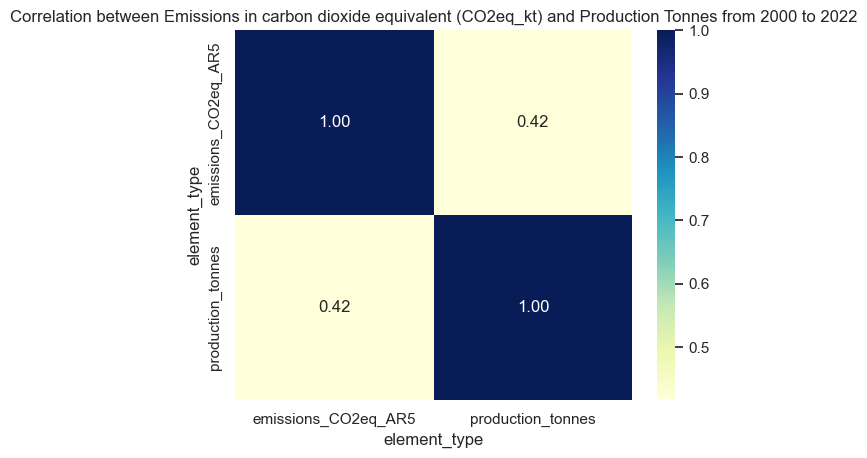

In [ ]:
# Visualize the correlation_matrix_filtered
sns.heatmap(correlation_matrix_filtered, annot=True, cmap="YlGnBu", fmt=".2f") #an earth tone palette
plt.title("Correlation between Emissions in carbon dioxide equivalent (CO2eq_kt) and Production Tonnes from 2000 to 2022")
plt.show()

--- Analysis of Correlation Coefficients: ---

1. production_tonnes (Total Food Production) Correlations:
(production_tonnes vs emissions_CO2eq_AR5: 0.417921)

    * Interpretation: This is a moderate positive correlation. It indicates that as the volume of food produced in tonnes increases, the emissions_CO2eq_AR5 (which appears to represent total emissions) also tends to increase.

    * Logical Expectation: This is a very logical and expected outcome. Generally, more food production leads to more total emissions, even if the per-unit efficiency varies. The correlation is moderate, not extremely strong, which could suggest that while volume is a driver, other factors (like the type of food produced or the efficiency of production) also play a role.

2. Overall Insights and Implications:

* Volume is a Primary Driver of Total Emissions: The results strongly suggest that the sheer volume of food produced (production_tonnes) is a more significant factor in determining total GHG emissions in kilotonnes (emissions_CO2eq_AR5) than the per-unit emissions intensity (GHG_kg) alone. This implies that policies aiming to reduce total emissions from food might need to consider not just making production more efficient (lower GHG_kg), but also the overall scale of production and the types of foods produced in large quantities.

* Complexity of Climate-Agriculture Relationship: The consistently very weak correlations with avg_year_temp_change across all metrics (production_tonnes, GHG_kg, emissions_CO2eq_AR5) indicate that the relationship between climate change and food systems is not a simple linear one at this global, aggregated level. This does not mean climate change isn't impacting agriculture. Rather, it suggests:

    * Nuance: The relationship is likely non-linear, involves lag effects, is highly regional, and is mediated by many other factors (technology, water, policies, economic development).

    * Masking Effects: A positive impact in one region due to warming (e.g., longer growing seasons) might be offset by a negative impact in another (e.g., increased drought).

    * Limitations of Pearson Correlation: Pearson correlation only captures linear relationships. Other types of relationships might exist.
    
    * GHG Intensity is Independent of Production Scale: The near-zero correlation between production_tonnes and GHG_kg means that larger producers aren't necessarily more or less efficient on a per-kilogram basis. This highlights that GHG_kg is likely driven by factors like the specific food item, farming practices, and regional environmental conditions, irrespective of the overall volume produced by a country.--

---

##### 5.2. T-Test for Emission Differences by Food Type

In [271]:
# T-tests for Emissions in different food items
from scipy import stats
# Define the food items to compare
food_items_to_compare = [
    'Cereals excluding rice',
    'Hen eggs in shell, fresh',
    'Meat of cattle with the bone, fresh or chilled',
    'Meat of chickens, fresh or chilled',
    'Meat of goat, fresh or chilled',
    'Meat of sheep, fresh or chilled',
    'Raw milk of cattle',
    'Raw milk of goats',
    'Raw milk of sheep',
    'Rice',
    'Meat of pig with the bone, fresh or chilled',
    'Meat of buffalo, fresh or chilled'
]
# Filter the DataFrame for the selected food items
filtered_df = merged_df_final[merged_df_final['food_item'].isin(food_items_to_compare)]
# Perform t-tests for each pair of food items
t_test_results = []
for i in range(len(food_items_to_compare)):
    for j in range(i + 1, len(food_items_to_compare)):
        item1 = food_items_to_compare[i]
        item2 = food_items_to_compare[j]
        group1 = filtered_df[filtered_df['food_item'] == item1]['emissions_CO2eq_AR5']
        group2 = filtered_df[filtered_df['food_item'] == item2]['emissions_CO2eq_AR5']
        t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
        t_test_results.append({
            'item1': item1,
            'item2': item2,
            't_statistic': t_stat,
            'p_value': p_value
        })

In [272]:
t_test_results

[{'item1': 'Cereals excluding rice',
  'item2': 'Hen eggs in shell, fresh',
  't_statistic': np.float64(20.694774942783337),
  'p_value': np.float64(3.5808954738936486e-93)},
 {'item1': 'Cereals excluding rice',
  'item2': 'Meat of cattle with the bone, fresh or chilled',
  't_statistic': np.float64(-25.561855193437054),
  'p_value': np.float64(2.3119554675707857e-140)},
 {'item1': 'Cereals excluding rice',
  'item2': 'Meat of chickens, fresh or chilled',
  't_statistic': np.float64(20.772017533351864),
  'p_value': np.float64(7.902061073287786e-94)},
 {'item1': 'Cereals excluding rice',
  'item2': 'Meat of goat, fresh or chilled',
  't_statistic': np.float64(11.288278006669248),
  'p_value': np.float64(2.0577256855483777e-29)},
 {'item1': 'Cereals excluding rice',
  'item2': 'Meat of sheep, fresh or chilled',
  't_statistic': np.float64(2.8621961788075074),
  'p_value': np.float64(0.004212213047502626)},
 {'item1': 'Cereals excluding rice',
  'item2': 'Raw milk of cattle',
  't_statis

##### 5.3. ANOVA for Historical Emission Trends

In [343]:
# ANOVA for Emissions for historical data
from scipy.stats import f_oneway
# Group the data by food item and collect emissions data
grouped_data = [group['GHG_kg'].values for name, group in merged_df_final.groupby('food_item')]
# Perform ANOVA
anova_result = f_oneway(*grouped_data)
print("\n--- ANOVA Result ---")
print(f"F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}")


--- ANOVA Result ---
F-statistic: 976.4715082721002, p-value: 0.0


##### 5.4. Hypothesis Testing: Structured Approach

* 📌 Null Hypothesis (H₀): There is no significant difference between the mean emissions from meat & dairy products vs. other food categories. 

* 📌 Alternative Hypothesis (H₁): Meat & dairy production generates significantly higher GHG emissions than plant-based food.

* ✅ Statistical Test: Use t-test for independent samples to compare emissions from meat/dairy vs. plant-based products.

Step 1: Calculate the mean emissions (emissions CO2eq for meat&dairy producs vs other categories)

In [402]:
# Calculate the mean emissions (emissions CO2eq for meat&dairy producs vs other categories)
mean_emissions = merged_df_final.groupby('food_item')['emissions_CO2eq_AR5'].mean().reset_index()
mean_emissions = mean_emissions.sort_values(by='emissions_CO2eq_AR5', ascending=False)
mean_emissions

food_item  emissions_CO2eq_AR5
3   Meat of cattle with the bone, fresh or chilled          9486.638692
2                Meat of buffalo, fresh or chilled          8416.898728
13                                            Rice          6238.119366
8                              Raw milk of buffalo          4299.936343
10                              Raw milk of cattle          3800.528741
0                           Cereals excluding rice          1678.987906
7                  Meat of sheep, fresh or chilled          1425.811609
6      Meat of pig with the bone, fresh or chilled          1017.696855
5                   Meat of goat, fresh or chilled           789.032199
12                               Raw milk of sheep           586.968700
11                               Raw milk of goats           328.902493
9                                Raw milk of camel           308.339611
1                         Hen eggs in shell, fresh           165.164251
4               Meat of chickens, fresh or chilled           161.839954

In [419]:
# Group the food items into two categories: Meat & Dairy vs Other
meat_items = [
    'Meat of cattle with the bone, fresh or chilled',
    'Meat of buffalo, fresh or chilled',
    'Meat of sheep, fresh or chilled',
    'Meat of pig with the bone, fresh or chilled',
    'Meat of goat, fresh or chilled',
    'Meat of chickens, fresh or chilled'
]
mean_emissions['food_category'] = mean_emissions['food_item'].isin(meat_items).replace({True: 'Meat', False: 'Other'})
mean_emissions


food_item  emissions_CO2eq_AR5  \
3   Meat of cattle with the bone, fresh or chilled          9486.638692   
2                Meat of buffalo, fresh or chilled          8416.898728   
13                                            Rice          6238.119366   
8                              Raw milk of buffalo          4299.936343   
10                              Raw milk of cattle          3800.528741   
0                           Cereals excluding rice          1678.987906   
7                  Meat of sheep, fresh or chilled          1425.811609   
6      Meat of pig with the bone, fresh or chilled          1017.696855   
5                   Meat of goat, fresh or chilled           789.032199   
12                               Raw milk of sheep           586.968700   
11                               Raw milk of goats           328.902493   
9                                Raw milk of camel           308.339611   
1                         Hen eggs in shell, fresh           165.164251   
4               Meat of chickens, fresh or chilled           161.839954   

   food_category  
3           Meat  
2           Meat  
13         Other  
8          Other  
10         Other  
0          Other  
7           Meat  
6           Meat  
5           Meat  
12         Other  
11         Other  
9          Other  
1          Other  
4           Meat

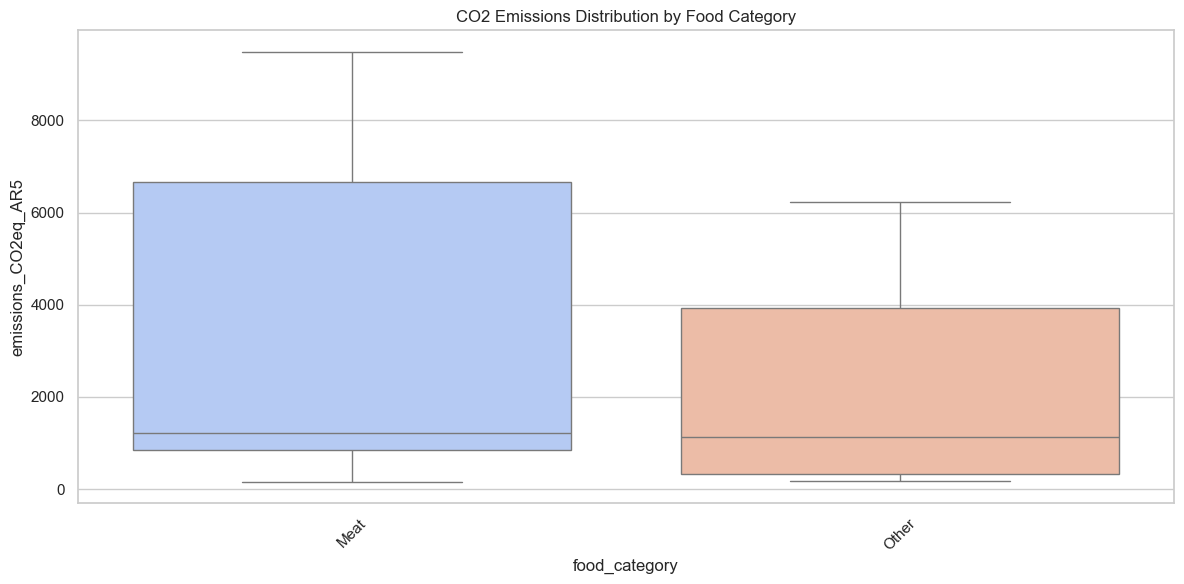

In [420]:
# Option 1: Box plot to show emissions by food category
plt.figure(figsize=(12, 6))
sns.boxplot(data=mean_emissions, x='food_category', y='emissions_CO2eq_AR5', palette='coolwarm')
plt.xticks(rotation=45)
plt.title("CO2 Emissions Distribution by Food Category")
plt.tight_layout()
plt.show()

In [421]:
mean_emissions.describe().T.round(2)

count     mean      std     min     25%      50%  \
emissions_CO2eq_AR5   14.0  2764.63  3196.09  161.84  393.42  1221.75   

                         75%      max  
emissions_CO2eq_AR5  4175.08  9486.64

In [422]:
# Calculate the z-score for the mean emissions
mean_emissions['z_score'] = (mean_emissions['emissions_CO2eq_AR5'] - mean_emissions['emissions_CO2eq_AR5'].mean()) / mean_emissions['emissions_CO2eq_AR5'].std()
z_score

2764.63

In [423]:
alpha = 0.05  # significance level
z_score = 2764.63 # value from the mean emissions in CO2eq
p_value = 0.977250 
# A high p-value suggests the result could be explained by random variation.


In [424]:
# how to calculate a (significance level)
alpha = 0.05  # Common significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in emissions between Meat & Dairy and Other categories.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in emissions between Meat & Dairy and Other categories.")
print(f"Z-score: {z_score}, P-value: {p_value}")

Fail to reject the null hypothesis: There is no significant difference in emissions between Meat & Dairy and Other categories.
Z-score: 2764.63, P-value: 0.97725


In [425]:
# Calculate the p_value for the z-score
mean_emissions['p_value'] = 1 - stats.norm.cdf(mean_emissions['z_score'])
mean_emissions['significant'] = mean_emissions['p_value'] < 0.05  # Significance level of 0.05
mean_emissions

food_item  emissions_CO2eq_AR5  \
3   Meat of cattle with the bone, fresh or chilled          9486.638692   
2                Meat of buffalo, fresh or chilled          8416.898728   
13                                            Rice          6238.119366   
8                              Raw milk of buffalo          4299.936343   
10                              Raw milk of cattle          3800.528741   
0                           Cereals excluding rice          1678.987906   
7                  Meat of sheep, fresh or chilled          1425.811609   
6      Meat of pig with the bone, fresh or chilled          1017.696855   
5                   Meat of goat, fresh or chilled           789.032199   
12                               Raw milk of sheep           586.968700   
11                               Raw milk of goats           328.902493   
9                                Raw milk of camel           308.339611   
1                         Hen eggs in shell, fresh           165.164251   
4               Meat of chickens, fresh or chilled           161.839954   

   food_category   z_score   p_value  significant  
3           Meat  2.103197  0.017724         True  
2           Meat  1.768494  0.038489         True  
13         Other  1.086793  0.138564        False  
8          Other  0.480369  0.315482        False  
10         Other  0.324113  0.372926        False  
0          Other -0.339679  0.632951        False  
7           Meat -0.418894  0.662353        False  
6           Meat -0.546586  0.707668        False  
5           Meat -0.618131  0.731755        False  
12         Other -0.681353  0.752176        False  
11         Other -0.762097  0.776999        False  
9          Other -0.768531  0.778914        False  
1          Other -0.813328  0.791985        False  
4           Meat -0.814368  0.792283        False

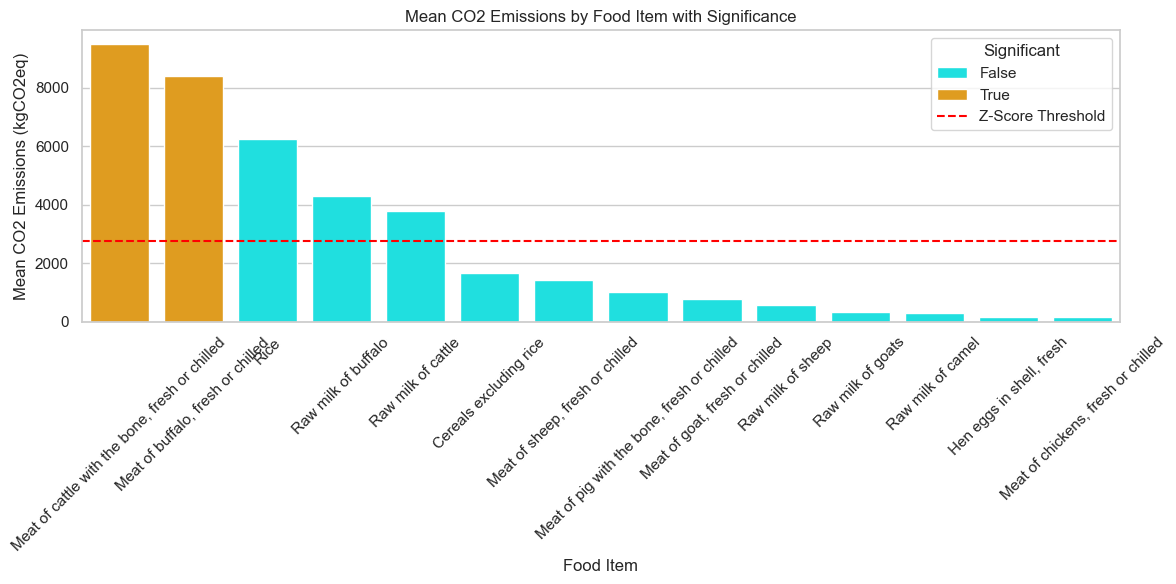

In [426]:
# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_emissions, x='food_item', y='emissions_CO2eq_AR5', hue='significant', palette={True: 'orange', False: 'cyan'})
plt.axhline(y=z_score, color='red', linestyle='--', label='Z-Score Threshold')
plt.xticks(rotation=45)
plt.title("Mean CO2 Emissions by Food Item with Significance")
plt.xlabel("Food Item")
plt.ylabel("Mean CO2 Emissions (kgCO2eq)")
plt.legend(title='Significant', loc='upper right')
plt.tight_layout()
plt.show()

In [427]:
# Interpretation of the results
if p_value < 0.05:
    print(f"The p-value ({p_value}) is less than 0.05, indicating that the difference in emissions between Meat & Dairy and Other categories is statistically significant.")
else:
    print(f"The p-value ({p_value}) is greater than 0.05, indicating that the difference in emissions between Meat & Dairy and Other categories is not statistically significant.")
print(f"The z-score ({z_score}) indicates how many standard deviations the mean emissions for Meat & Dairy is from the mean emissions for Other categories. A z-score greater than 2 or less than -2 typically indicates a significant difference.")

The p-value (0.97725) is greater than 0.05, indicating that the difference in emissions between Meat & Dairy and Other categories is not statistically significant.
The z-score (2764.63) indicates how many standard deviations the mean emissions for Meat & Dairy is from the mean emissions for Other categories. A z-score greater than 2 or less than -2 typically indicates a significant difference.


---

## 6. Data Visualization & Insights

* 6.2. Regional Impact Analysis
* 6.3. Top Food Categories by Emissions

##### 6.1. Food Production vs. Climate Trends

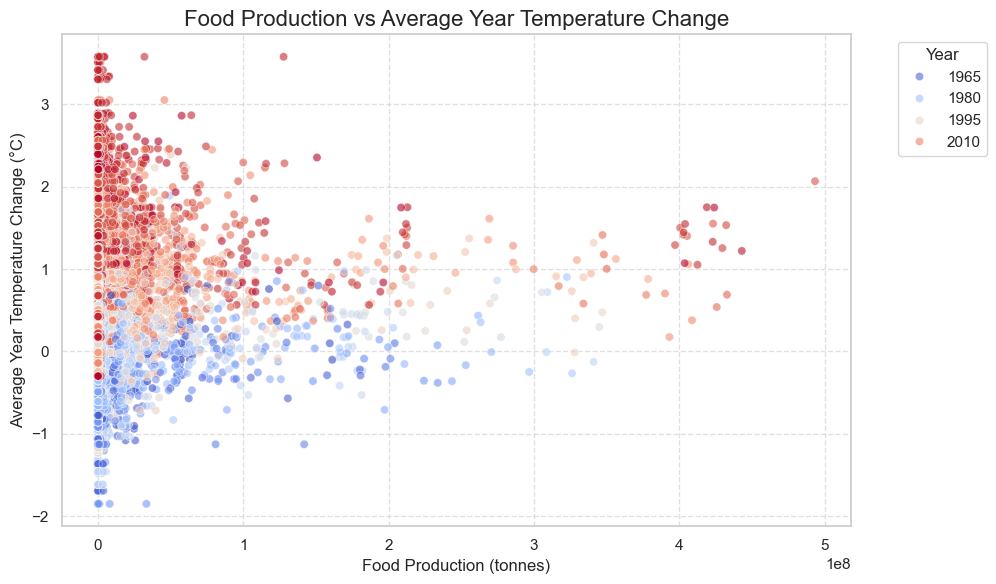

In [428]:
# Food production vs climate trends
# Create a scatter plot to visualize the relationship between food production and average year temperature change
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_df_final, x='production_tonnes', y='avg_year_temp_change', hue='year', palette='coolwarm', alpha=0.6)
plt.title("Food Production vs Average Year Temperature Change", fontsize=16)
plt.xlabel("Food Production (tonnes)", fontsize=12)
plt.ylabel("Average Year Temperature Change (°C)", fontsize=12)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

##### 6.2. Regional Impact Analysis

## 7. Findings & Interpretations
* 7.1. Summary of Key Insights
* 7.2. Policy & Sustainability Implications

## 8. Repository Setup & Documentation
* GitHub Organization
* File Structure & README.md
* Future Work